# <h1><center>**`Machinehack-ML-Merchandise-Popularity-Prediction`**</center></h1>


We need to predict the popularity from all the other data from dataset like Store_Ratio, Basket Ratio, Store Score. 

Big Brands spend a significant amount on popularizing a product.  Nevertheless, their efforts go in vain while establishing the merchandise in the hyperlocal market. Based on different geographical conditions same attributes can communicate a piece of much different information about the customer. Hence, insights this is a must for any brand owner.



### COLUMNS IN THE DATASET`

storeratio

 basketratio

category1

 storescore

category2

 storepresence

score1 

score2

score3 

score4

time

popularity (Target Column)

# `Importing required libraries`

In [1]:
# Import all necessary libraries
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from matplotlib import pylab
from pylab import *
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
# Load the dataset using pandas
train_data = pd.read_csv('/home/vinod/Downloads/Train.csv')
test_data =  pd.read_csv('/home/vinod/Downloads/Test.csv')

In [3]:
#Print the head
train_data.head().style.background_gradient(cmap='Reds')

In [4]:
#Print the head
test_data.head().style.background_gradient(cmap='winter_r')

# Identifying the number of features or columns

In [5]:
# Check the shape of train dataset
train_data.shape

(18208, 12)

In [6]:
# Check the shape of test dataset
test_data.shape

(12140, 11)

## Know all the names of the columns

In [7]:
# Check the columns in the train dataset
train_data.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

# Knows more about the data in the columns like data type it contains and total samples of each

In [8]:
# Check which columns are having categorical, numerical or boolean values of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

In [9]:
# Check which columns are having categorical, numerical or boolean values of test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

# Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [10]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_data.describe().style.background_gradient(cmap='Greens')

In [11]:
# For more information on the test dataset like the total count in all the columns
# min, max values and more information of the respective columns  
test_data.describe().style.background_gradient(cmap='Pastel1_r')

## Get the total number of samples in the dataset using the len() function

In [12]:
# check the lenght of test and train dataset
print("The test data length:",len(test_data))
print("The train data length:",len(train_data))

The test data length: 12140
The train data length: 18208


## Counting the total number of missing value

In [13]:
# Check for missing values in all the columnns of the train dataset
train_data.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

There is no missing values in this dataset

In [14]:
# Check for missing values in all the columnns of the test dataset
test_data.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

There is no missing values in this dataset

# Get unique values

In [15]:
# get unique values in train dataset
train_data.nunique()

Store_Ratio        1053
Basket_Ratio       1993
Category_1           12
Store_Score       10758
Category_2            2
Store_Presence     2832
Score_1            3668
Score_2            1385
Score_3            1591
Score_4           12943
time              12755
popularity            5
dtype: int64

In [16]:
# get unique values in test dataset
test_data.nunique()

Store_Ratio       1010
Basket_Ratio      1811
Category_1          12
Store_Score       8300
Category_2           2
Store_Presence    2507
Score_1           3064
Score_2           1275
Score_3           1491
Score_4           9463
time              9301
dtype: int64

# EDA

# CORRELATION MATRIX

Why ?

A correlation matrix is a table showing correlation coefficients between variables

There are three broad reasons for computing a correlation matrix:

1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable

In [17]:
#correlation 
#perfom correlation matrix Using pandas
corr = train_data.corr().style.background_gradient(cmap='RdYlGn')
corr

# ** Observations from above correlation matrix**

1. store ratio is strongly correlated with basket ratio , store score, score3 ,store presence score1 , score3
2. basket ratio is correlatd to store score, store presence, score1 score3.
3. category1 is correlated with category2
4. score presence is correlated with score1, score2, score3, popularity
5. score1 is correlated with score3 , score4, time, popularity


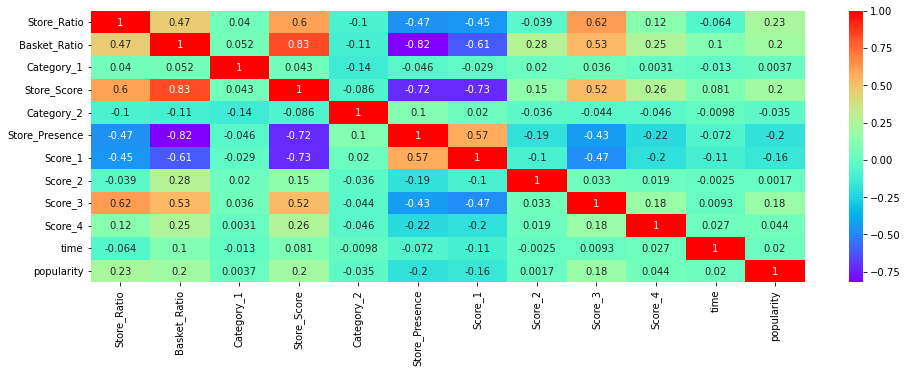

In [18]:
# Using seaborn
fig=plt.figure(figsize=(16,5))
sns.heatmap(train_data.corr(),annot=True,cmap='rainbow')
plt.show()


# SCATTER PLOT
1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


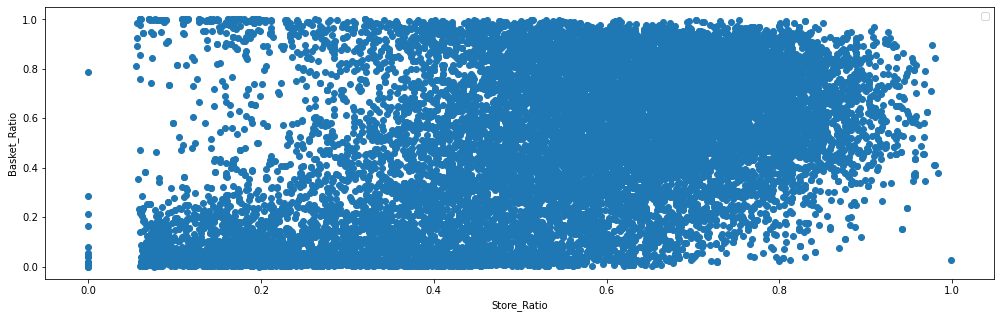

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


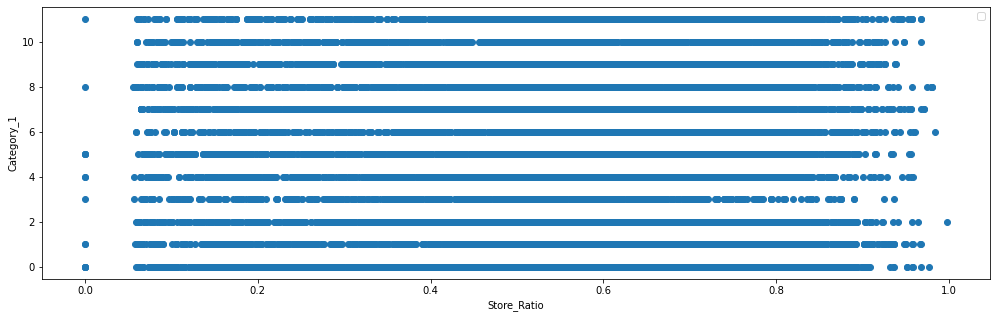

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


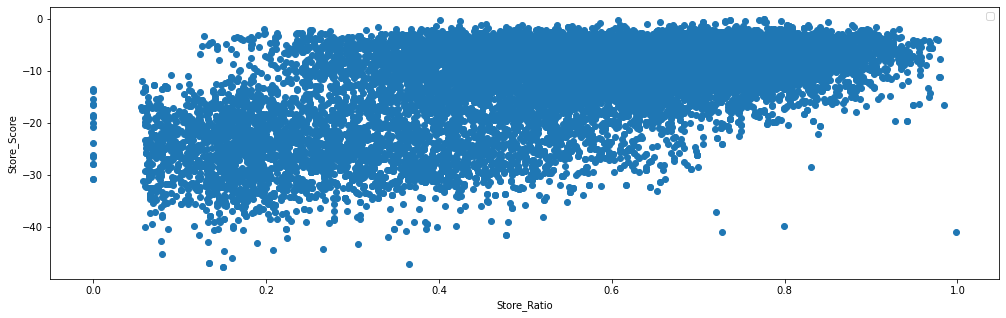

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


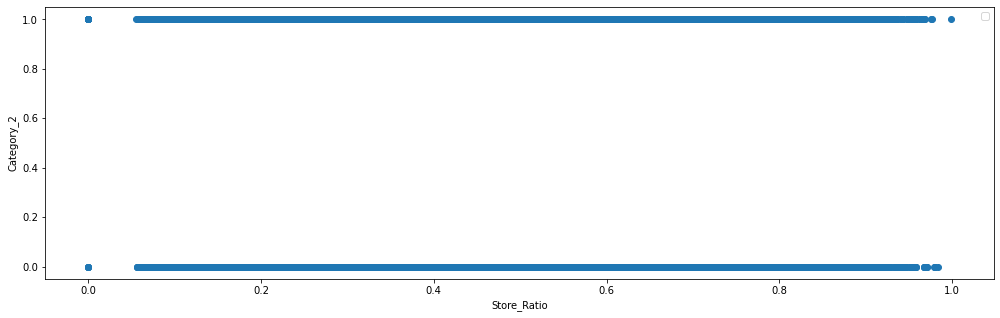

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


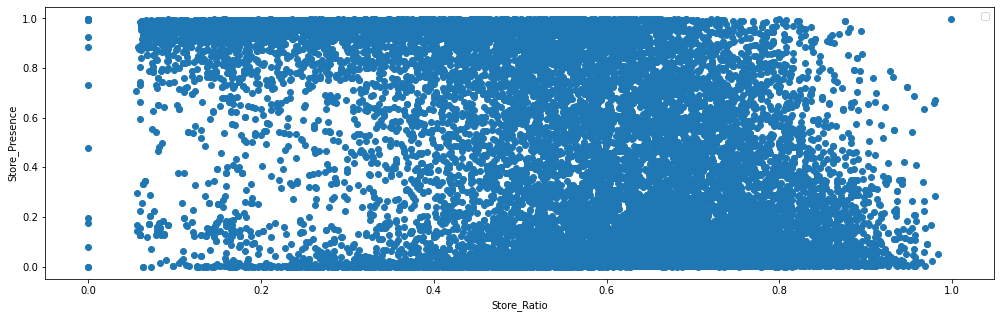

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


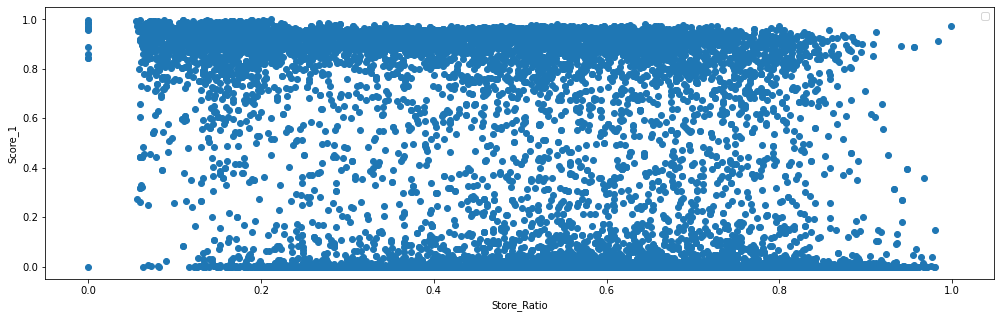

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


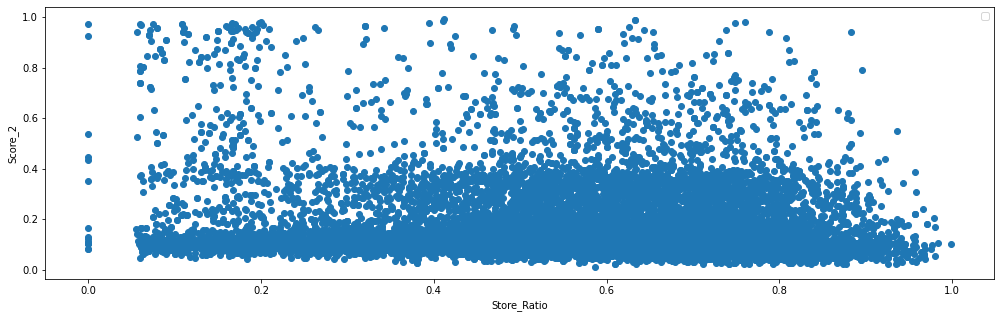

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


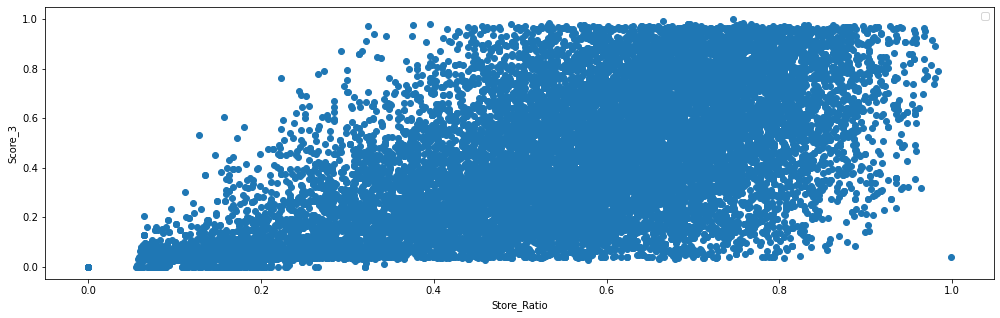

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


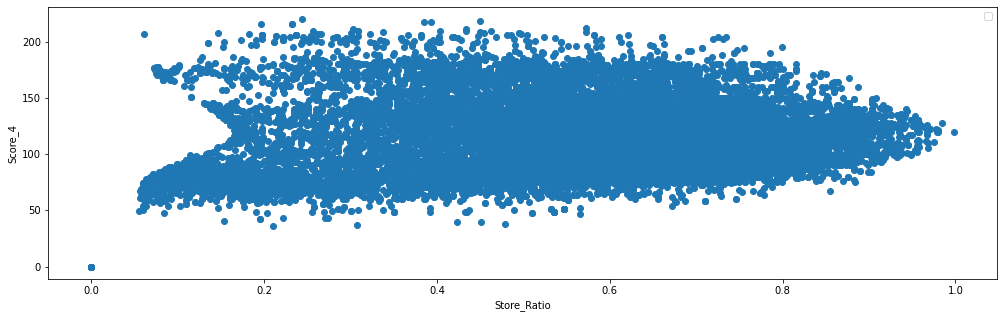

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


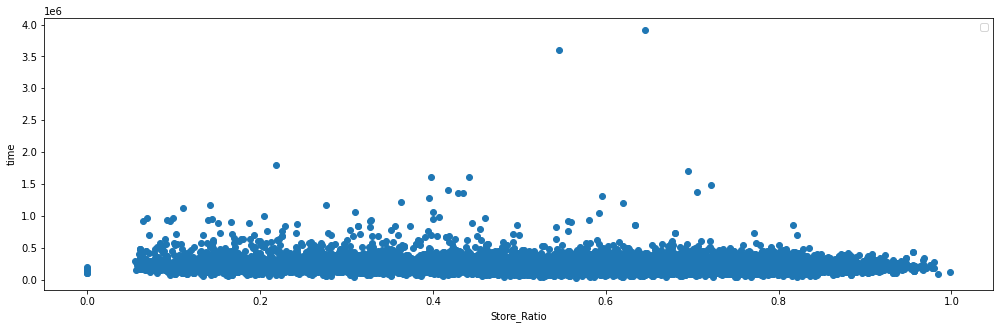

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


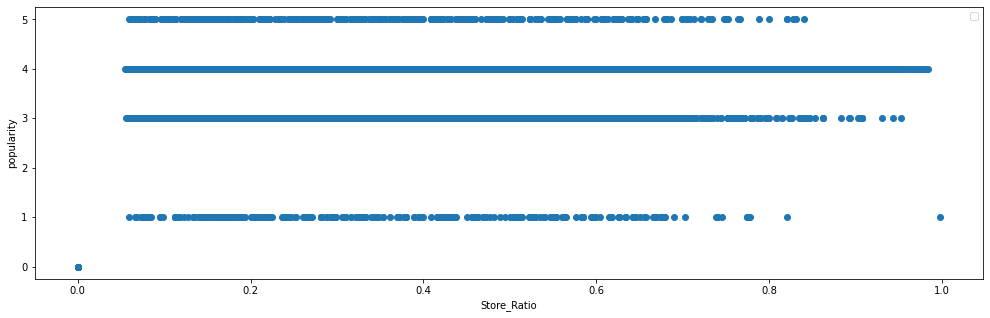

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


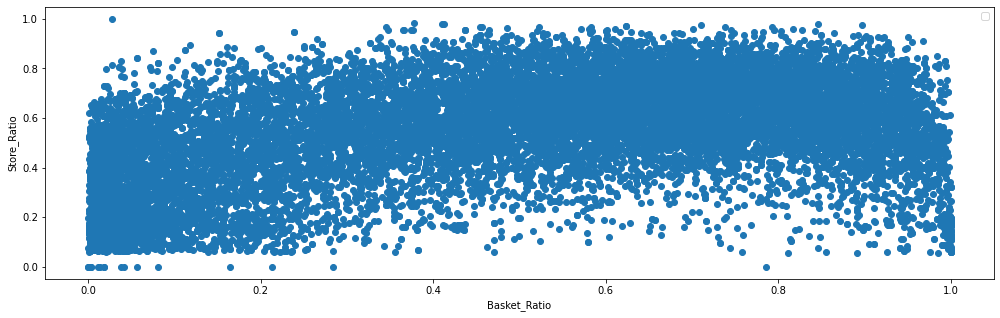

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


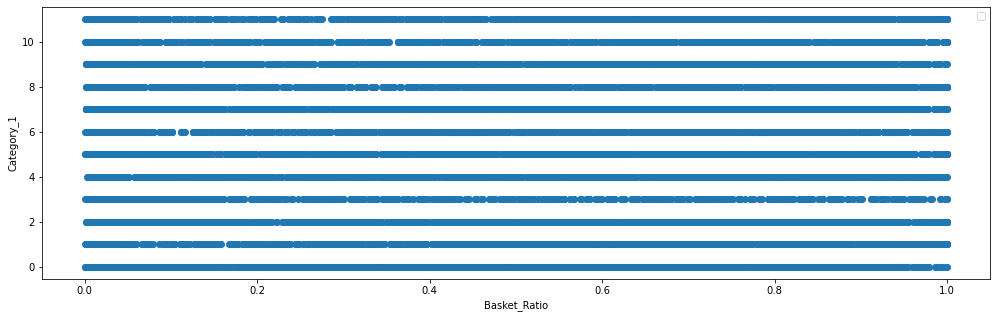

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


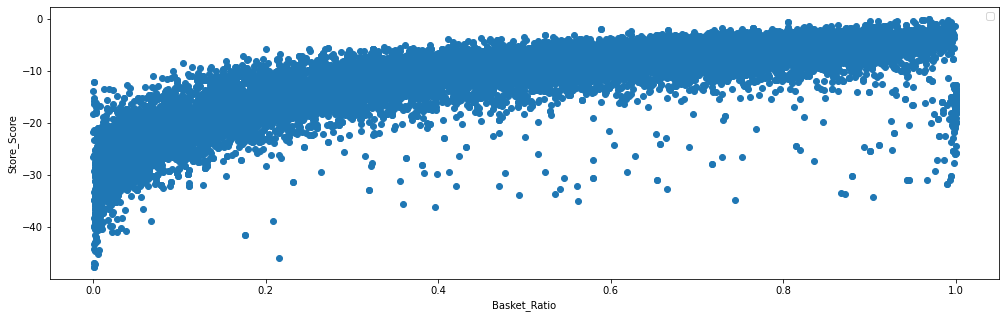

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


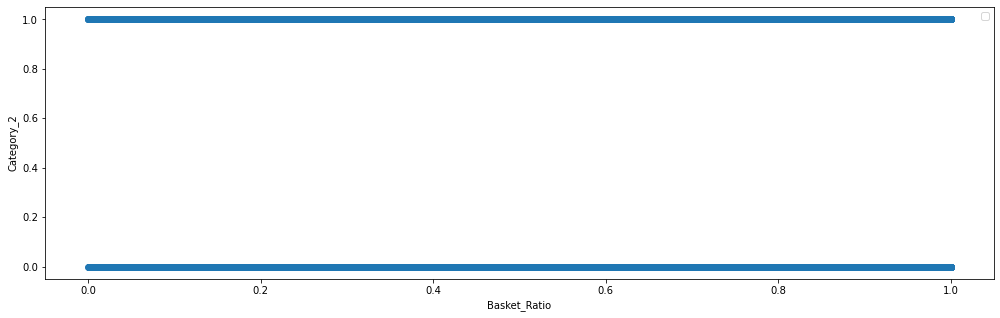

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


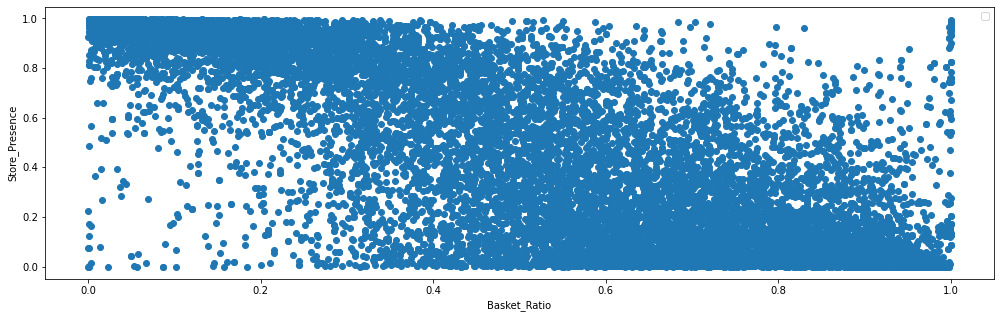

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


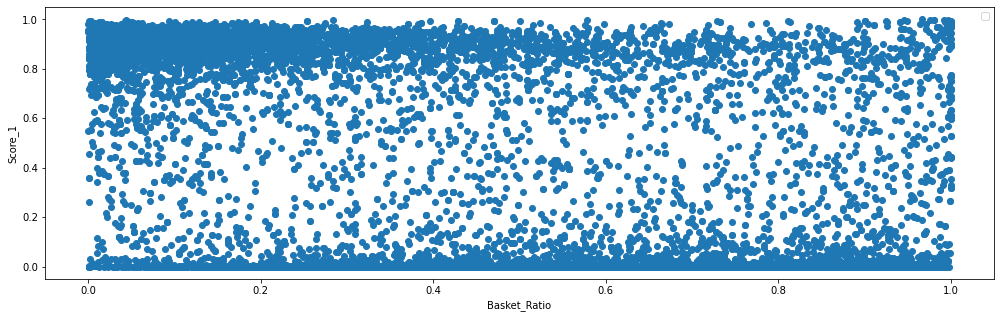

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


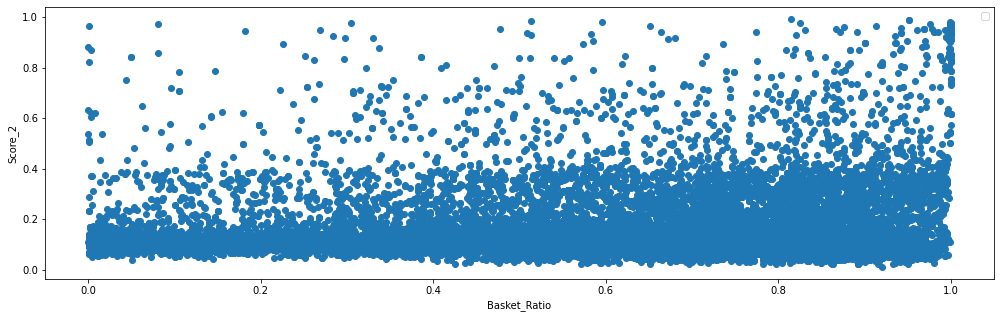

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


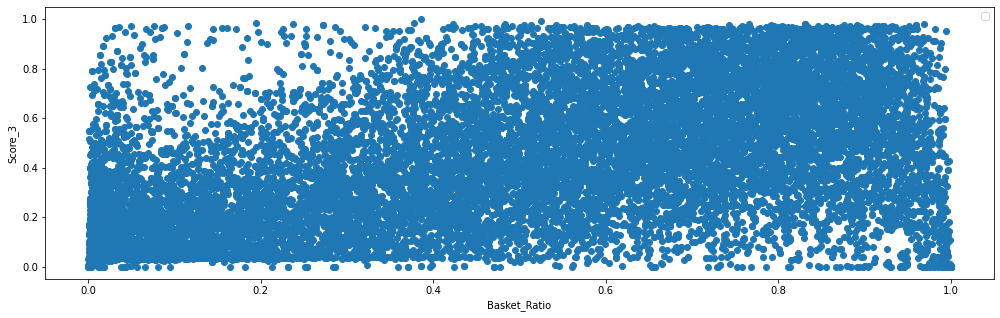

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


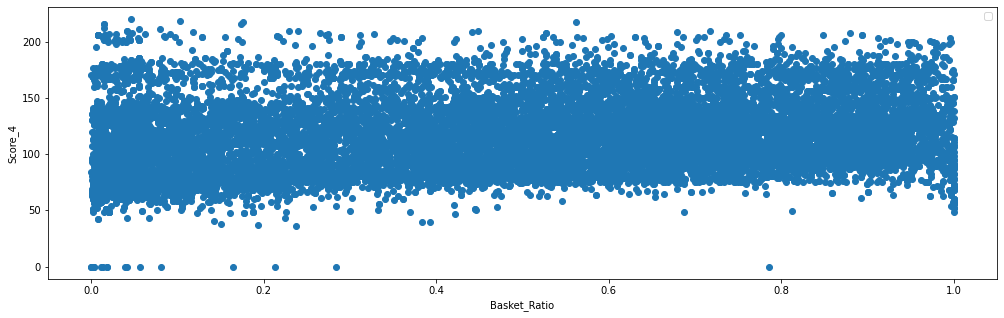

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


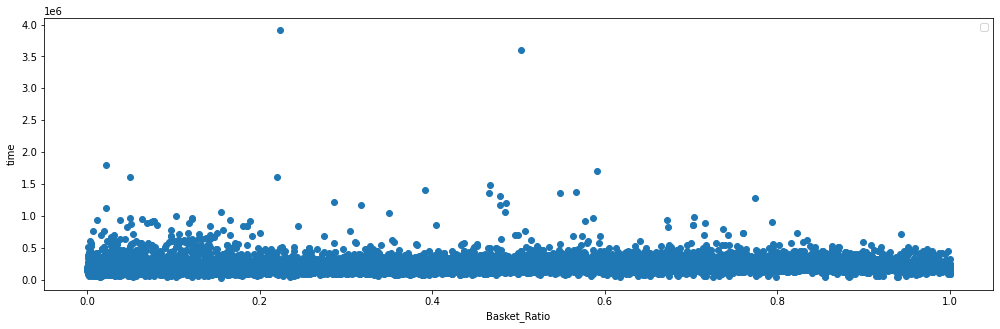

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


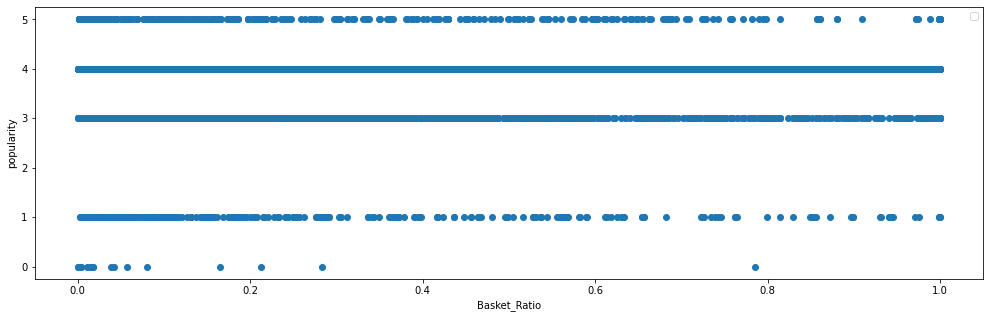

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


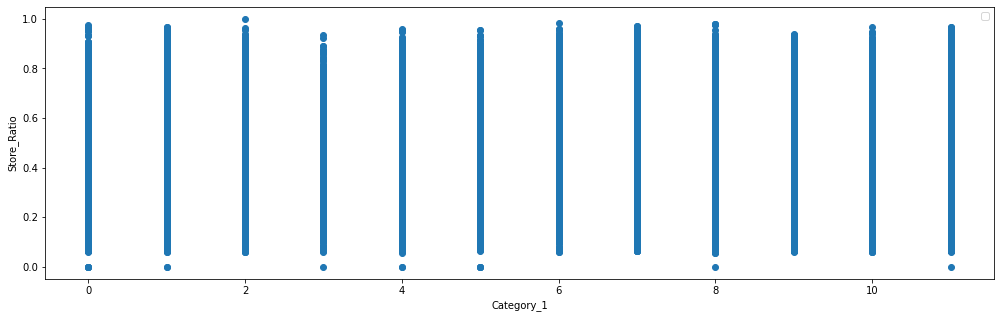

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


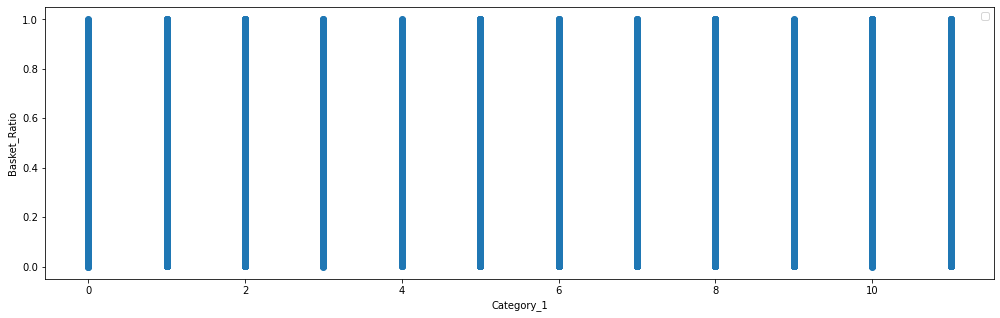

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


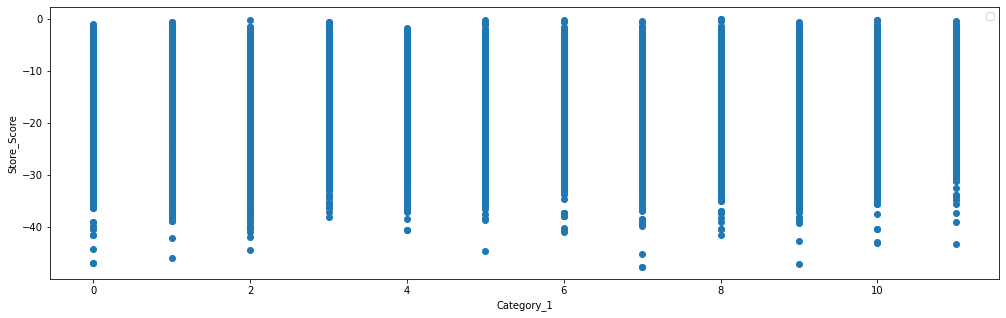

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


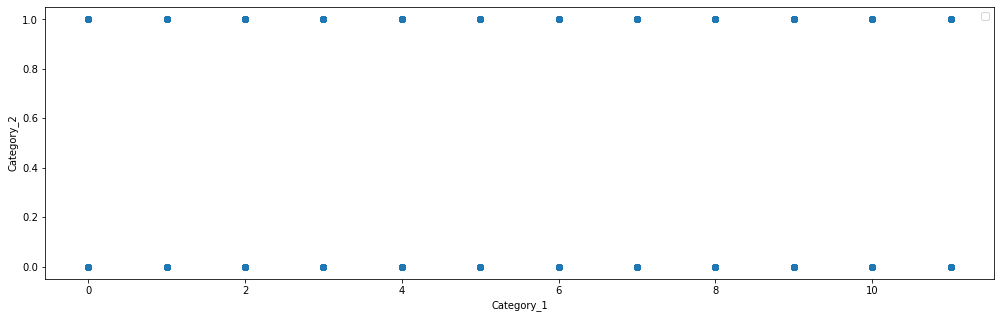

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


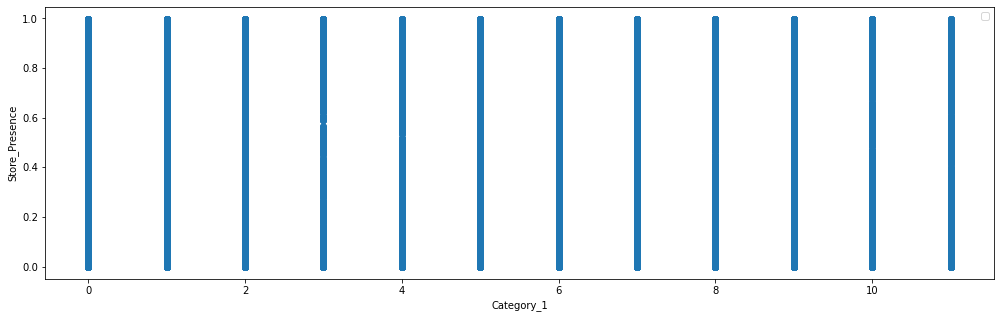

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


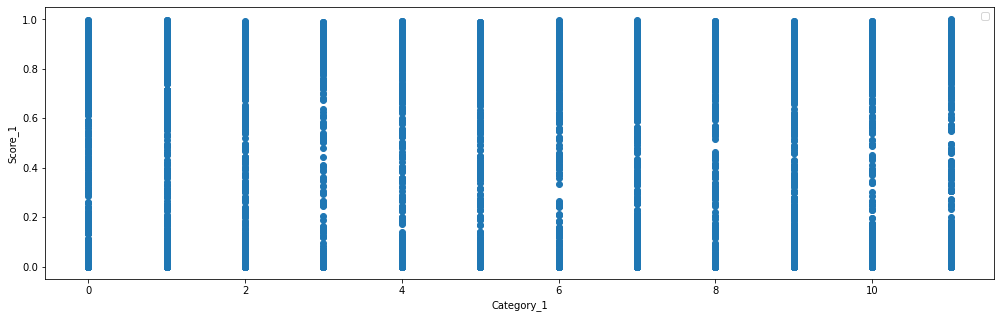

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


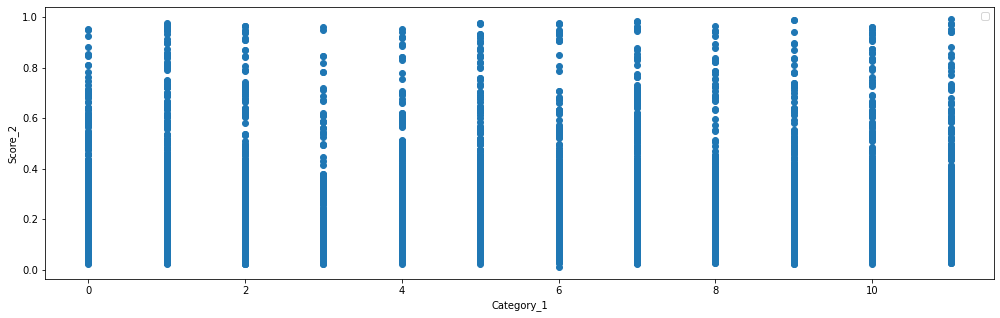

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


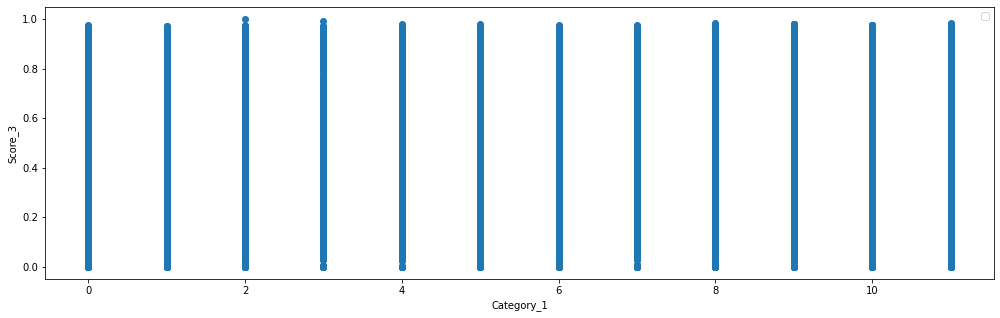

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


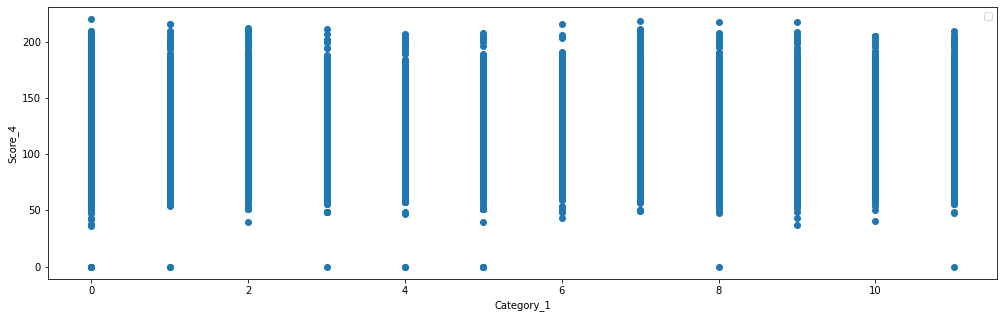

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


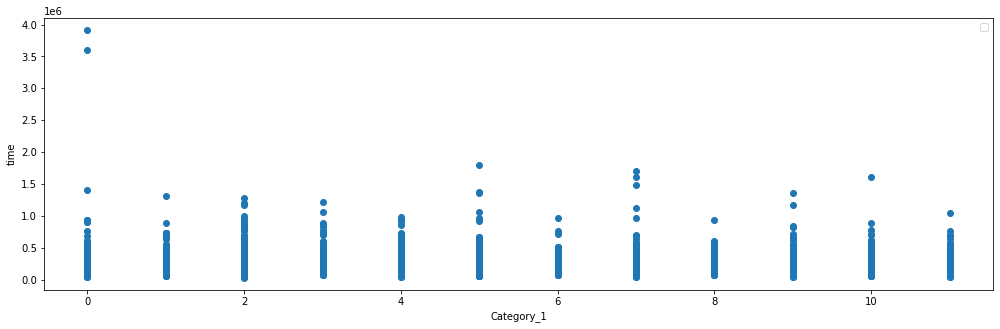

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


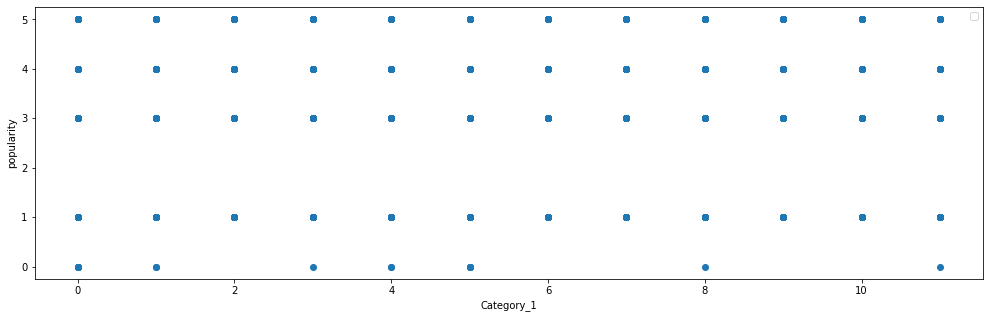

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


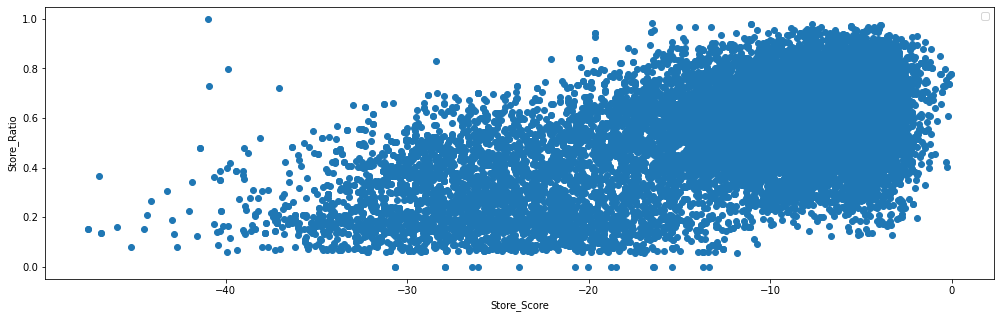

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


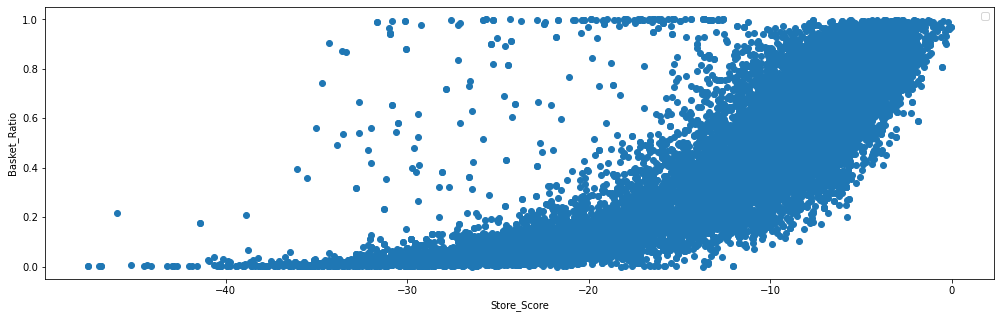

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


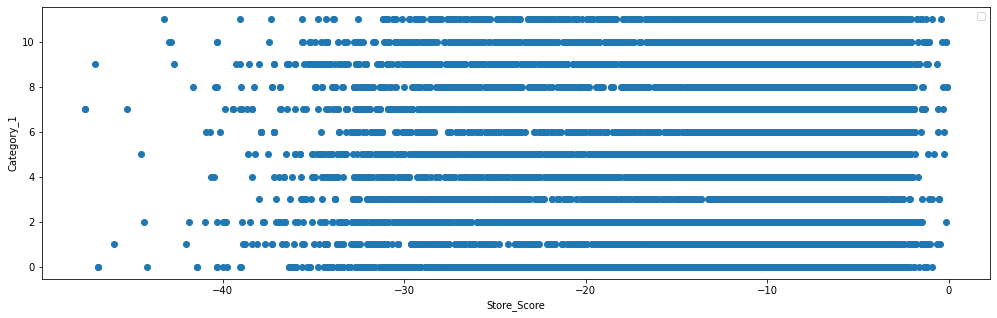

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


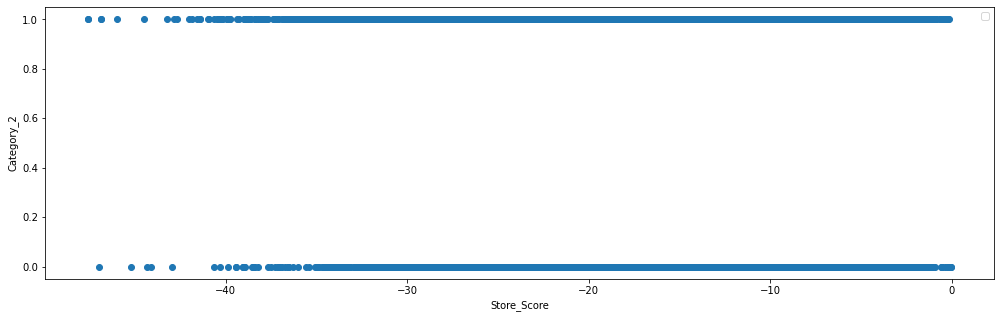

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


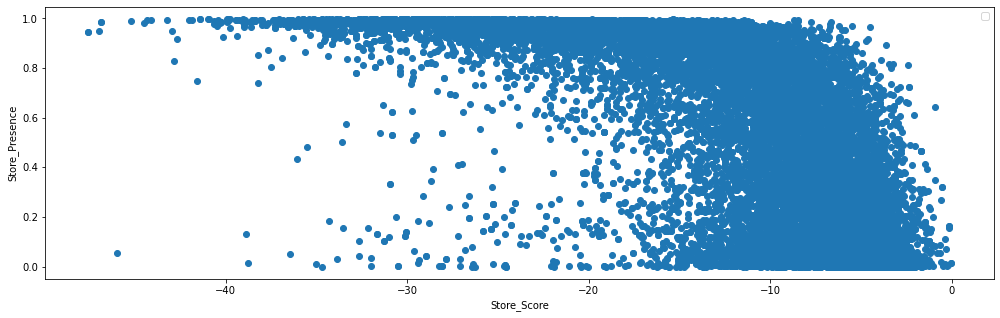

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


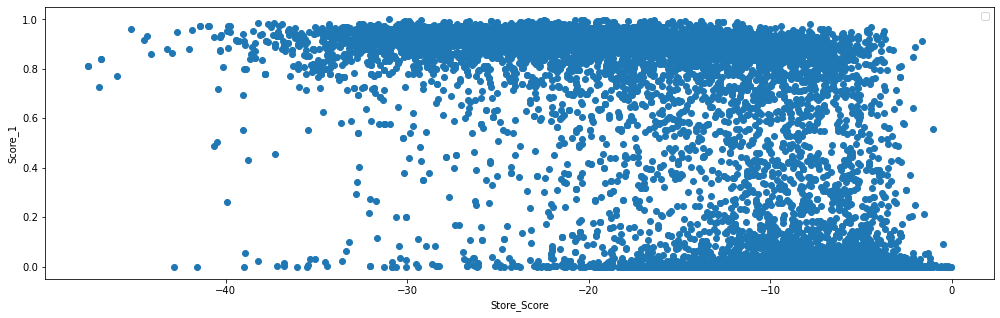

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


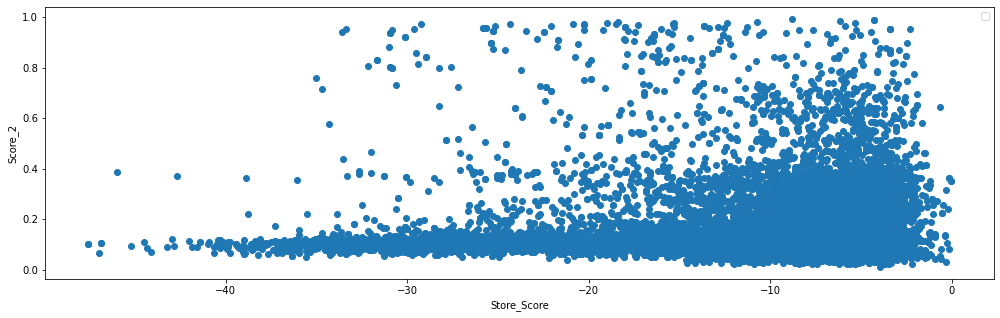

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


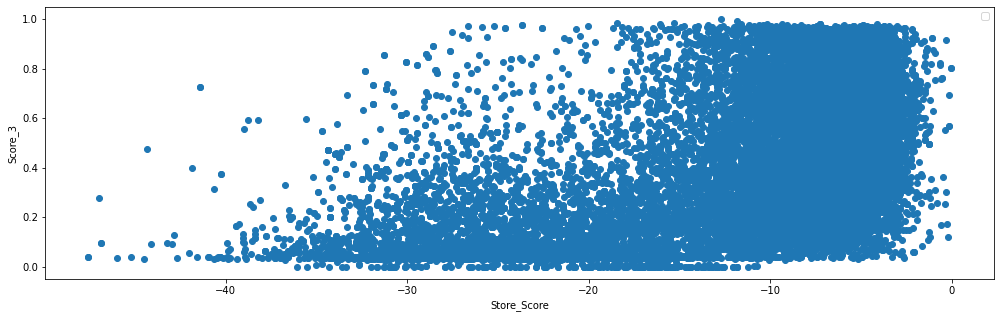

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


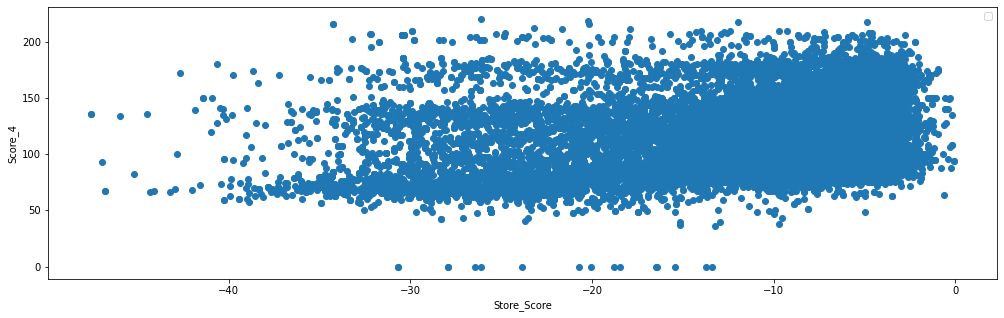

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


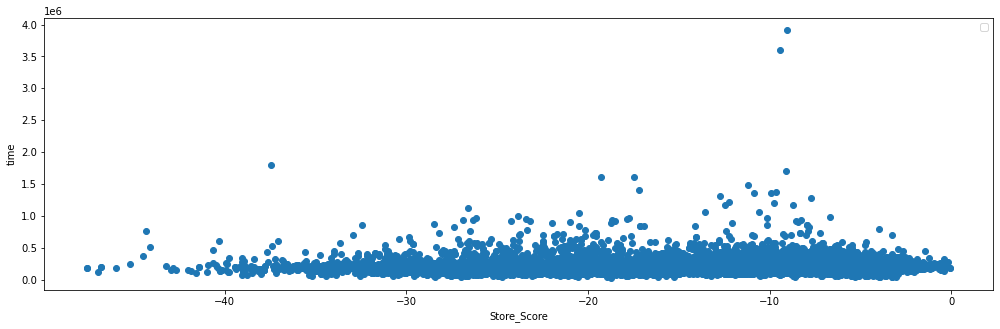

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


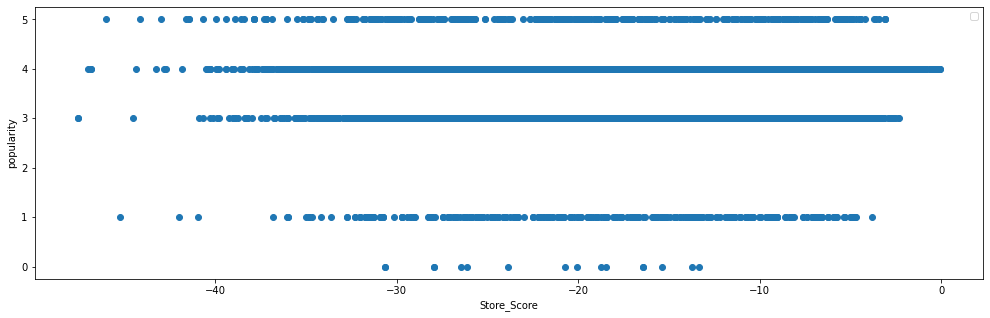

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


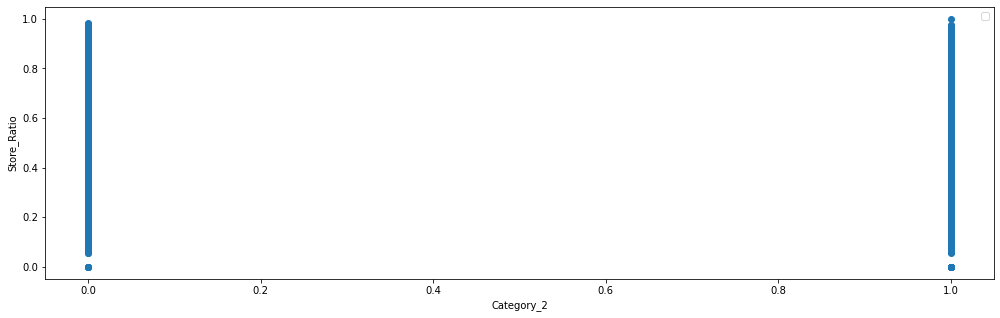

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


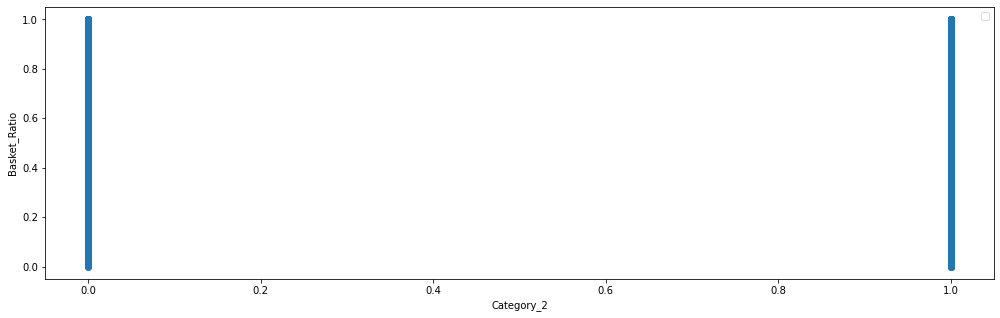

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


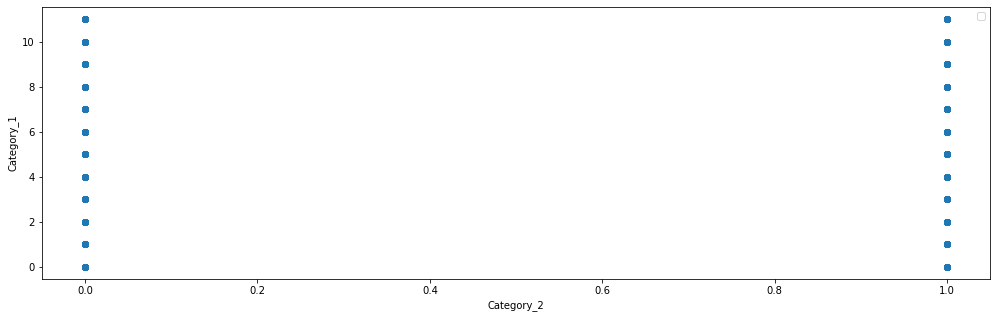

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


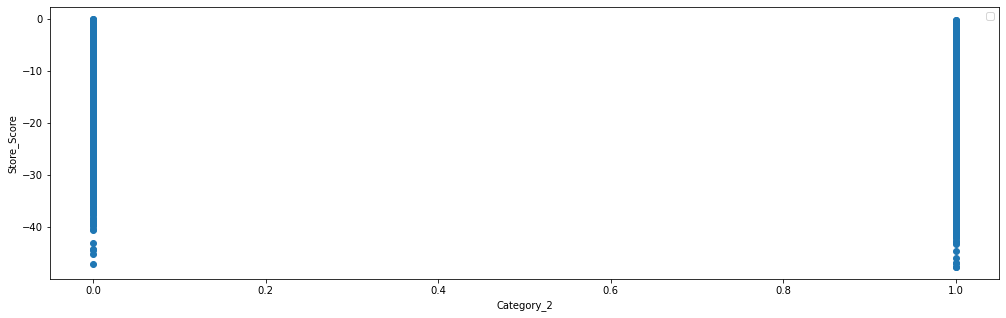

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


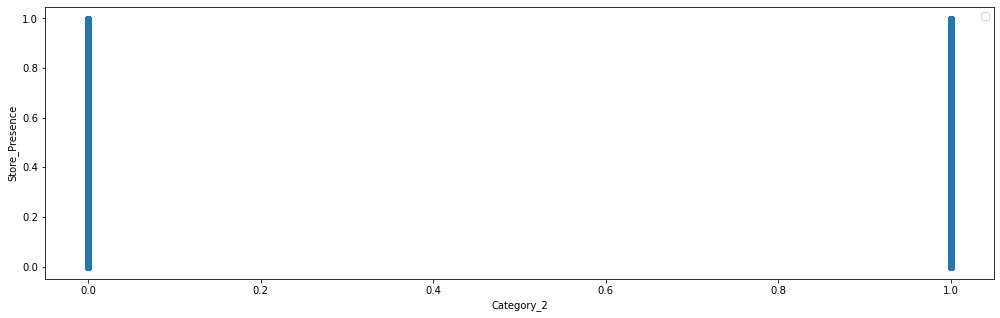

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


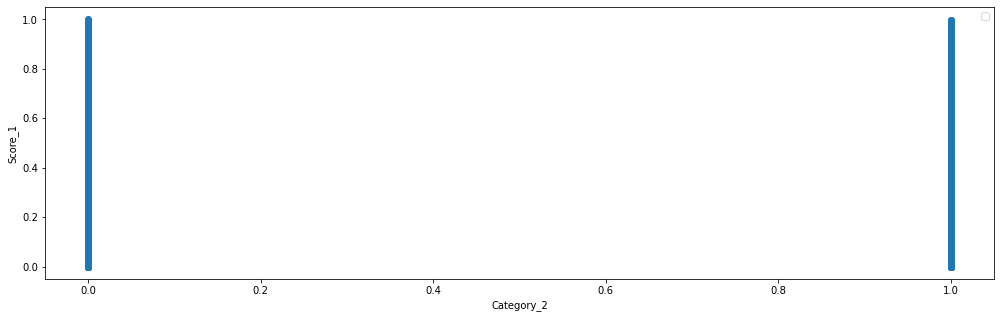

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


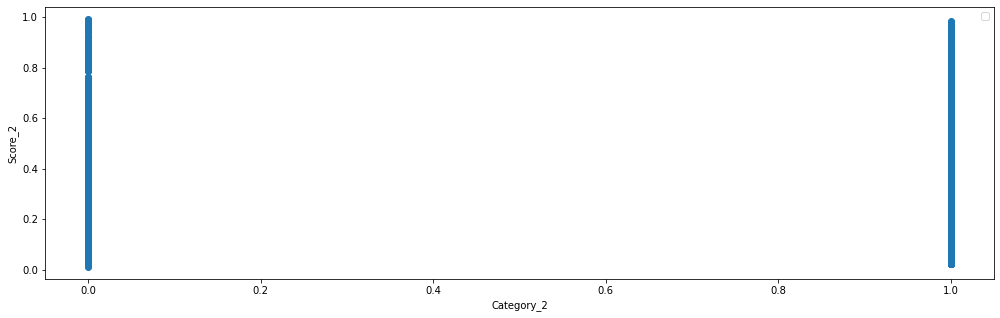

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


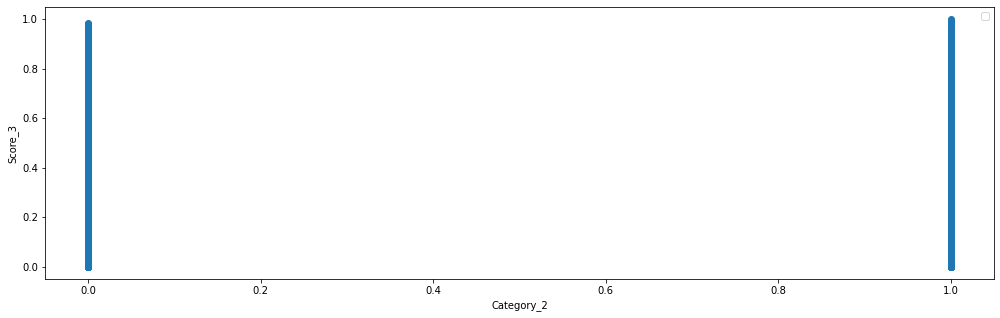

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


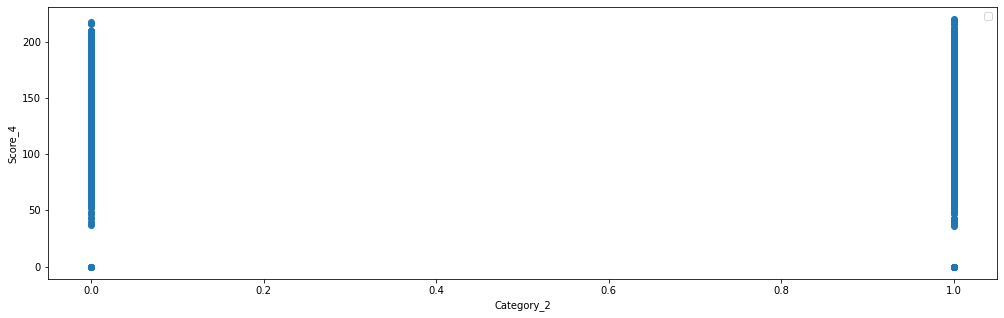

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


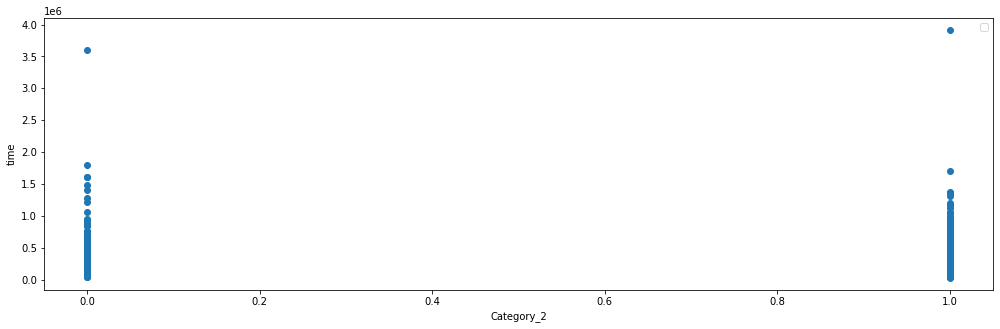

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


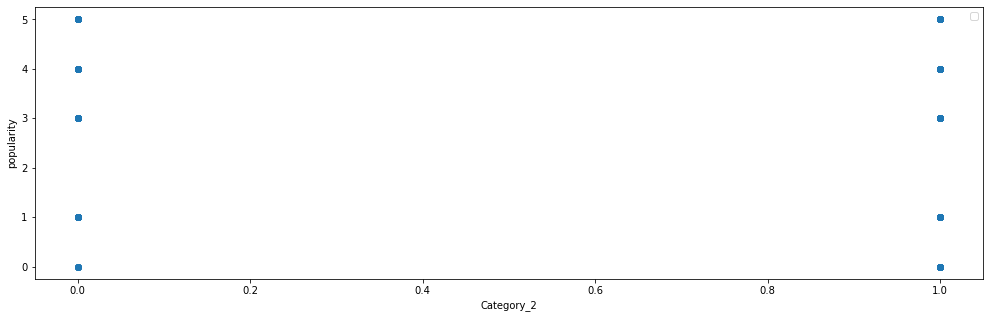

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


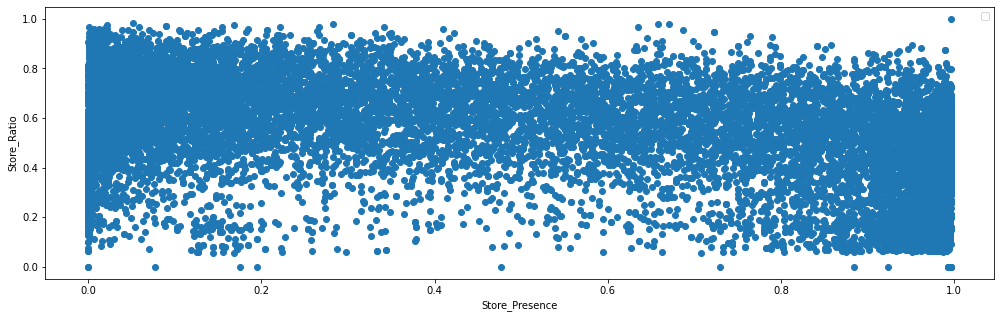

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


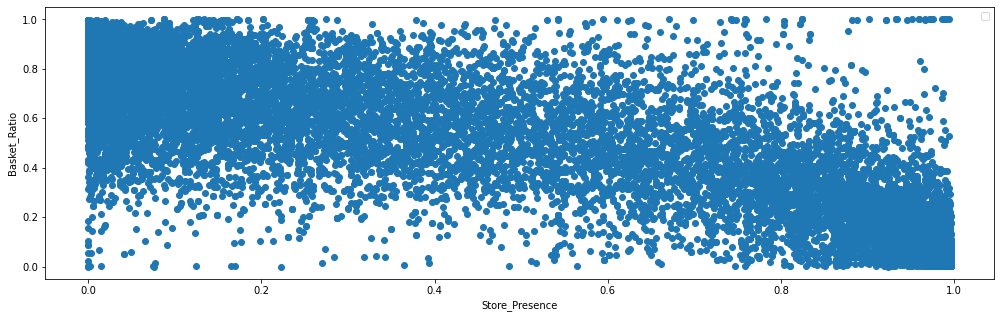

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


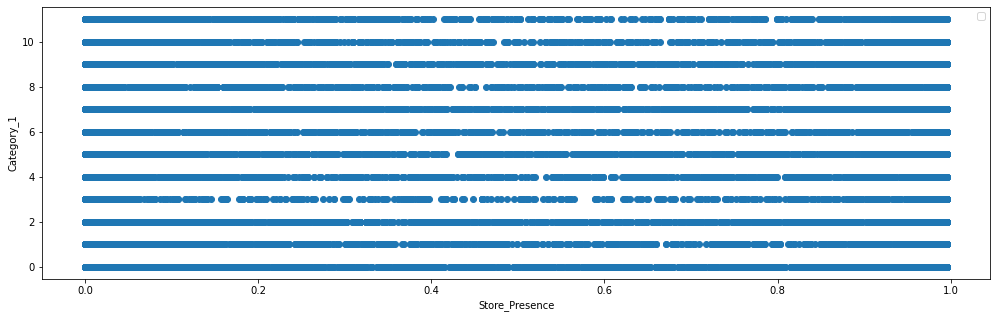

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


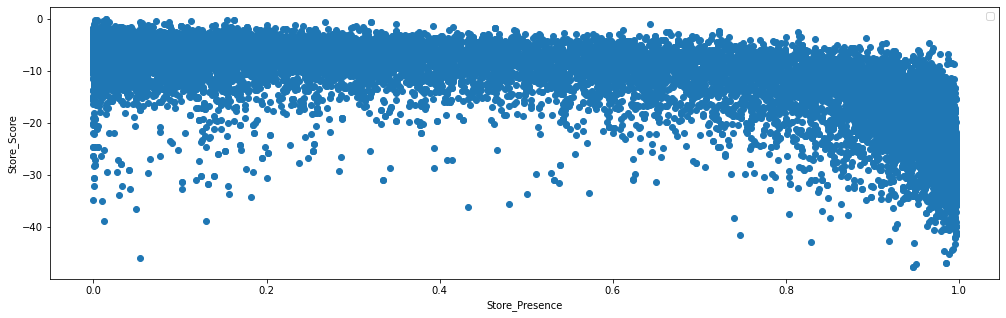

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


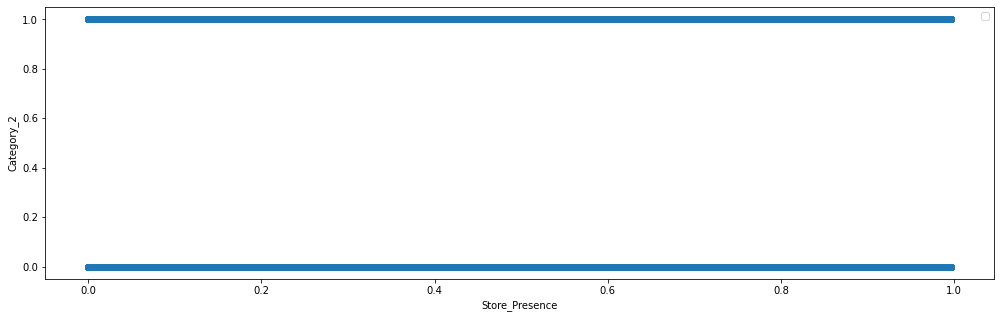

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


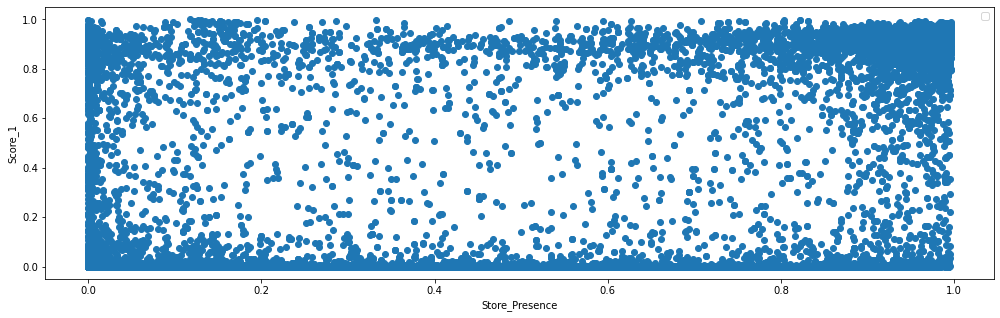

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


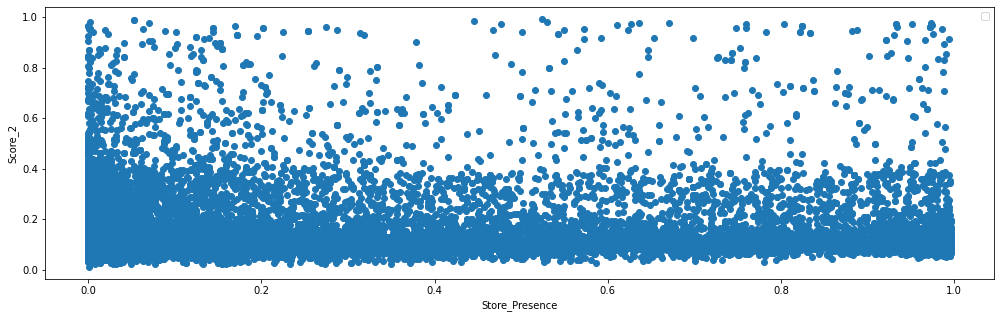

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


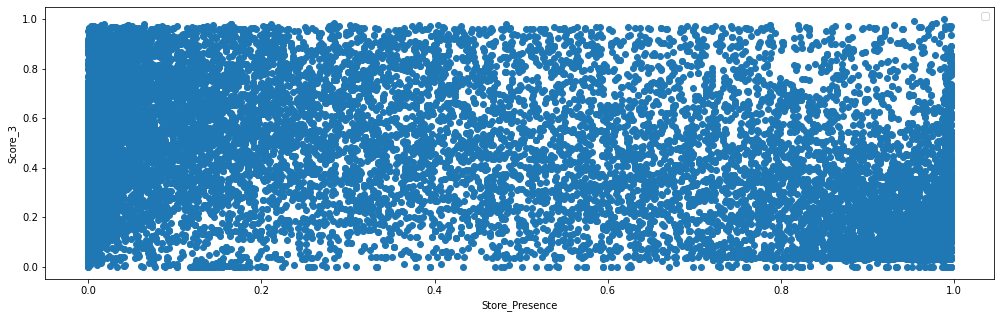

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


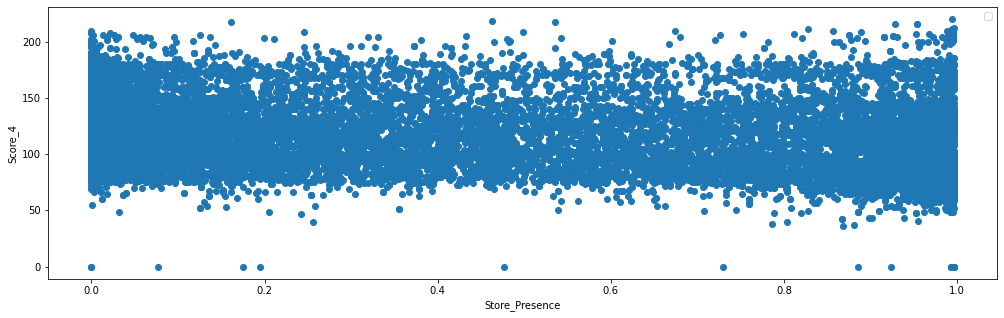

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


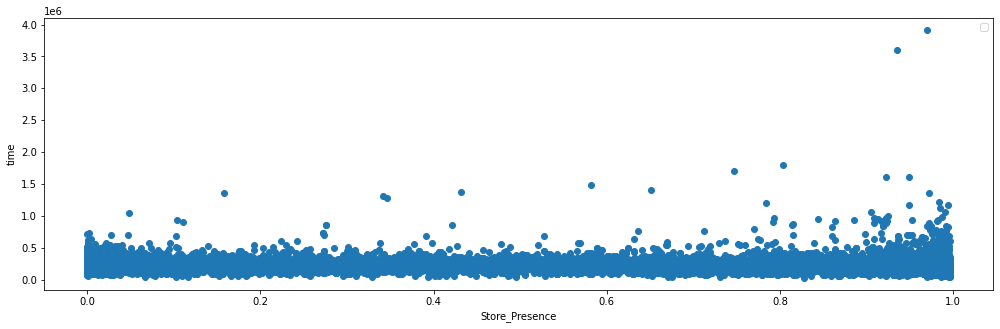

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


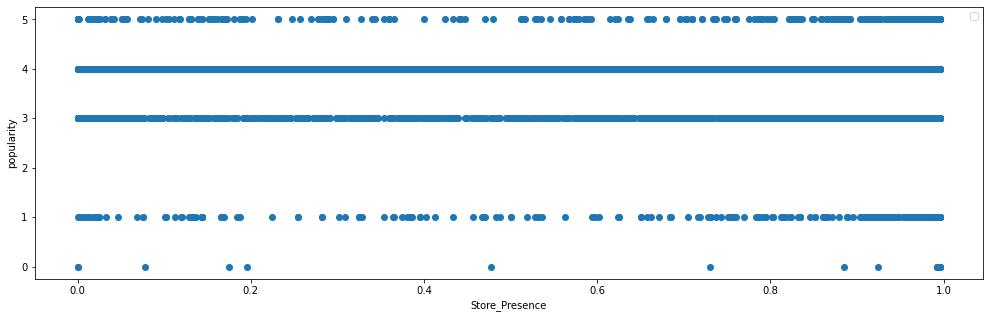

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


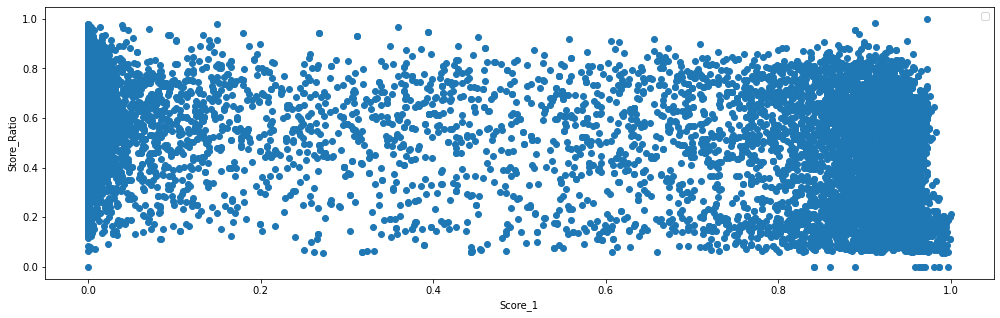

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


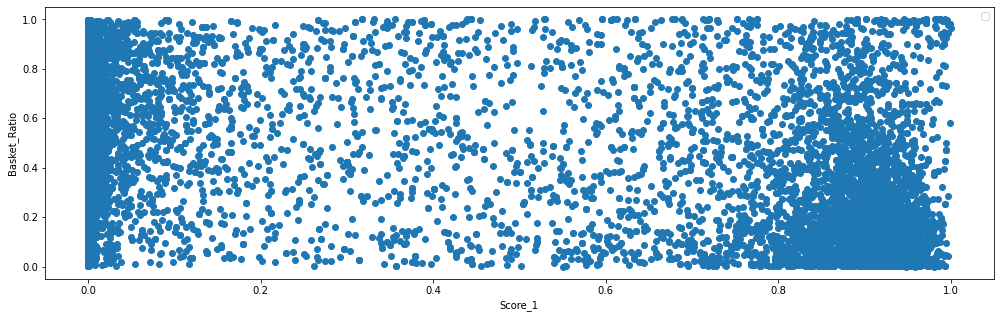

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


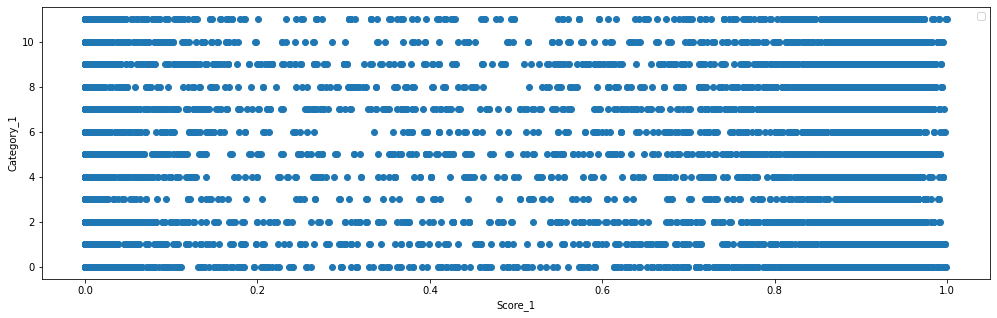

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


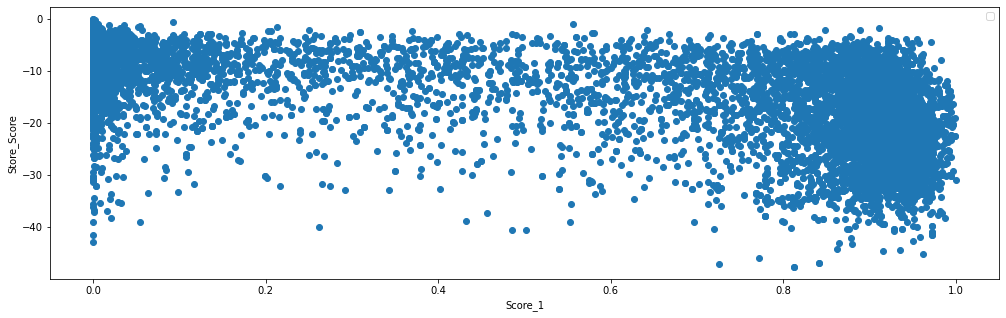

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


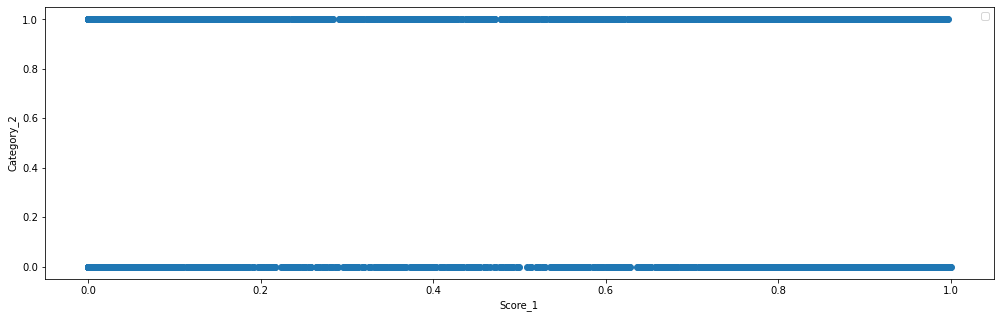

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


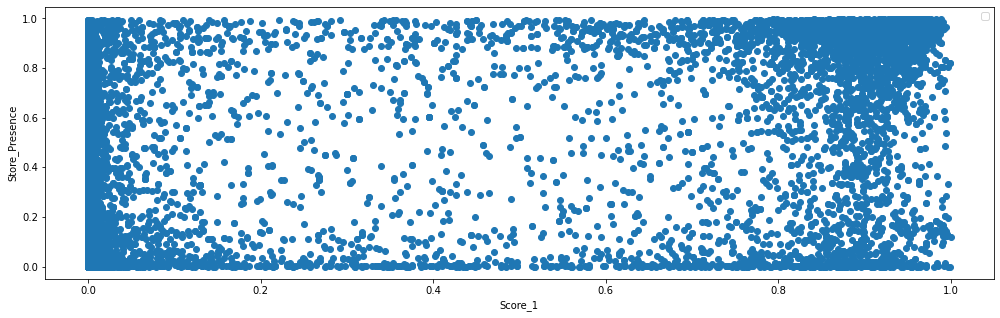

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


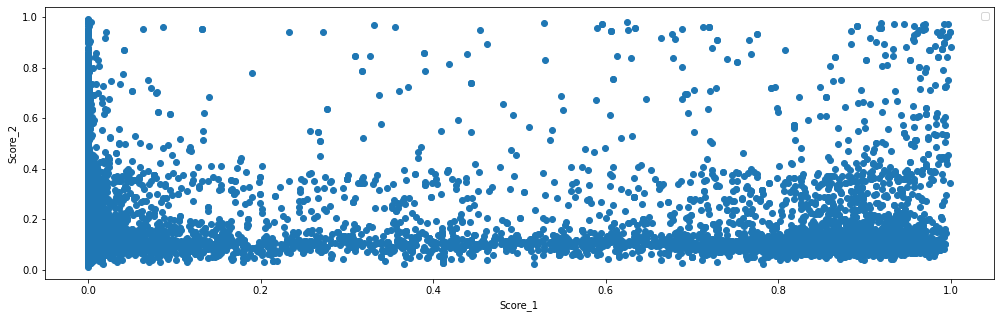

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


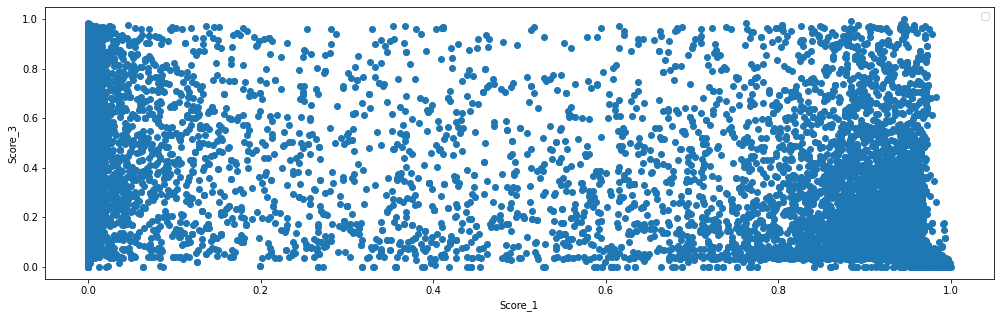

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


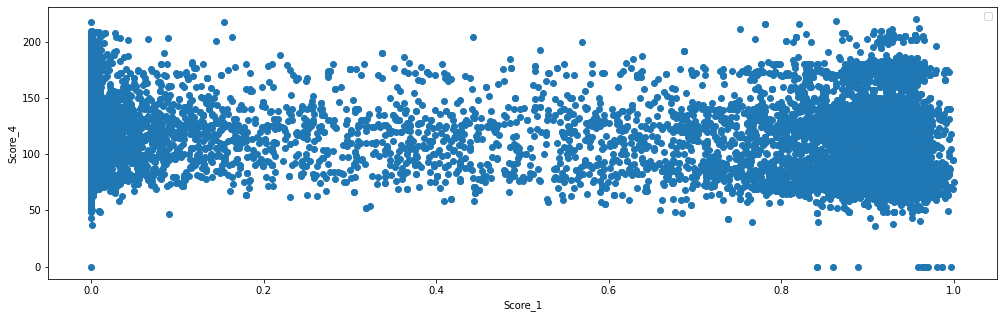

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


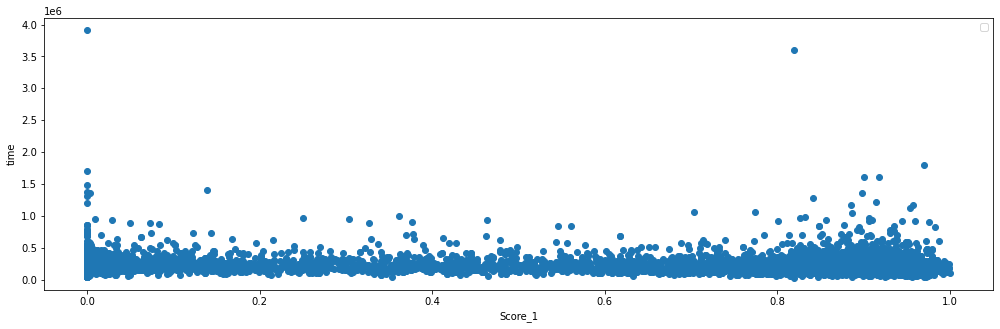

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


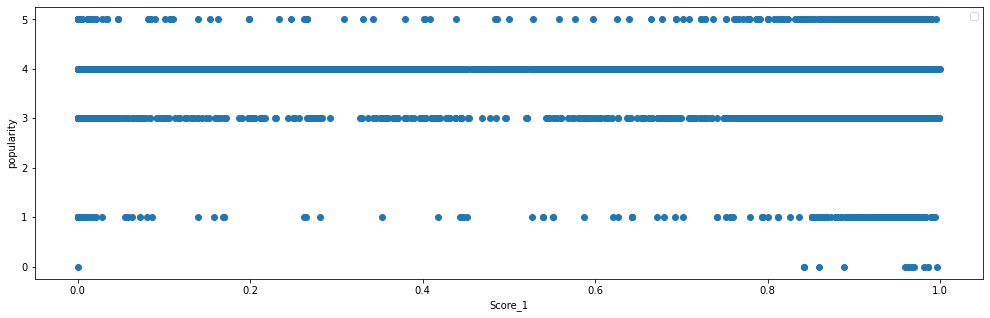

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


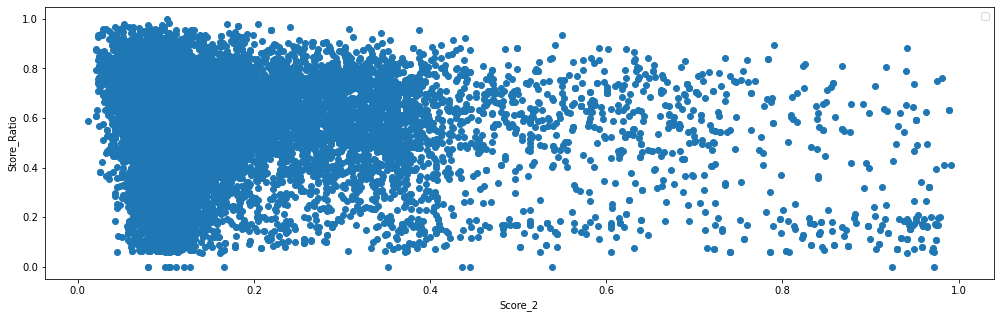

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


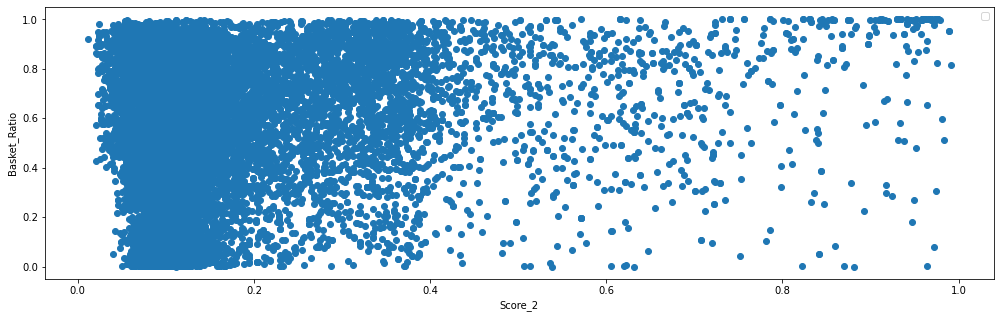

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


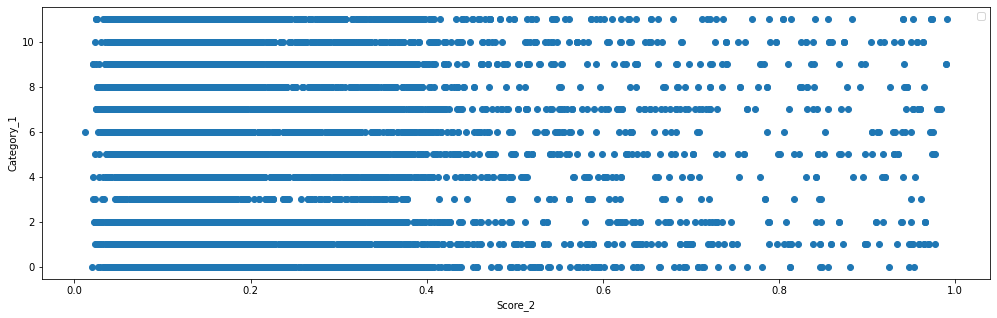

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


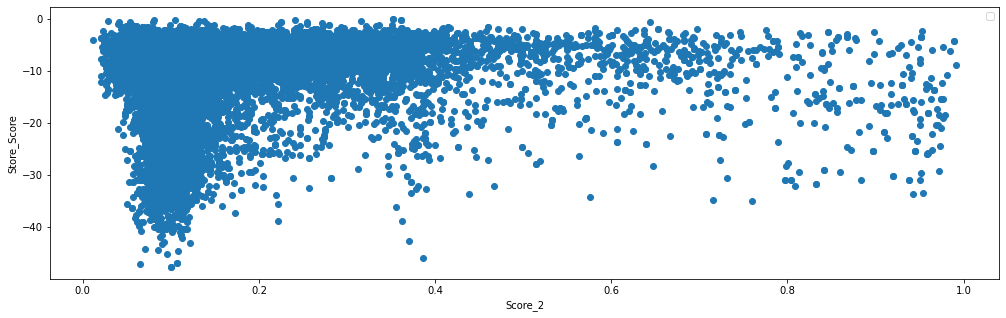

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


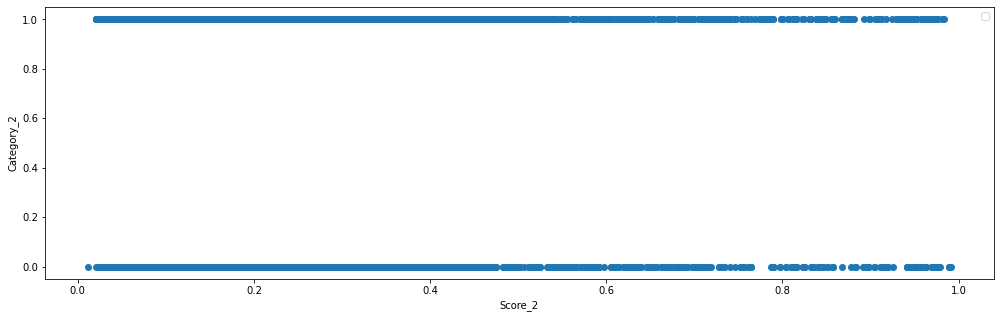

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


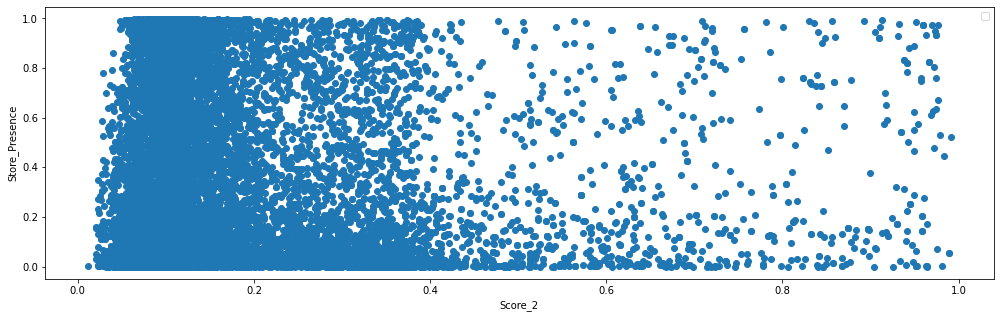

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


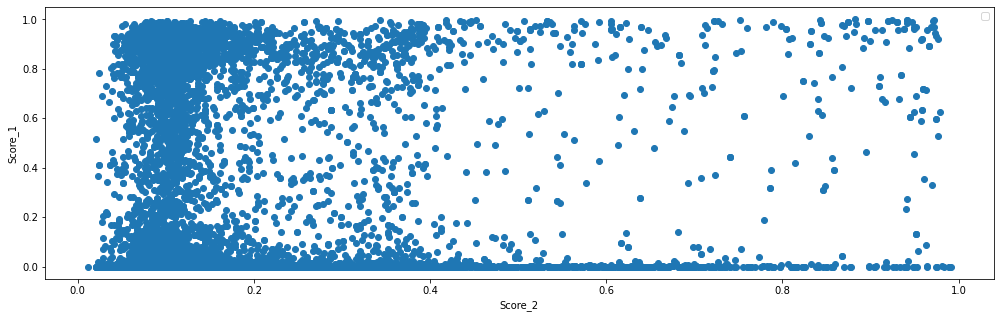

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


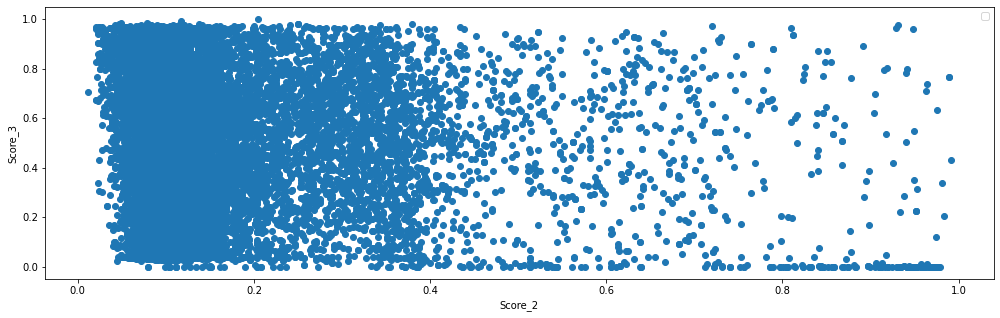

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


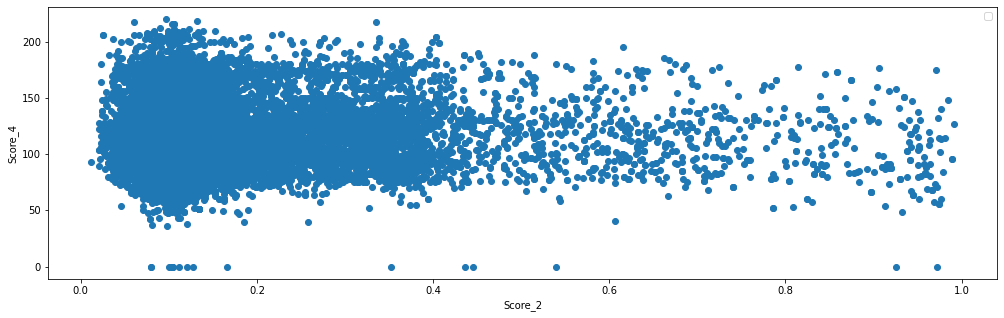

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


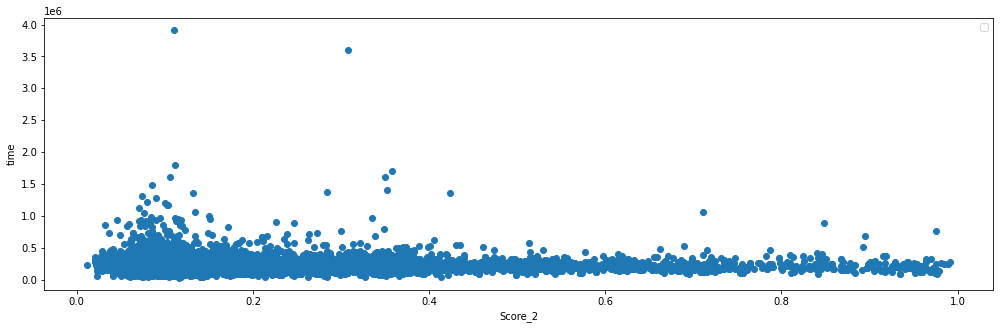

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


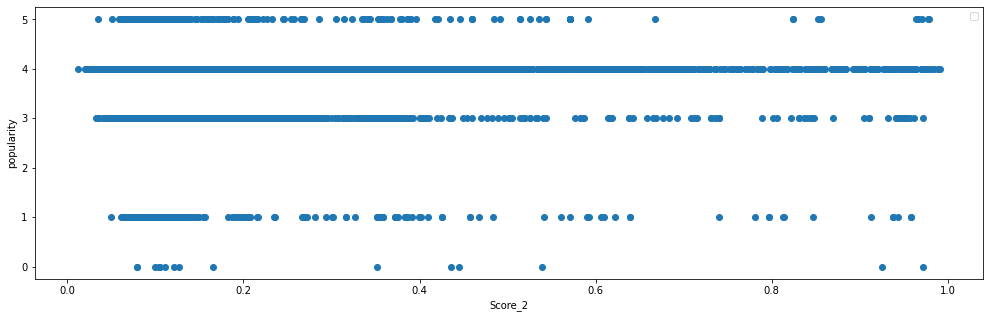

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


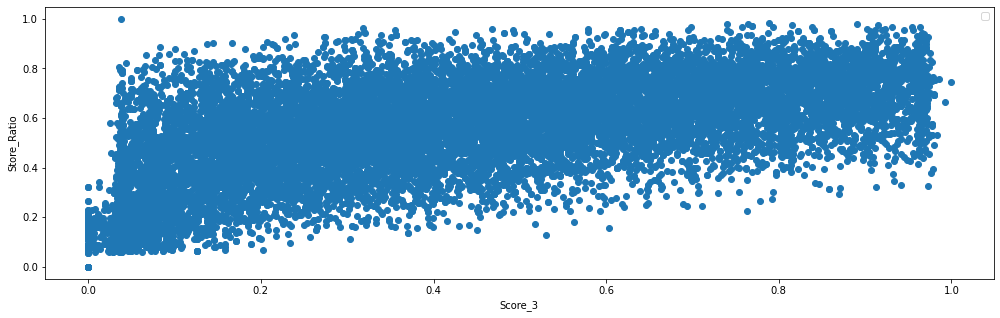

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


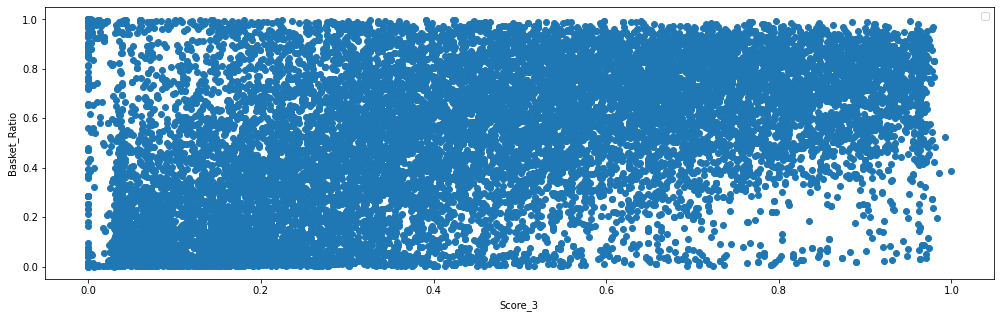

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


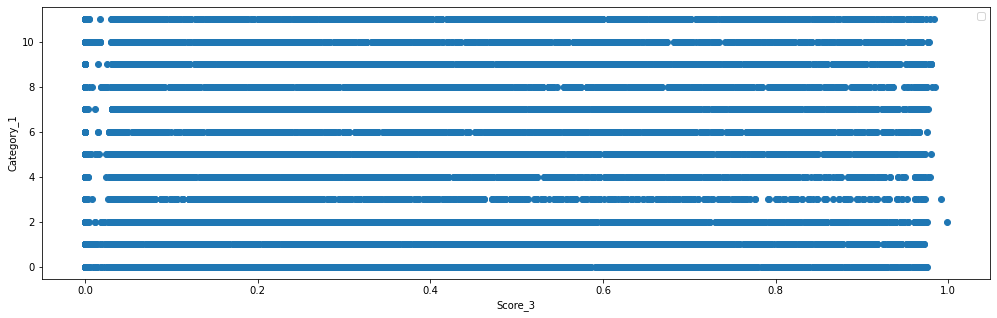

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


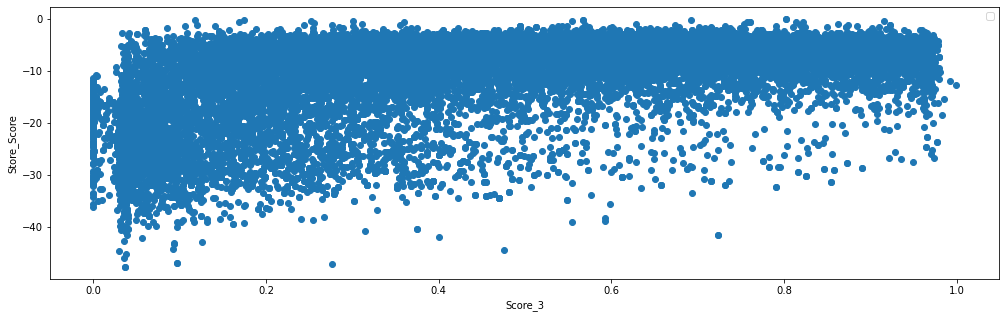

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


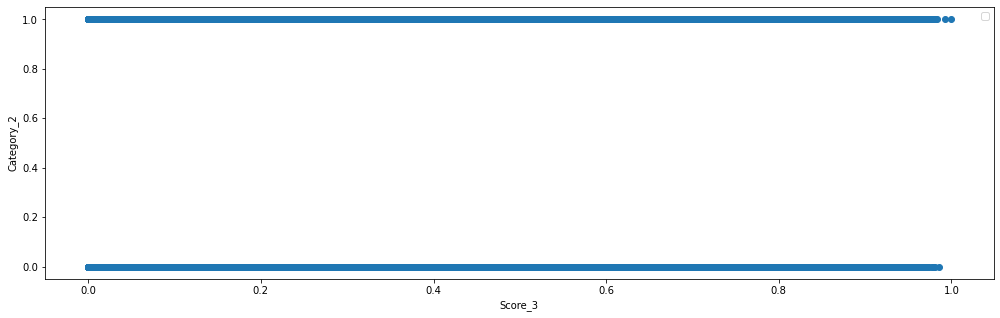

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


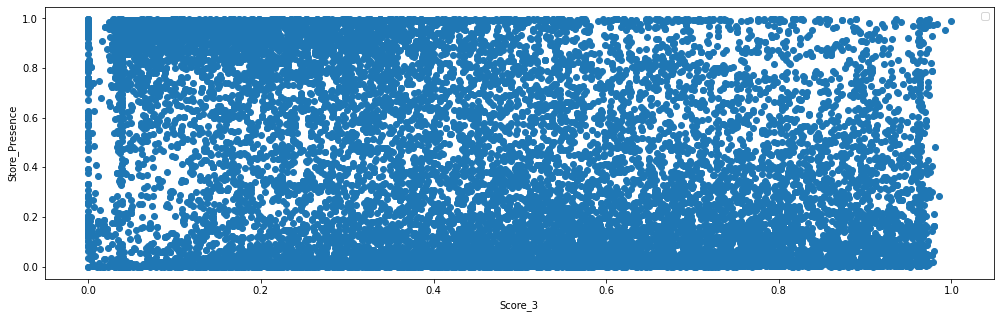

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


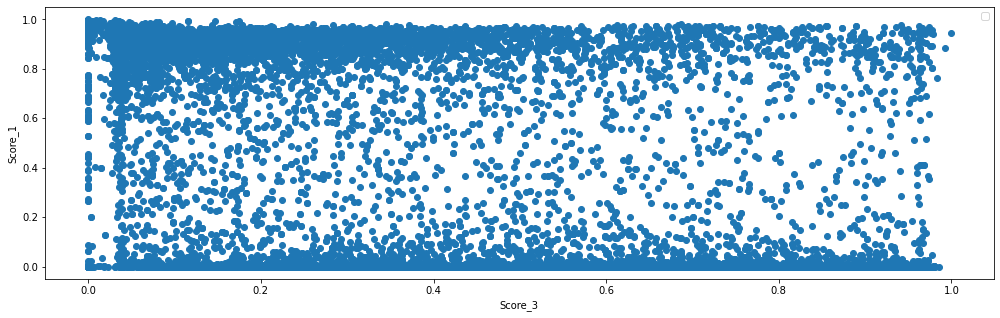

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


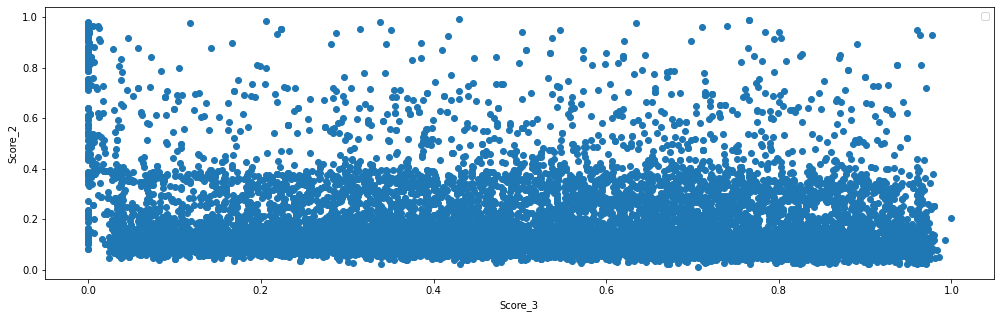

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


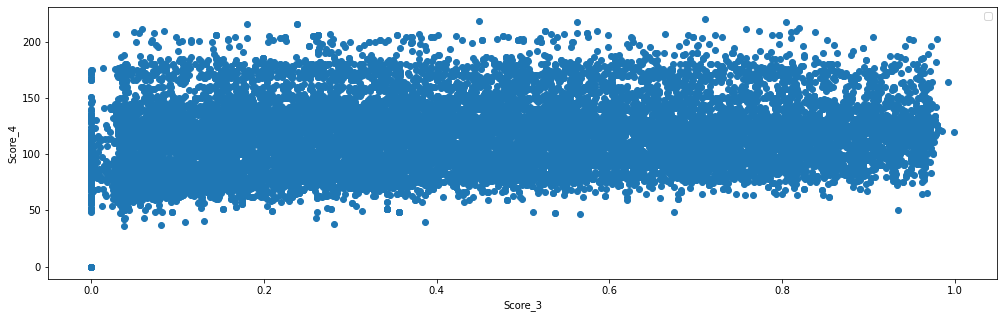

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


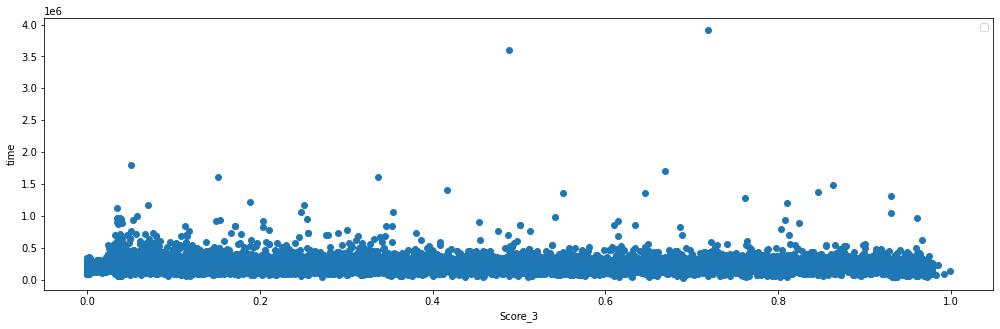

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


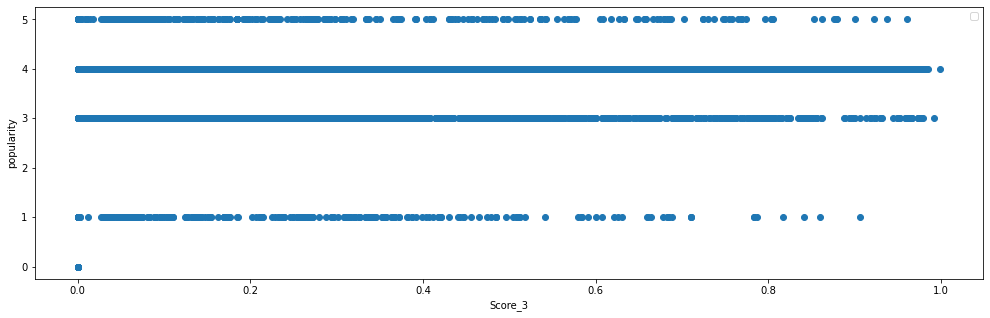

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


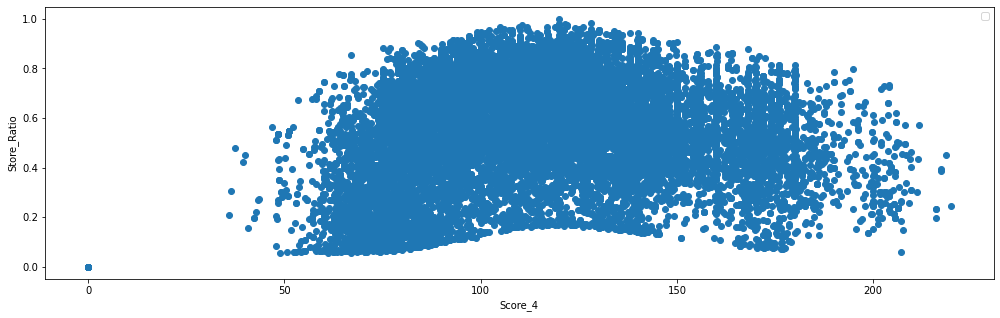

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


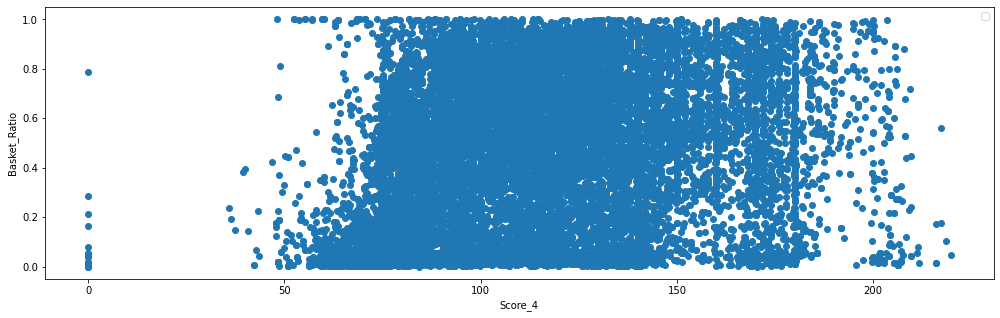

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


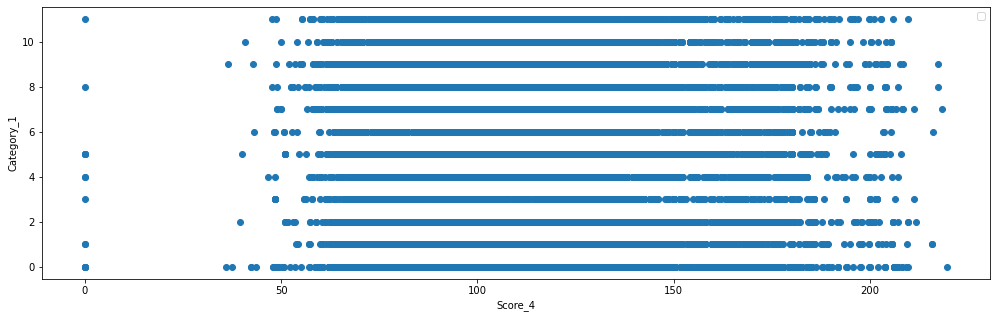

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


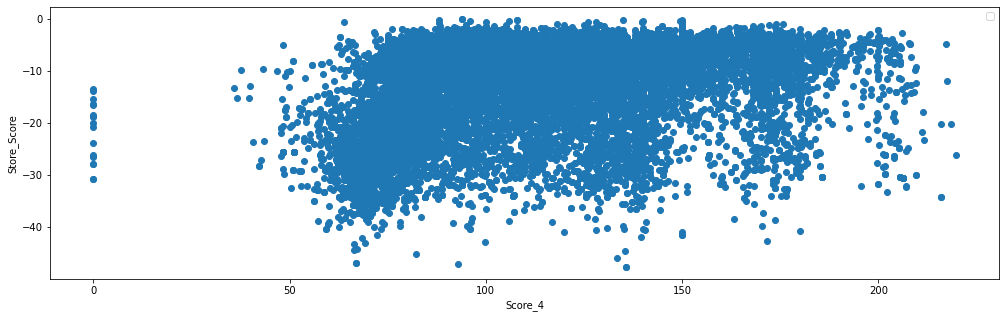

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


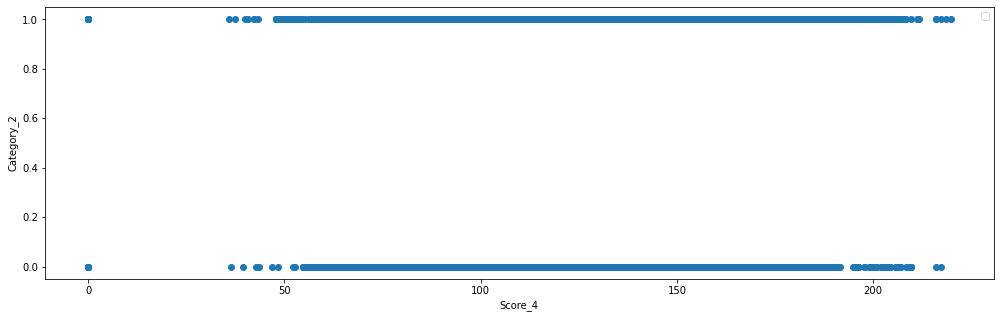

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


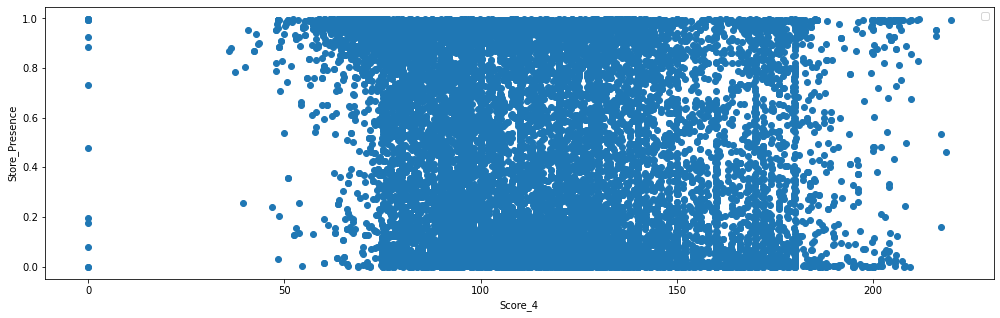

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


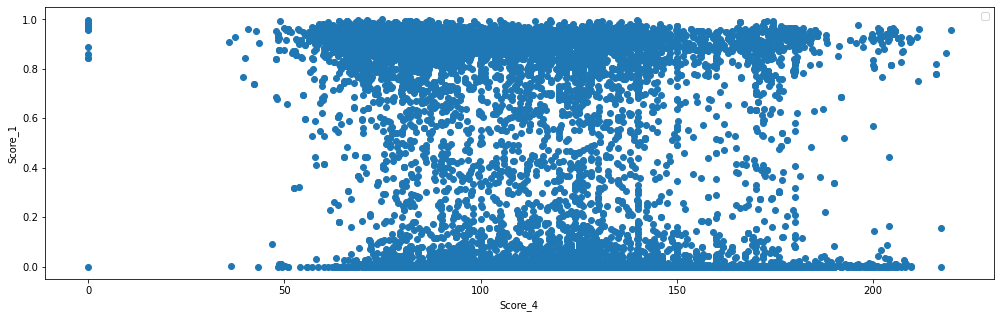

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


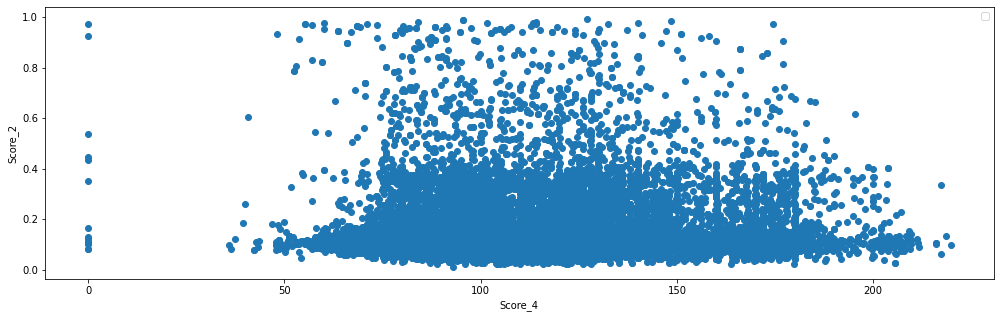

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


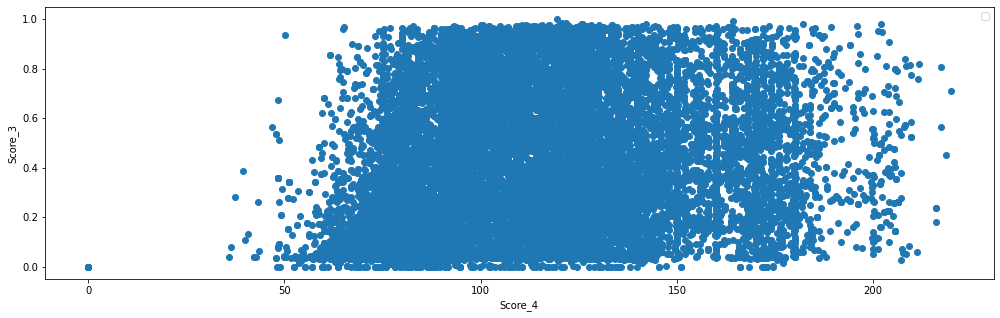

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


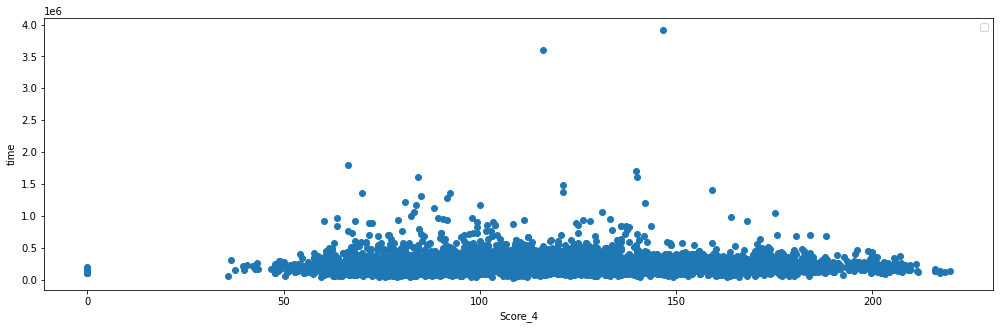

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


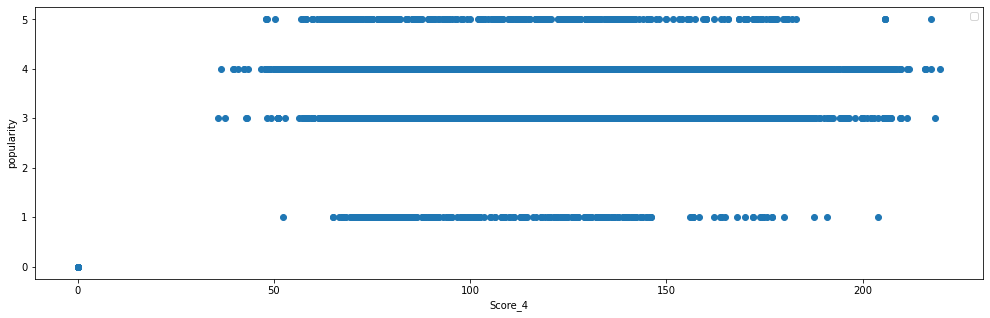

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


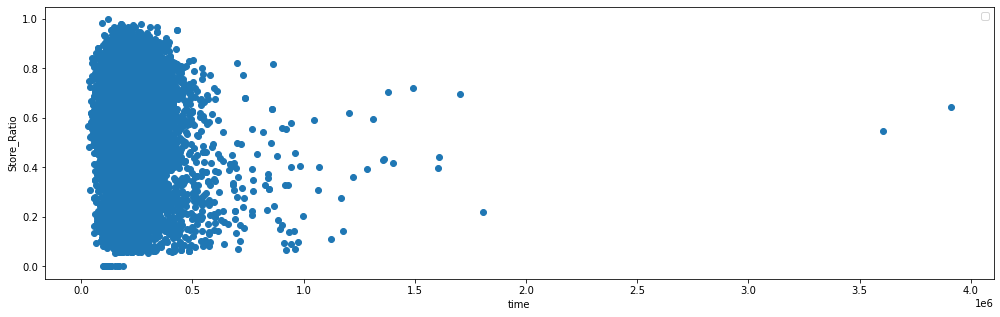

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


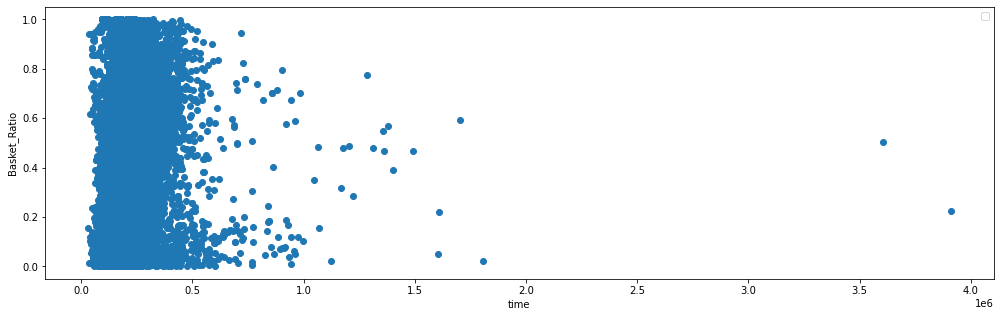

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


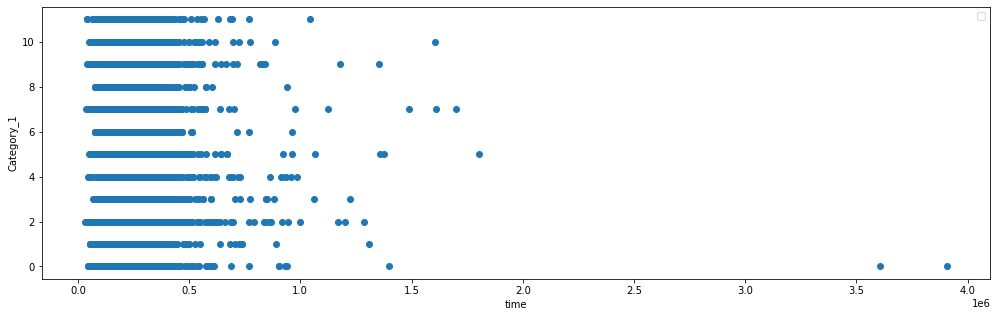

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


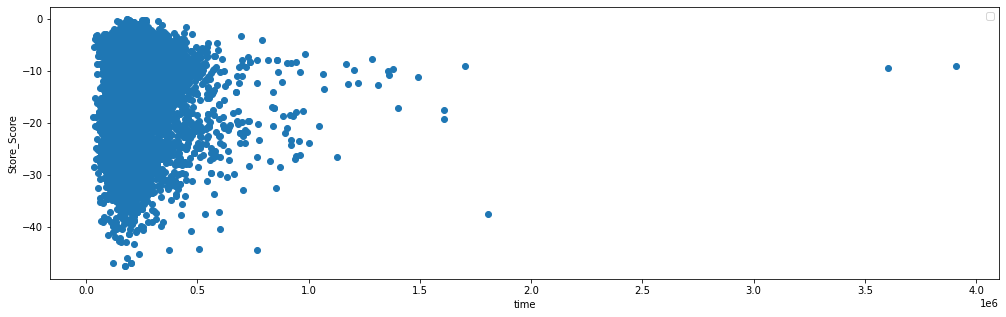

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


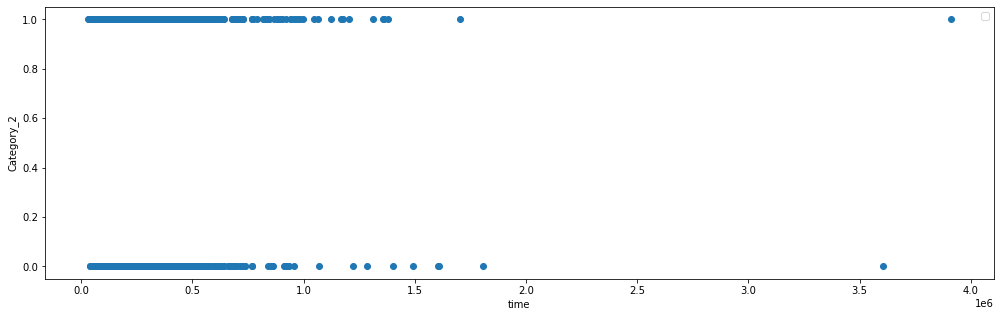

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


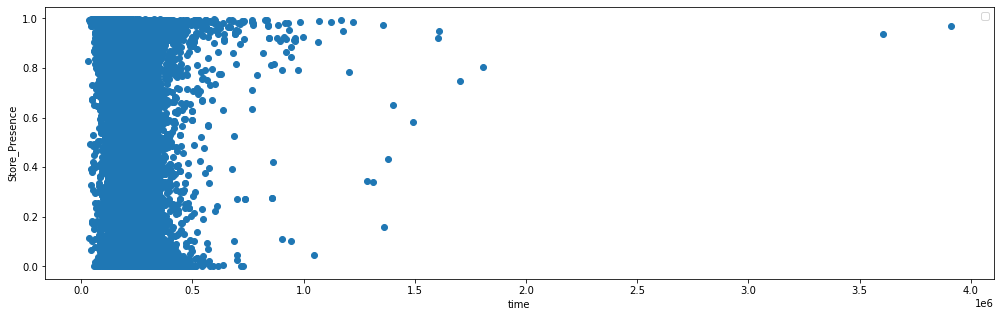

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


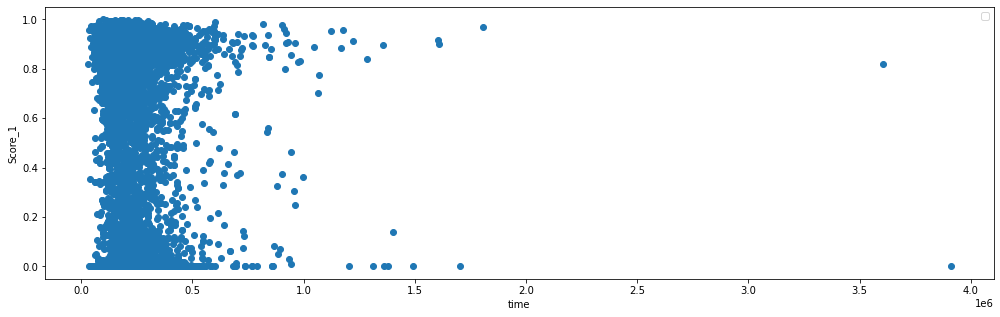

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


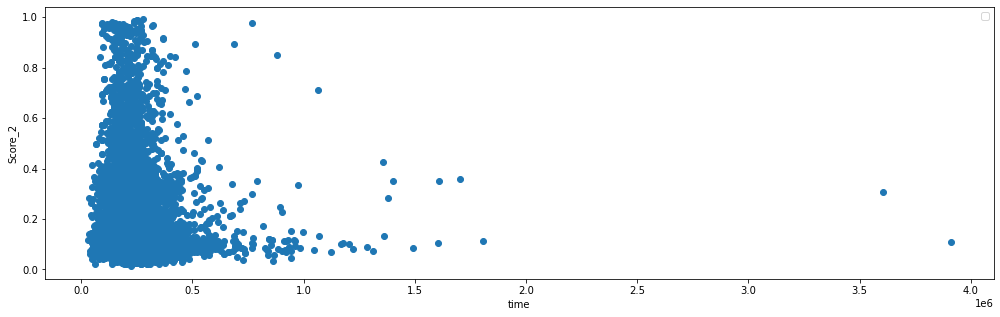

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


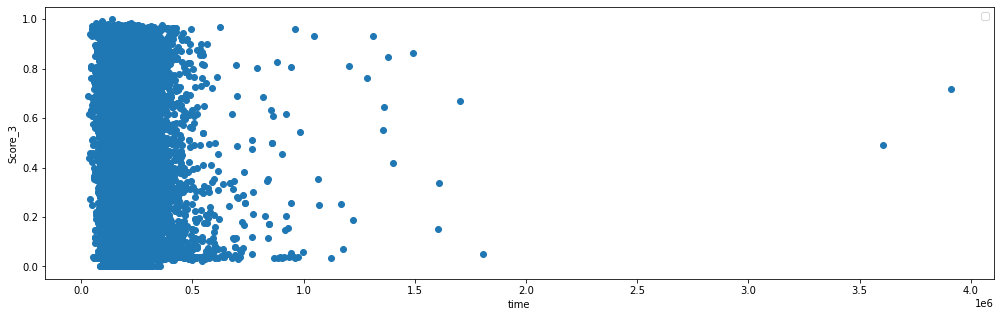

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


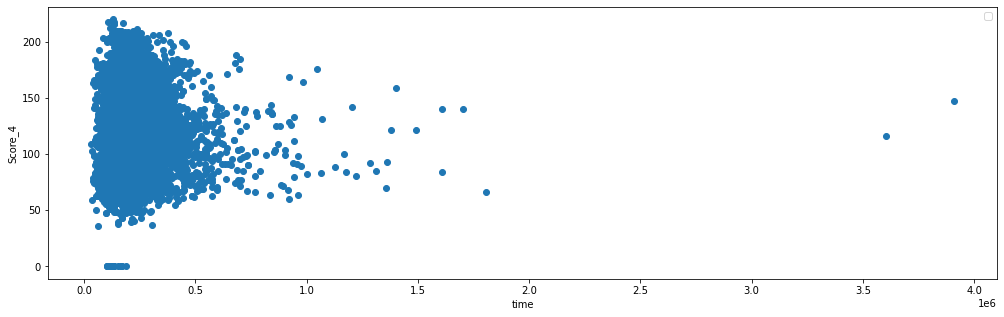

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


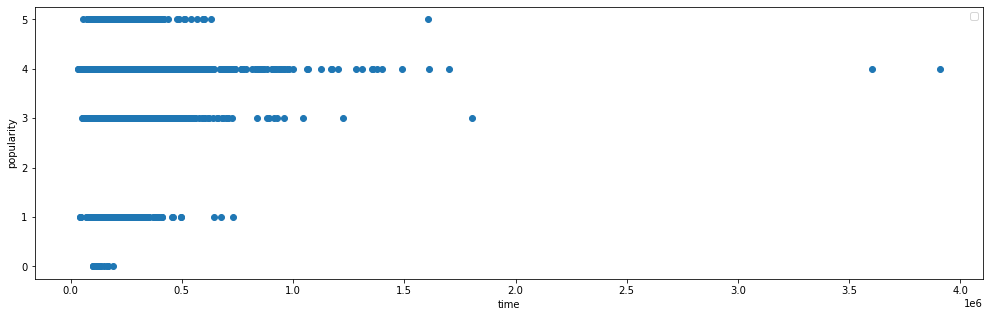

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


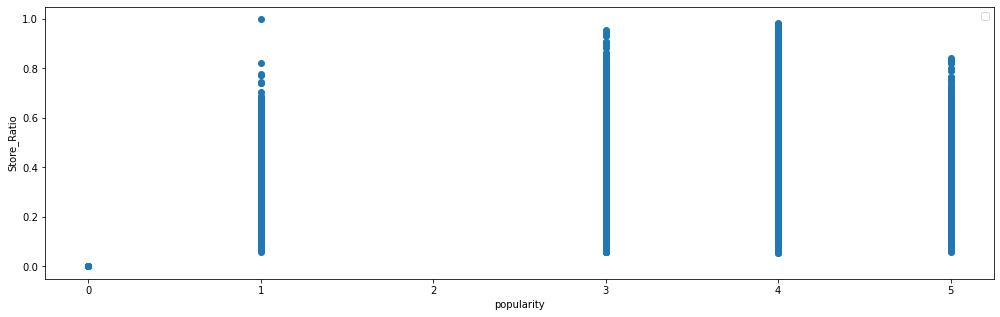

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


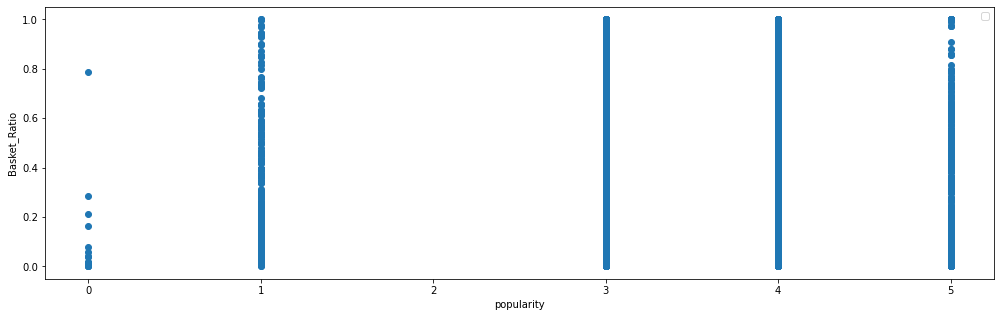

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


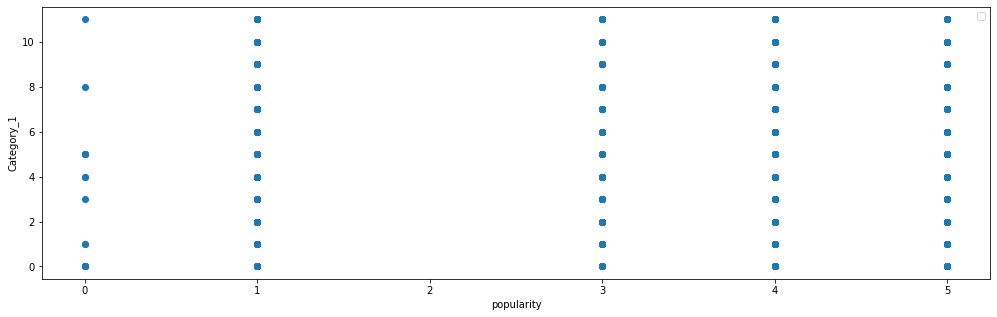

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


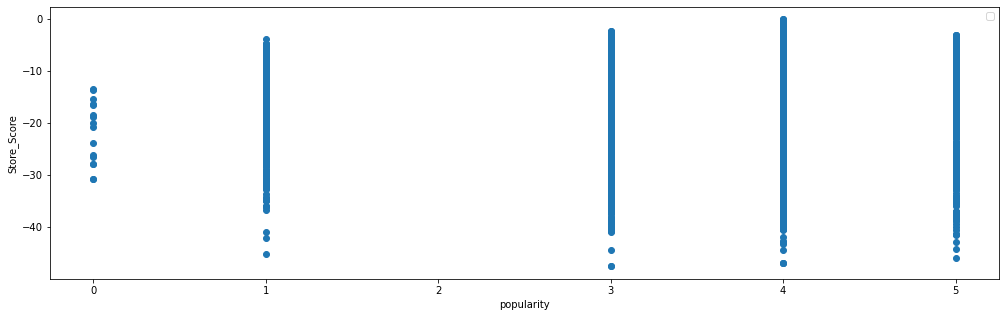

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


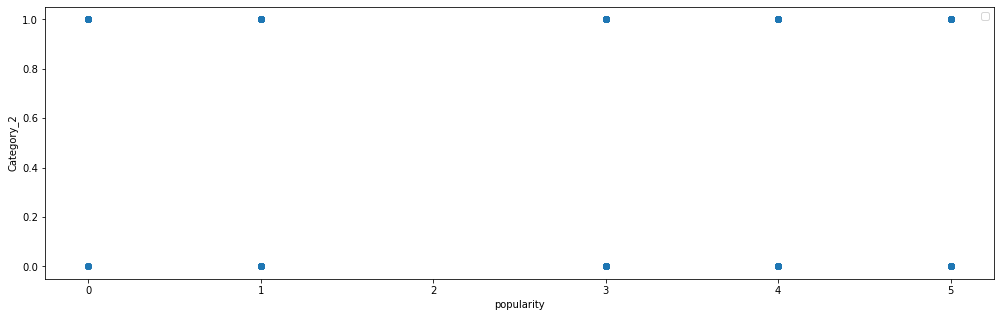

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


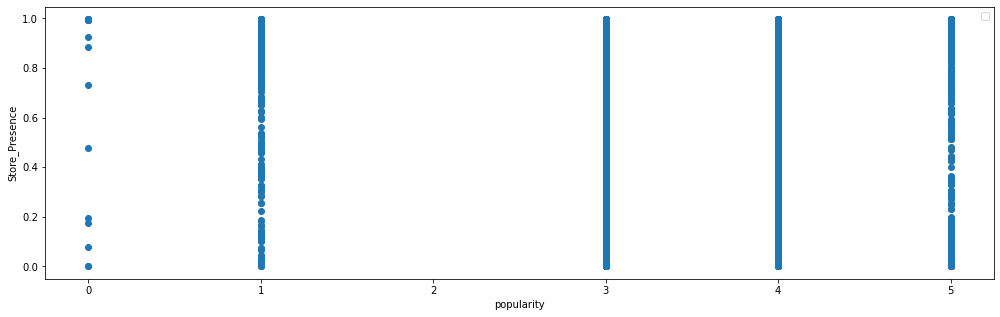

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


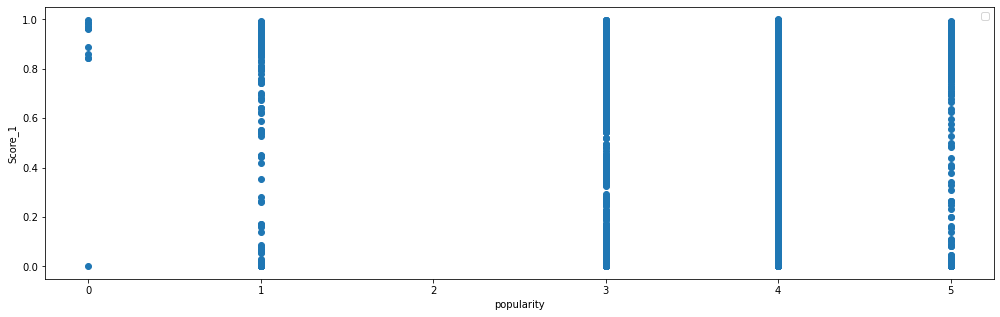

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


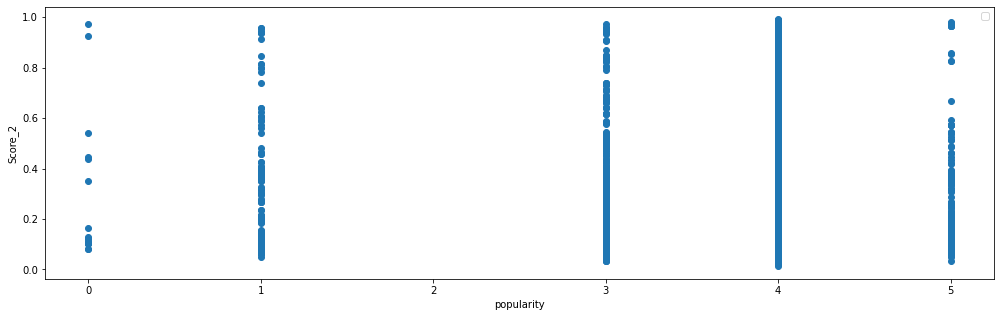

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


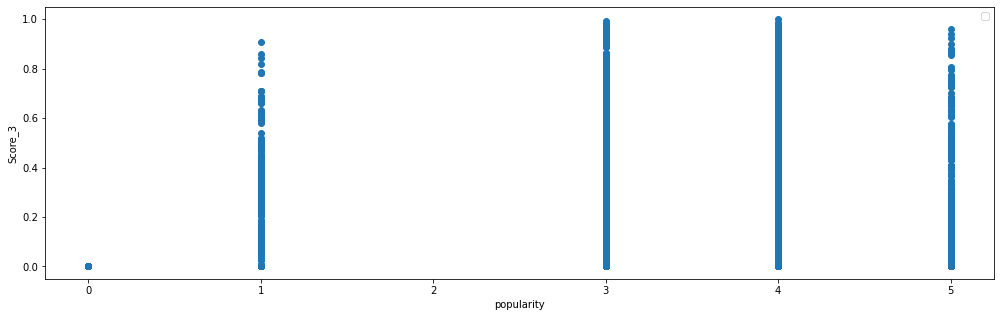

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


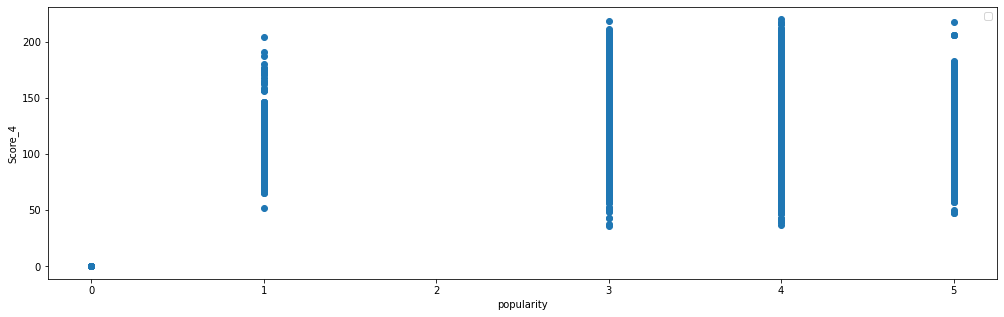

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


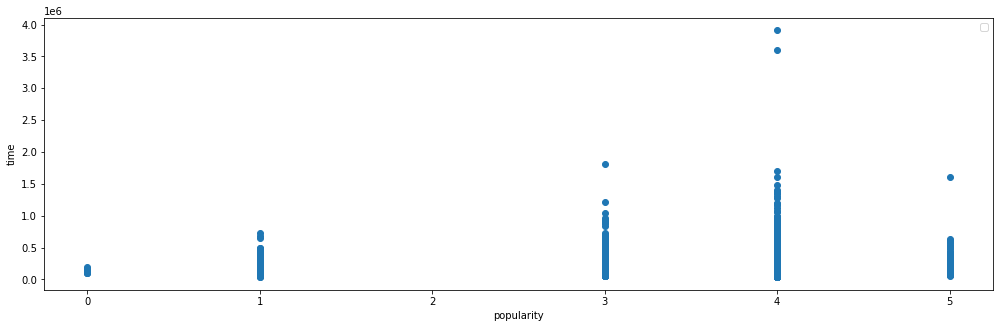

In [19]:
# perform scatterplot 
# Make a list of all the columns of train dataset
# Loop through the different columns 
def plot_scatter(x, y):
    plt.figure(figsize=(17,5))
    plt.scatter(x=train_data[x],y=train_data[y])
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
  
  # code here
    
for i in train_data.columns:
    for j in train_data.columns:
        if i==j:
            pass
        else:
            plot_scatter(i,j)

# ** Observations from above scatter plot **

1. As value of store presence increases value of basket ratio decreases.
2. As value of store scrore increases value of basket ratio increases.
3. Increase in value of store ratio results in the increase of basket ratio's value

# HISTOGRAM
1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<AxesSubplot:title={'center':'Store_Ratio'}>,
        <AxesSubplot:title={'center':'Basket_Ratio'}>,
        <AxesSubplot:title={'center':'Category_1'}>],
       [<AxesSubplot:title={'center':'Store_Score'}>,
        <AxesSubplot:title={'center':'Category_2'}>,
        <AxesSubplot:title={'center':'Store_Presence'}>],
       [<AxesSubplot:title={'center':'Score_1'}>,
        <AxesSubplot:title={'center':'Score_2'}>,
        <AxesSubplot:title={'center':'Score_3'}>],
       [<AxesSubplot:title={'center':'Score_4'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'popularity'}>]], dtype=object)

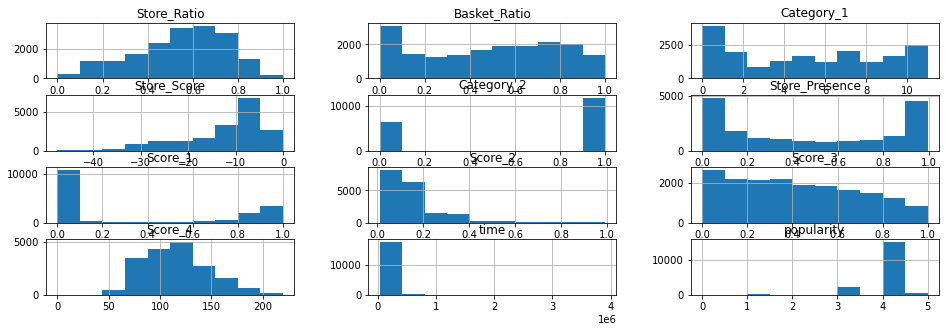

In [20]:
# perform histogram using pandas for all columns of train dataset
train_data.hist(figsize=(16,5))

# **observation from above histogram**
1. The data distribution of store presence is bimodal
2. Score_2, score 1, score3 and time data distribution is skewed left.
3. Store score and popularity data distribution is skewed right.
4. distribution of basket ratio, carwgort 1  is multimodal.
5. distribution of store eatio is bimodal and skewed



# VIF - Variance inflation factor

### 1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [21]:
#import statsmodel.api
import statsmodels.api as sm

In [22]:
# creating a dataframe of just numerical values
train_for_vif = train_data[['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score','Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3','Score_4', 'time', 'popularity']]


# target values
target = train_data['popularity']


# numerical values column names
names =['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score', 'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'time']



#print names
print(names)

['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score', 'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'time']


In [23]:
# droping rows with from new dataframe empty cells
train_for_vif.dropna(inplace=True)


In [24]:
# Calculating VIF for each feature.

  # taking one column as target variable

  # taking all other remaining columns as fetaure variable

  # firting the OLS model on y and x


  # geting the r^2 value of results.

  # calculating vif value

for i in range(0, len(names)):
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  x = train_for_vif.loc[:,train_for_vif.columns!=names[i]]
  model = sm.OLS(y,x,missing='drop')
  results = model.fit()
  rsq = results.rsquared
  vif = (1/(1-rsq),2)
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of Store_Ratio columns is 0.93 keeping all other columns as features
Variance inflation Factor of Store_Ratio columns is (14.914264777019437, 2) 

R Square value of Basket_Ratio columns is 0.93 keeping all other columns as features
Variance inflation Factor of Basket_Ratio columns is (14.970646478005305, 2) 

R Square value of Category_1 columns is 0.68 keeping all other columns as features
Variance inflation Factor of Category_1 columns is (3.1321829300149187, 2) 

R Square value of Store_Score columns is 0.91 keeping all other columns as features
Variance inflation Factor of Store_Score columns is (11.643901376334695, 2) 

R Square value of Category_2 columns is 0.65 keeping all other columns as features
Variance inflation Factor of Category_2 columns is (2.867206563826185, 2) 

R Square value of Store_Presence columns is 0.86 keeping all other columns as features
Variance inflation Factor of Store_Presence columns is (7.133915117826698, 2) 

R Square value of Score_1 

### Observations:

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time they all have colinearity with all the variables.

# BOX PLOT

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

<AxesSubplot:>

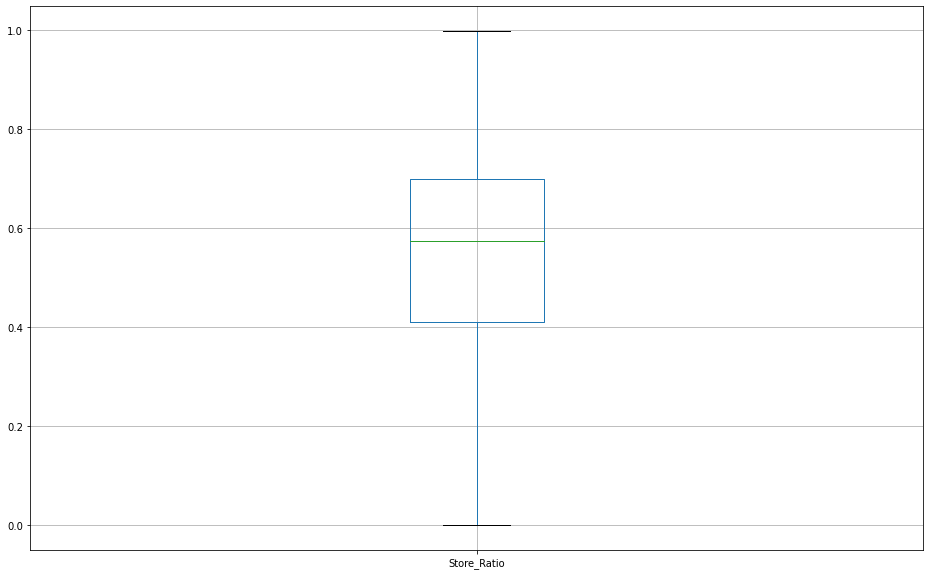

In [25]:
# Perform a box plot on Store_Ratio 
train_data.boxplot(column='Store_Ratio',figsize=(16,10))


from above box plot graph:

Store ratio

1. 25% of  store ratio have value between range 0 to 0.4.

2. 25% of store ratio have value between range 0.4 to 0.6.
3. 25% of store ratio have value between range 0.6 to 0.7.
4. 25% of store ratio have value between range 0.7 to 1.

The mean store ratio is around 6.

<AxesSubplot:>

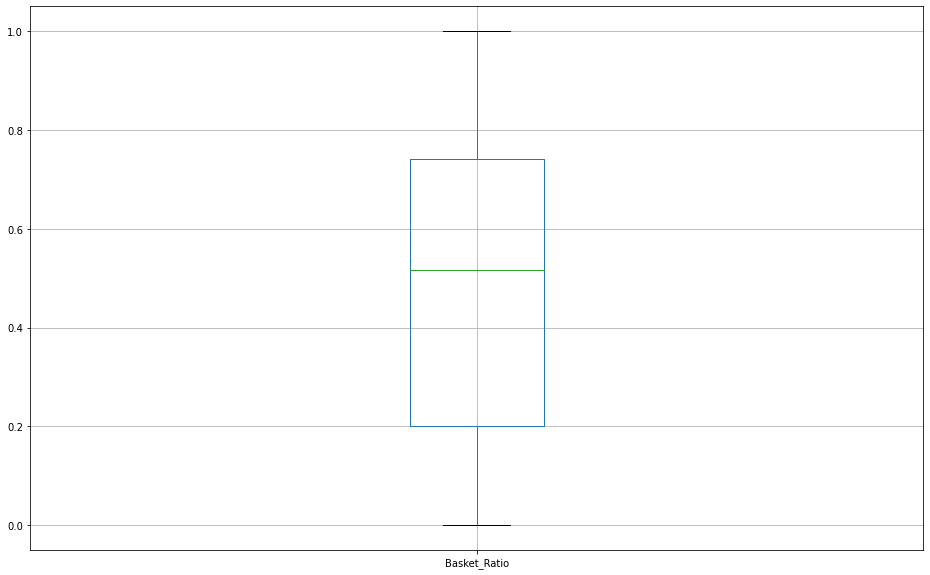

In [26]:
# Perform a box plot on Basket_Ratio 
train_data.boxplot(column='Basket_Ratio',figsize=(16,10))


### from above box plot graph:

basket ratio

1. 25% of  basket ratio have value between range 0 to 0.2.
2. 25% of basket ratio have value between range 0.4 to 0.52
3. 25% of basket ratio have value between range 0.52 to 0.78.
4. 25% of basket ratio have value between range 0.78 to 1.

The mean basket ratio is around 0.52

<AxesSubplot:>

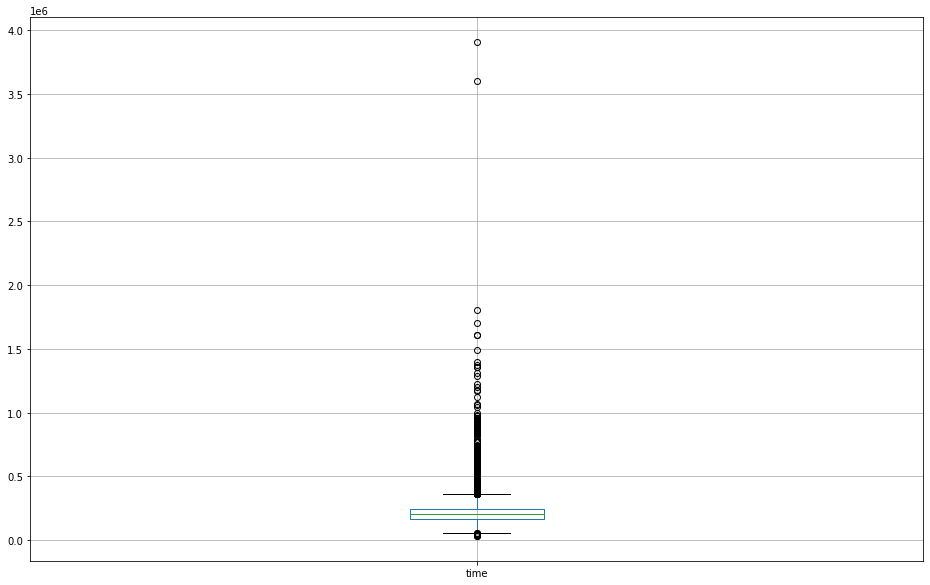

In [27]:
# Perform a box plot on time
train_data.boxplot(column='time',figsize=(16,10))


from above box plot graph:

time

1. 25% of  time have value between range 0 to 0.2.

2. 25% of time have value between range 0.2 to 0.25
3. 25% of time have value between range 0.25 to 0.3.
4. 25% of time have value between range 0.3 to 0.4

The mean time is around 0.25

<AxesSubplot:>

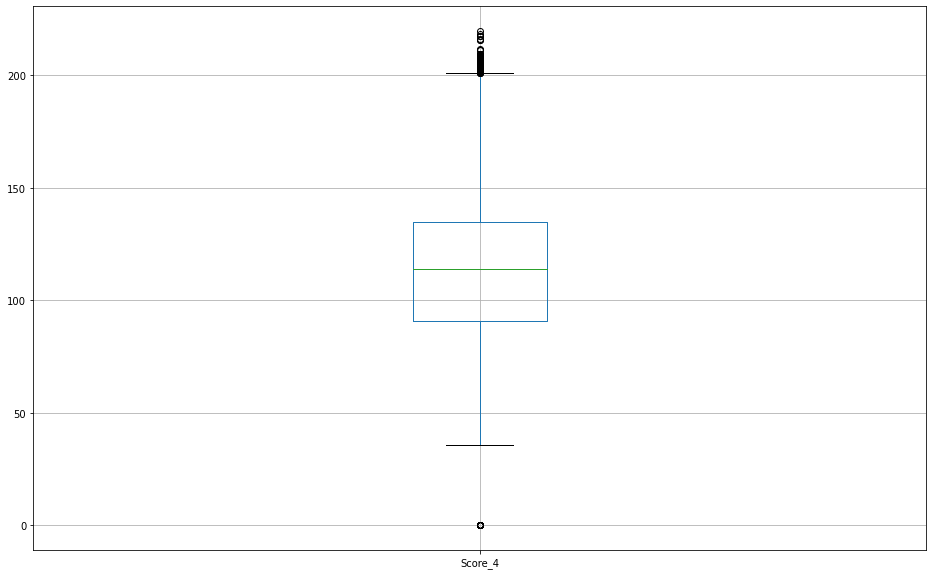

In [28]:
# Perform a box plot on Score_4 
train_data.boxplot(column='Score_4',figsize=(16,10))

### from above box plot graph:

score 4

1. 25% of  score 4 have value between range 40 to 90.

2. 25% of score 4 have value between range 90 to 125
3. 25% of score 4 have value between range 125 to 140.
4. 25% of score 4 have value between range 140 to 200.

The mean score 4 is around 125

<AxesSubplot:>

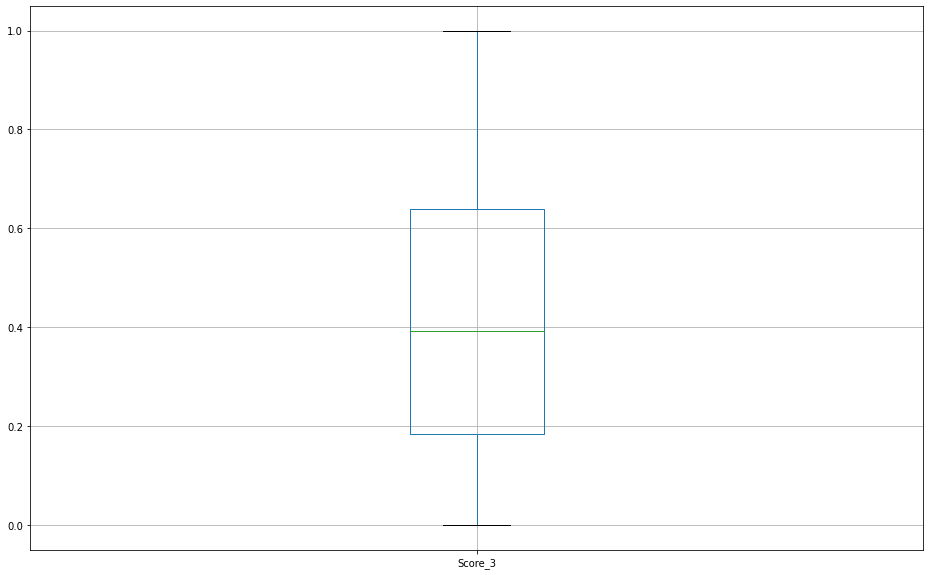

In [29]:
# Perform a box plot on Score_3 
train_data.boxplot(column='Score_3',figsize=(16,10))

### from above box plot graph:

score3

1. 25% of  score3 have value between range 0 to 0.2.

2. 25% of score3 have value between range 0.2 to 0.4
3. 25% of score3 have value between range 0.4 to 0.62.
4. 25% of score3 have value between range 0.62 to 1.

The mean score3 is around 0.4

<AxesSubplot:>

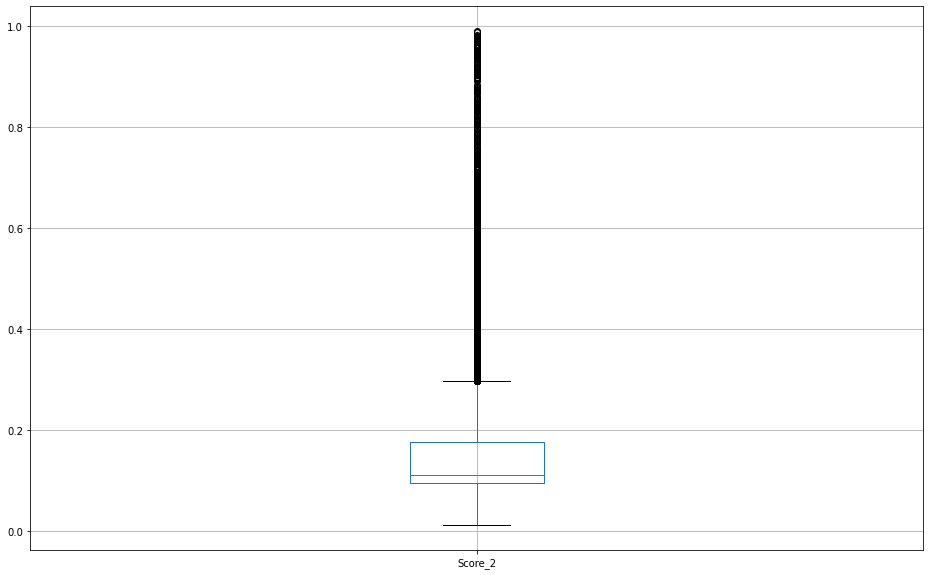

In [30]:
# Perform a box plot on Score_2 
train_data.boxplot(column='Score_2',figsize=(16,10))

### from above box plot graph:

score2

1. 25% of  score2 have value between range 0 to 0.1.

2. 25% of score2 have value between range 0.1 to 0.12
3. 25% of score2 have value between range 0.12 to 0.18.
4. 25% of score2 have value between range 0.18 to 1.

The mean score2 is around 0.12

<AxesSubplot:>

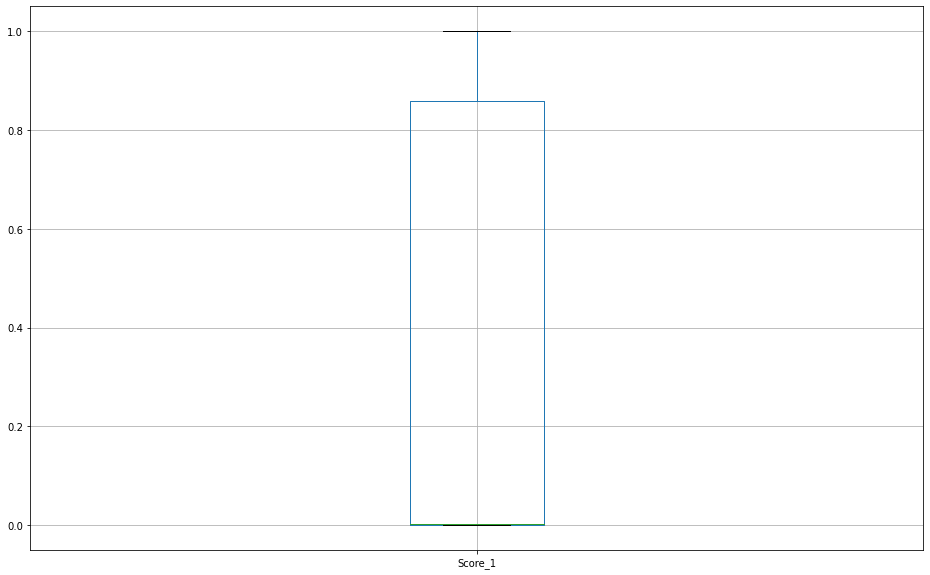

In [31]:
# Perform a box plot on Score_1 
train_data.boxplot(column='Score_1',figsize=(16,10))

### from above box plot graph:

score1

1. 25% of  score1 have value between range 0 to 0.0.

2. 25% of score1 have value between range 0.0 to 0.0
3. 25% of score1 have value between range 0.0 to 0.9
4. 25% of score1 have value between range 0.9 to 1.

The mean score1 is around 0.0

<AxesSubplot:>

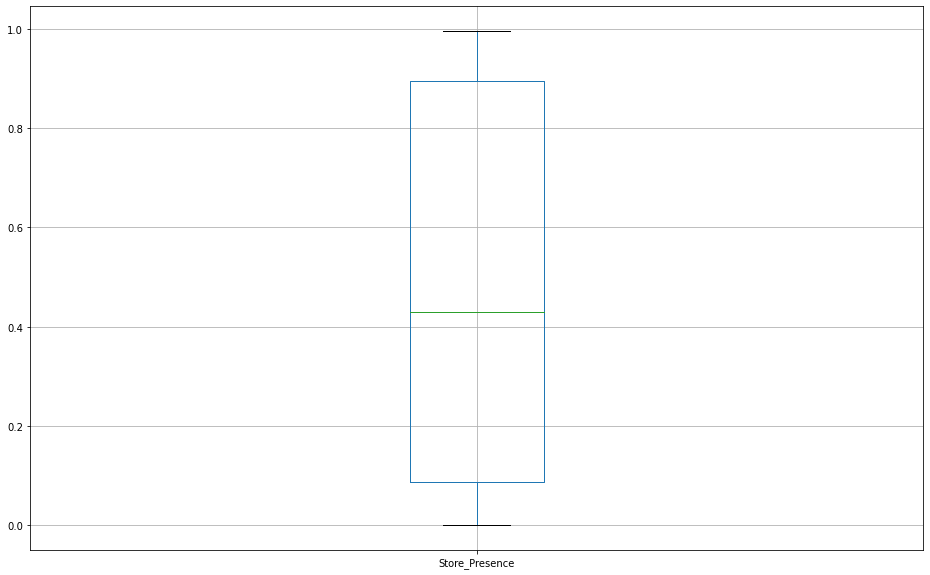

In [32]:
# Perform a box plot on Store_Presence 
train_data.boxplot(column='Store_Presence',figsize=(16,10))

#### from above box plot graph:

store presence

1. 25% of  store presence have value between range 0 to 0.35.

2. 25% of store presence have value between range 0.35 to 0.42
3. 25% of store presence have value between range 0.42 to 0.95.
4. 25% of store presence have value between range 0.95 to 1.

The mean store presence is around 0.42

<AxesSubplot:>

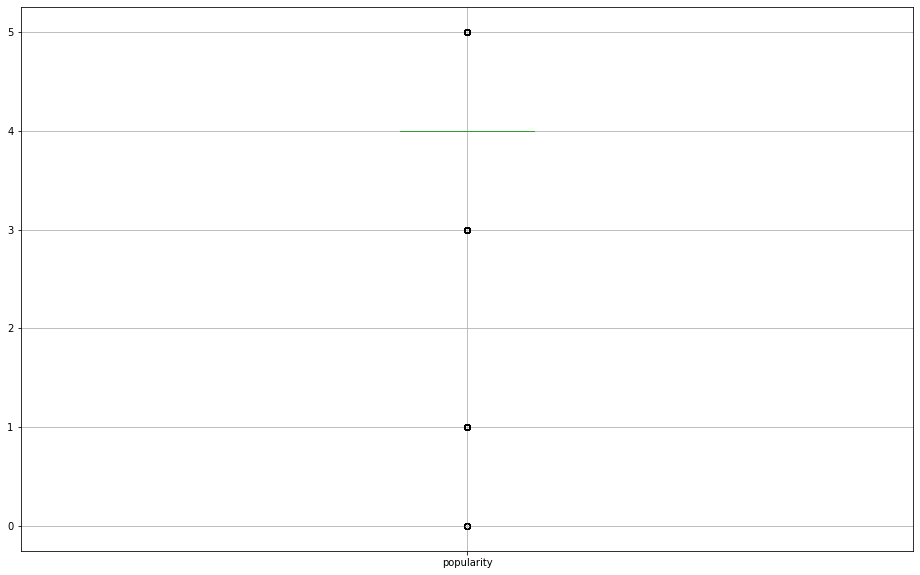

In [33]:
# Perform a box plot on popularity
train_data.boxplot(column='popularity',figsize=(16,10))

# COUNT PLOT
1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='popularity', ylabel='count'>

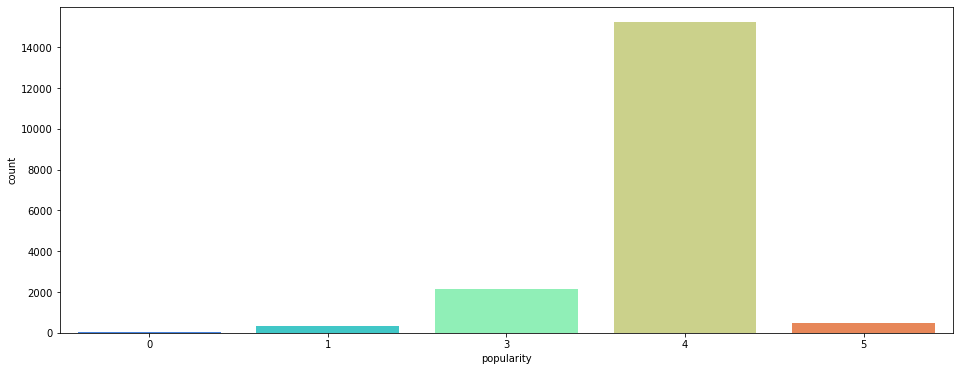

In [34]:
# Perform the countplot on the popularity
plt.figure(figsize=(16,6))
sns.countplot(train_data['popularity'],palette='rainbow')

##### From above count plot

we can observe that the dataset is imbalanced.

<AxesSubplot:xlabel='Category_1', ylabel='count'>

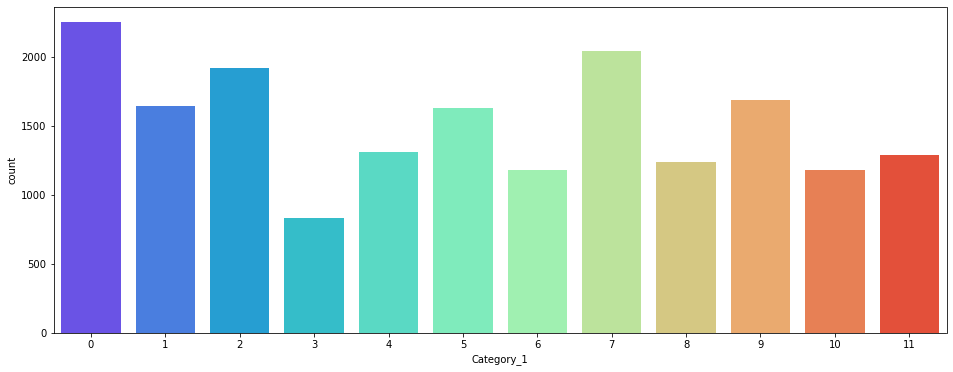

In [35]:
# Perform the countplot on the category_1
plt.figure(figsize=(16,6))
sns.countplot(train_data['Category_1'],palette='rainbow')

distribution of values over complete dataset is multimodal

# point PLOT

1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

<AxesSubplot:xlabel='Store_Ratio', ylabel='Basket_Ratio'>

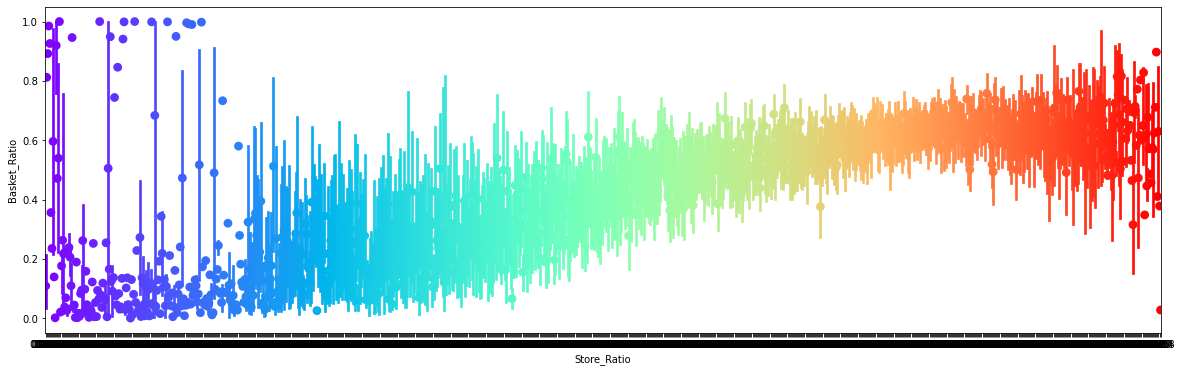

In [36]:
# Perform point plot between Store Ratio and Basket Ratio
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Basket_Ratio', data=train_data, palette='rainbow')


#### From above point plot

There is a increase in basket ratio when there is a increase in store ratio. That is both are correlated

<AxesSubplot:xlabel='Store_Ratio', ylabel='Store_Score'>

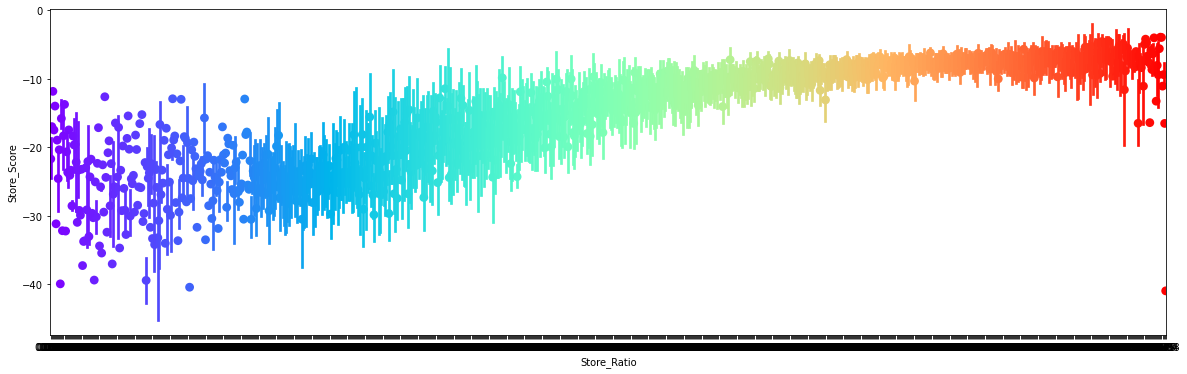

In [37]:
# Perform point plot between Store Ratio and Store Score
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Store_Score', data=train_data, palette='rainbow')


#### From above point plot

There is a increase in store score when there is a increase in store ratio. That is both are correlated

<AxesSubplot:xlabel='Store_Ratio', ylabel='Store_Presence'>

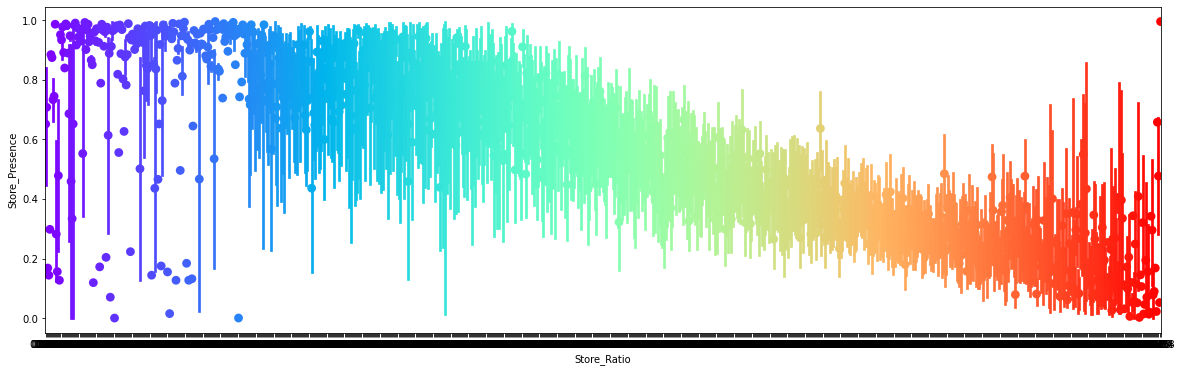

In [38]:
# Perform point plot between Store Ratio and Store Presence
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Store_Presence', data=train_data, palette='rainbow')


### From above point plot

There is a increase in store ratio when there is a decrease in store presence.

<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_1'>

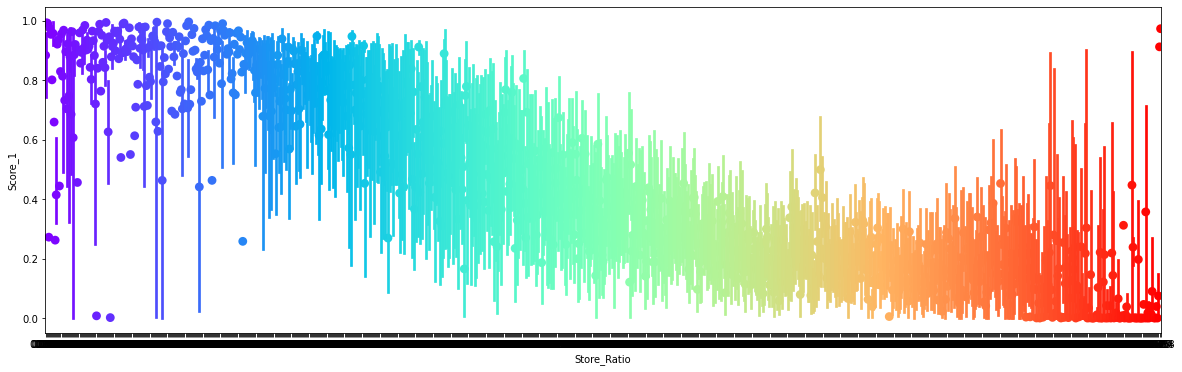

In [39]:
# Perform point plot between Store Ratio and Score 1
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_1', data=train_data, palette='rainbow')


### From above point plot

There is a decrease in score3 when there is a increase in store ratio.

<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_2'>

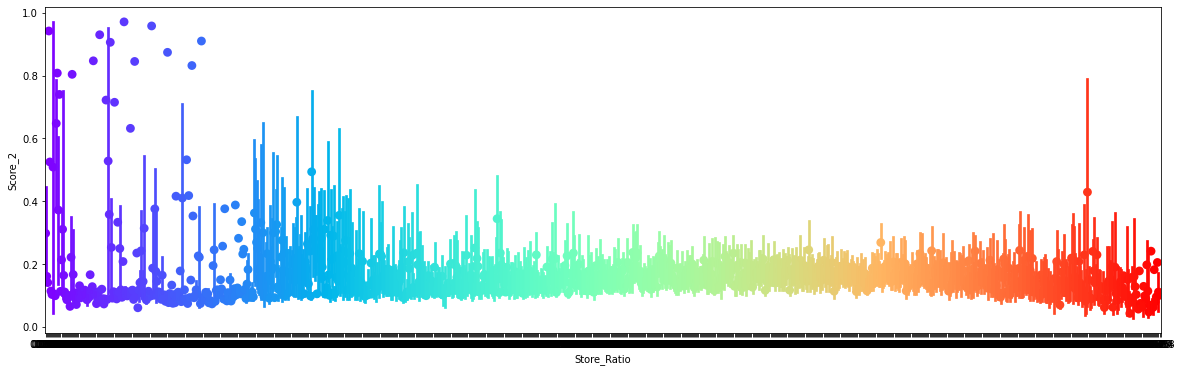

In [40]:
# Perform point plot between Store Ratio and Score 2
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_2', data=train_data, palette='rainbow')


<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_3'>

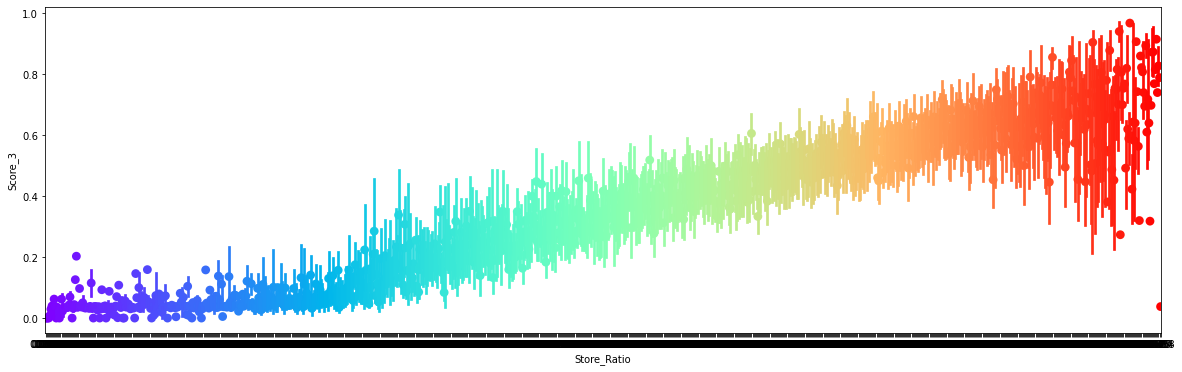

In [41]:
# Perform point plot between Store Ratio and Score 3
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_3', data=train_data, palette='rainbow')


<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_4'>

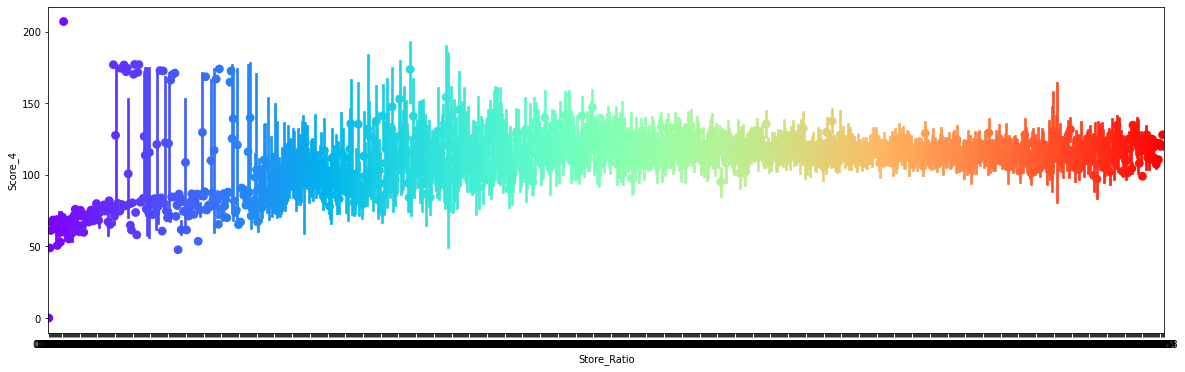

In [42]:
# Perform point plot between Store Ratio and Score 4
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_4', data=train_data, palette='rainbow')


### From above point plot

There is a increase in store ratio when there is a increase in score3. That is both are correlated

<AxesSubplot:xlabel='Store_Ratio', ylabel='time'>

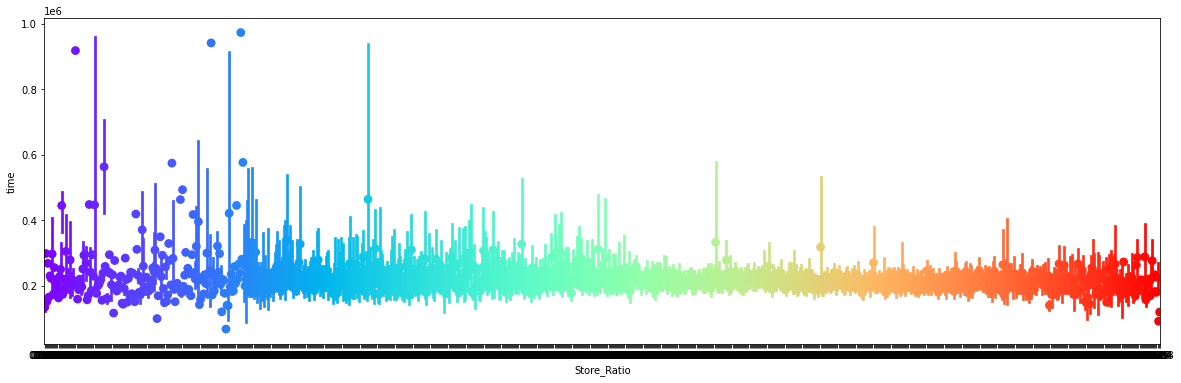

In [43]:
# Perform point plot between Store Ratio and  time
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='time', data=train_data, palette='rainbow')


From above pointplot

1. Most of the points are between 0.2 to 0.3
2. Very few points above 0.3

#  DISTPLOT

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

Store_Ratio


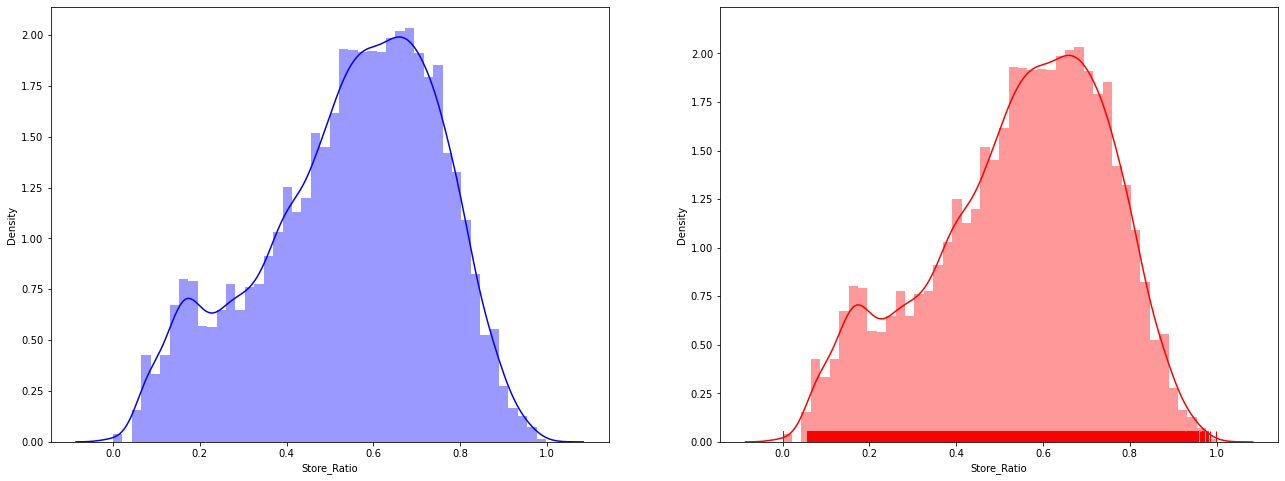

Basket_Ratio


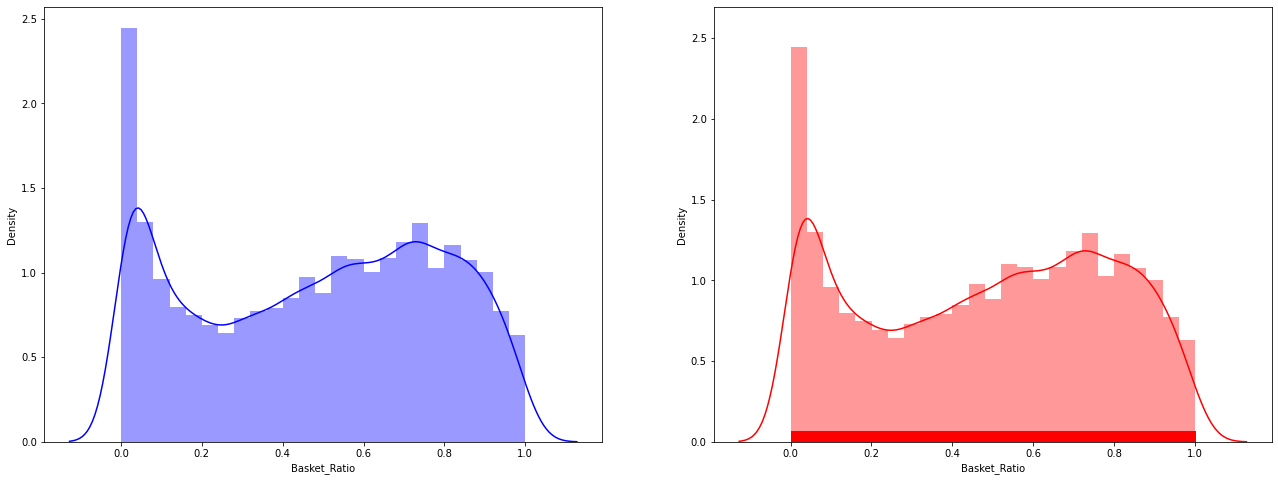

Category_1


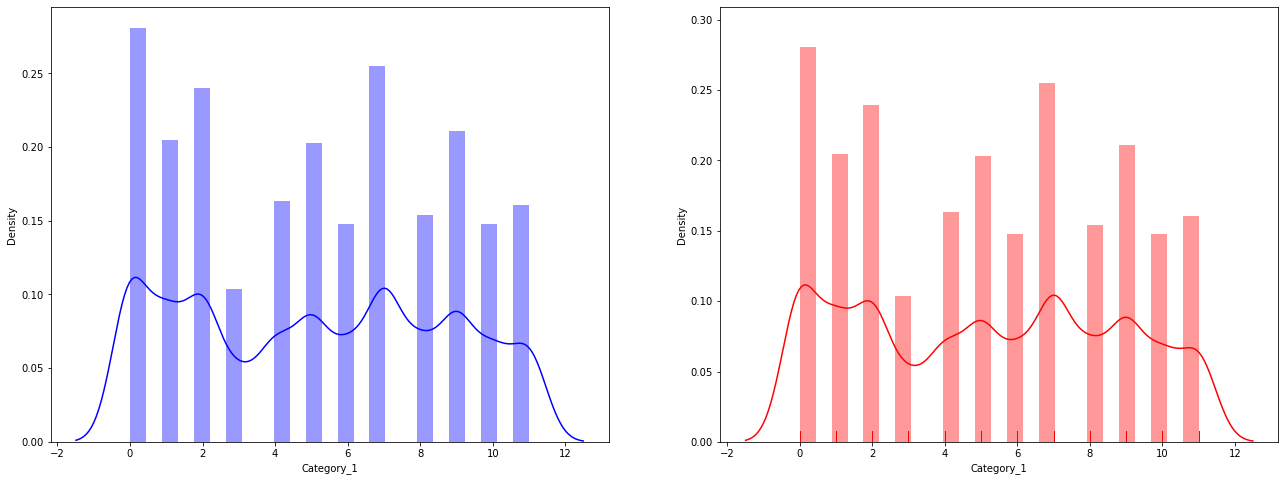

Store_Score


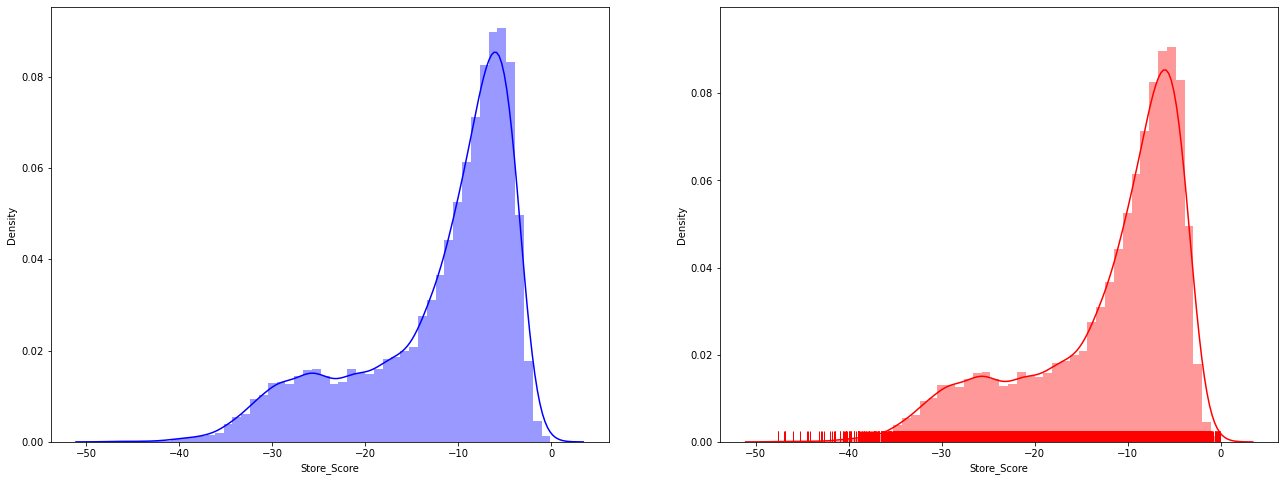

Category_2


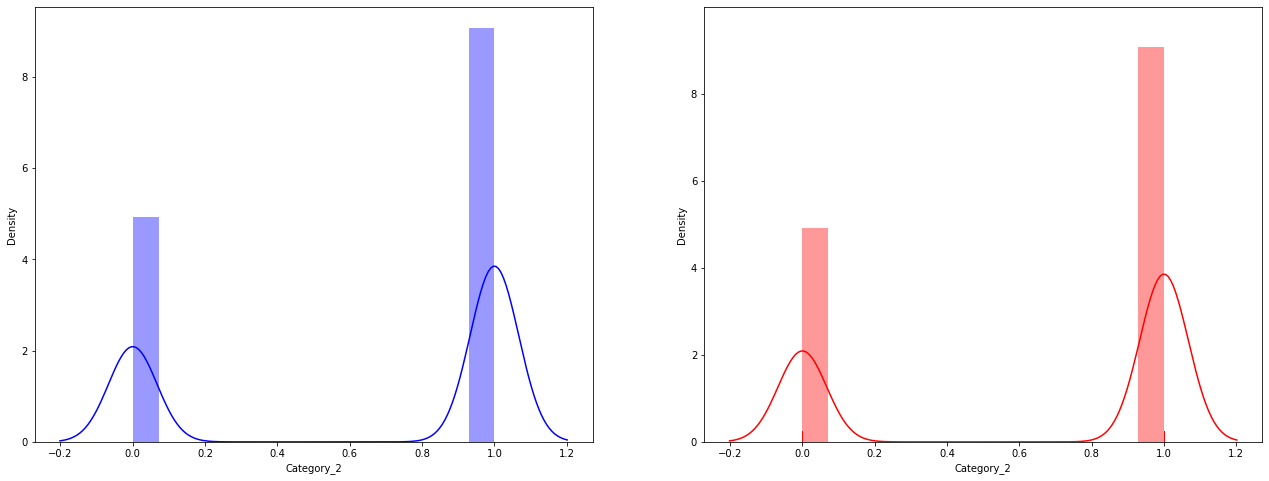

Store_Presence


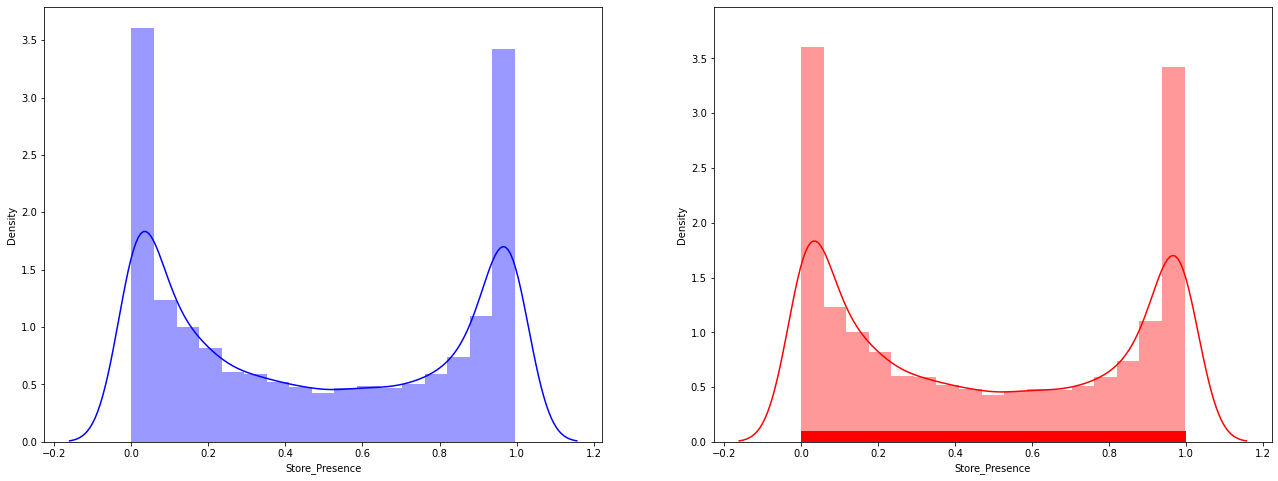

Score_1


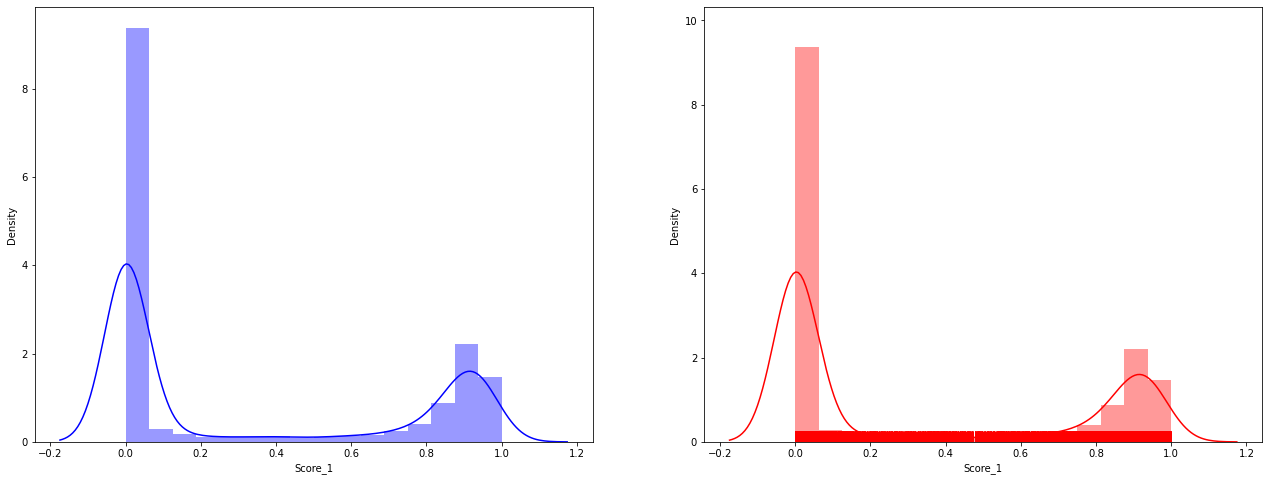

Score_2


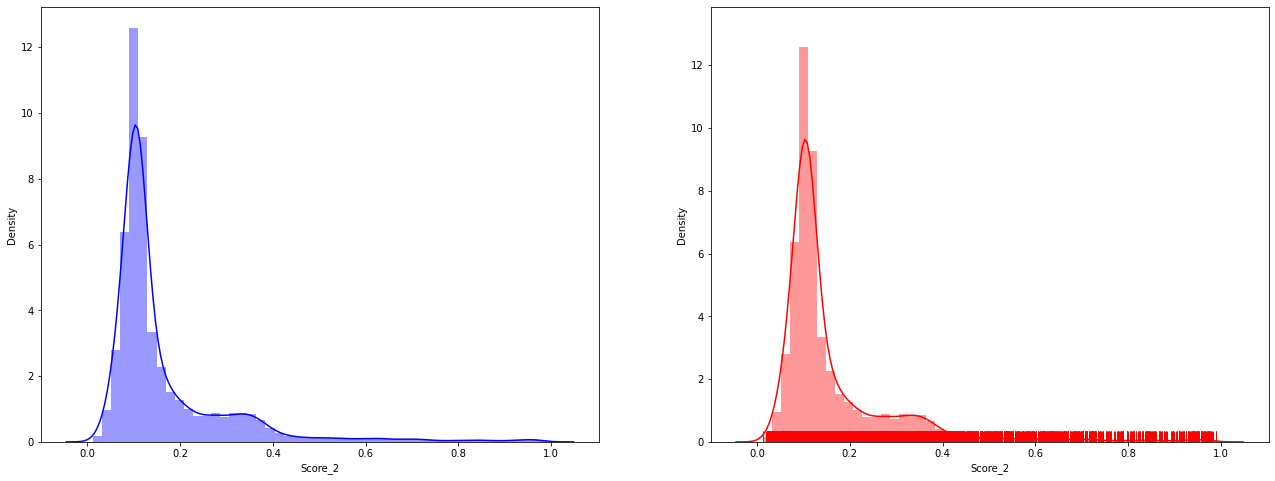

Score_3


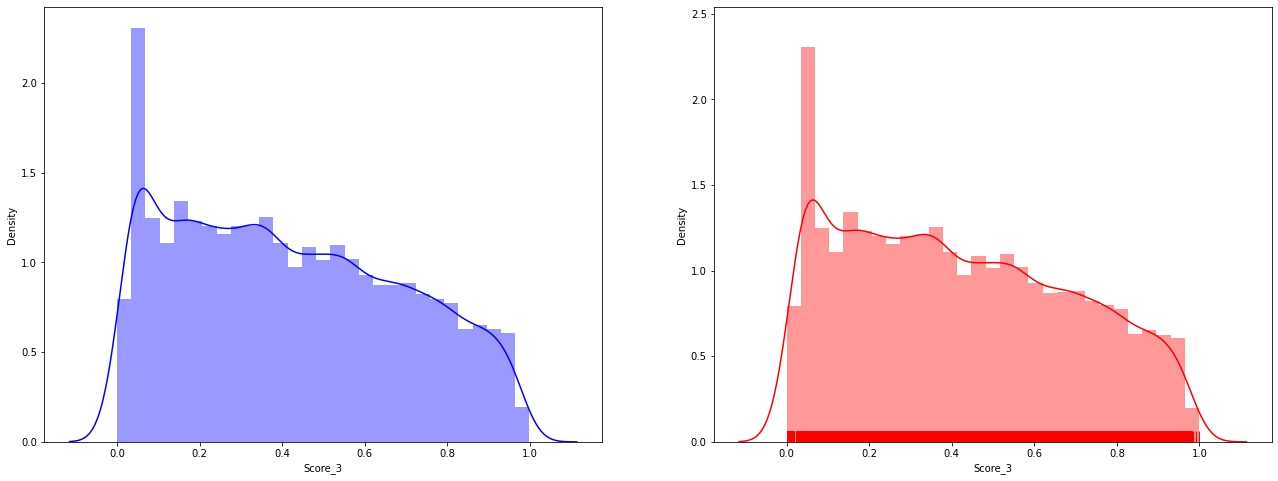

Score_4


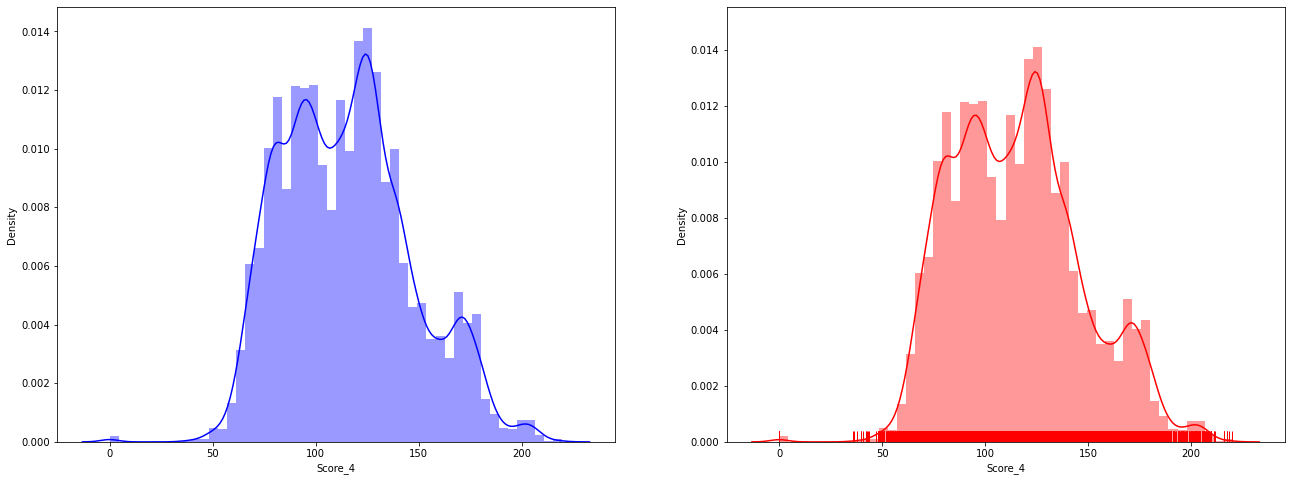

time


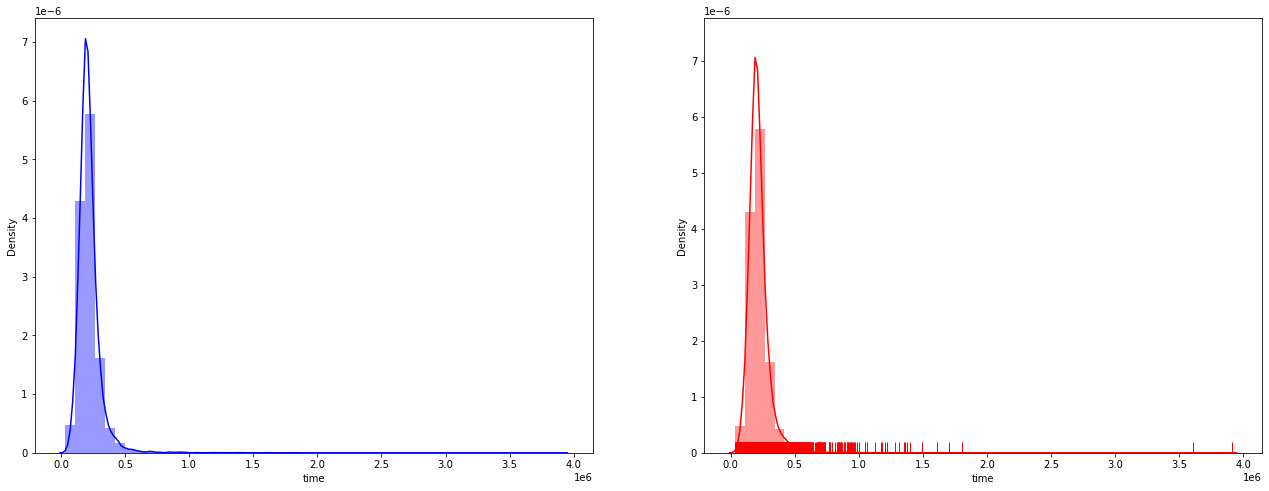

popularity


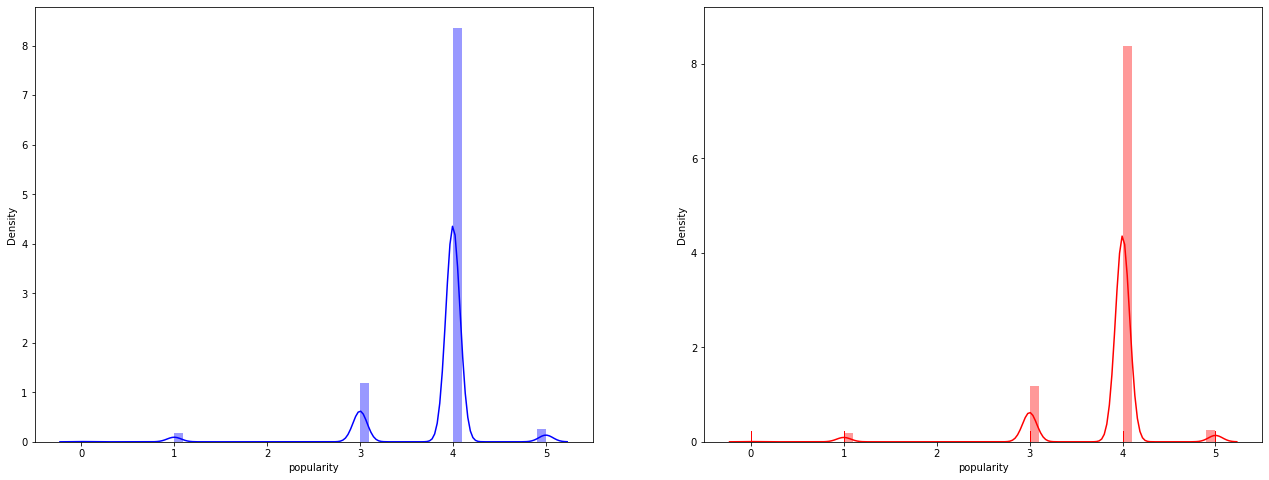

In [44]:
#Perform distplot for all the columns in dataset
for column in train_data.columns:
    print(column)
    # code below
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,8))
    sns.distplot(train_data[column],ax=ax[0],color='blue',hist=True)
    sns.distplot(train_data[column],ax=ax[1],rug=True,hist=True,color='red')

    plt.show()

#### OBSERVATIONS
1. distribution of store ratio, store presence, score3 and popularity are right skewed
2. distribution of basket ratio, score2 and time are skewed left
3. distribution of category 1 is multimodal
4. distribution of category2 and score1 are bimodal

# dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

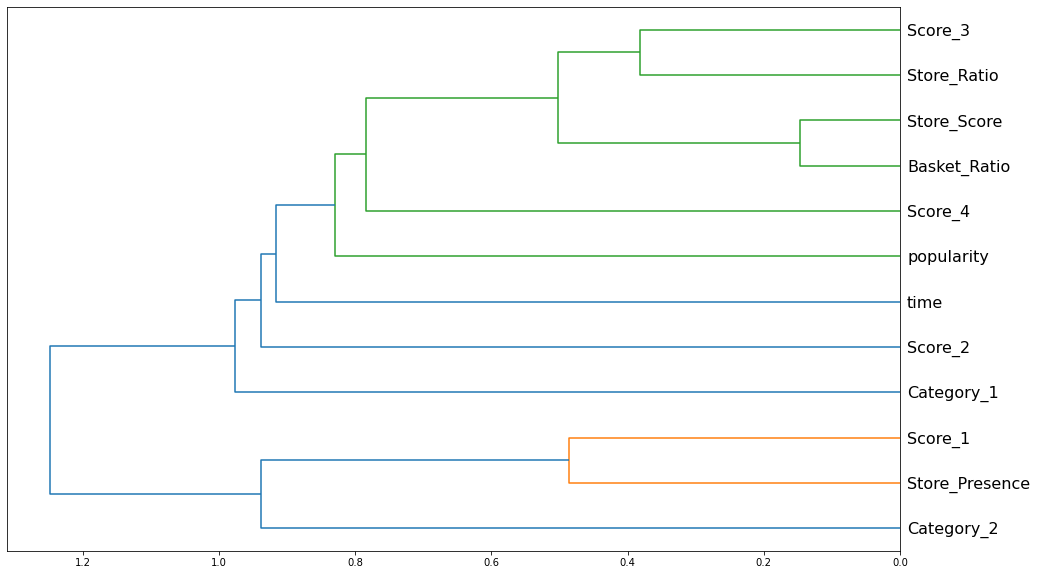

In [45]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = train_data.dropna()


# import scipy, hierarchy as hc
import scipy
from scipy.cluster import hierarchy as hc


corr = np.round(scipy.stats.spearmanr(X).correlation,4)

corr_condensed = hc.distance.squareform(1-corr)

z = hc.linkage(corr_condensed,method='average')

fig = plt.figure(figsize=(16,10))

dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left', leaf_font_size=16)

plt.show()


### strongly correlated variables
1. score3 and store ratio
2. store score and basket ratio
3. score1 and store presence

# Voilin Plot


1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='Category_1', ylabel='Store_Score'>

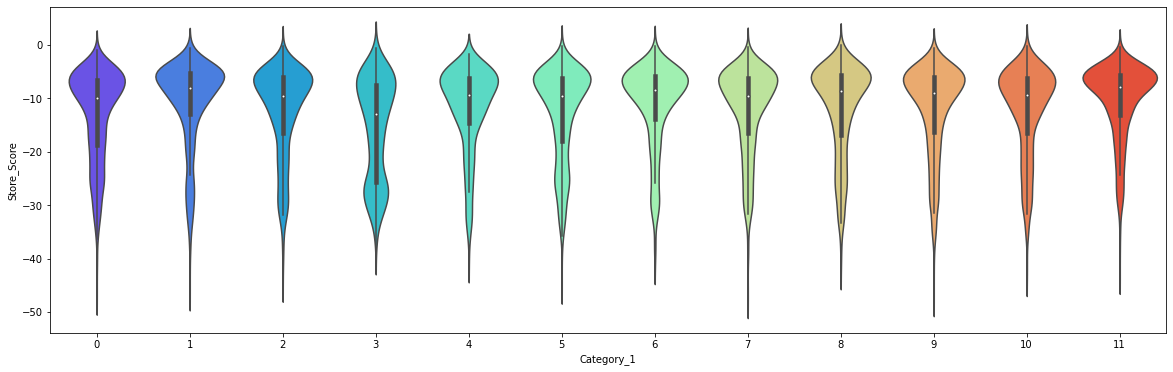

In [46]:
# perform a violin plot between category1 and store score
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_1', y='Store_Score', data=train_data, palette='rainbow')


there is no relation between store score and category1

<AxesSubplot:xlabel='Category_2', ylabel='Category_1'>

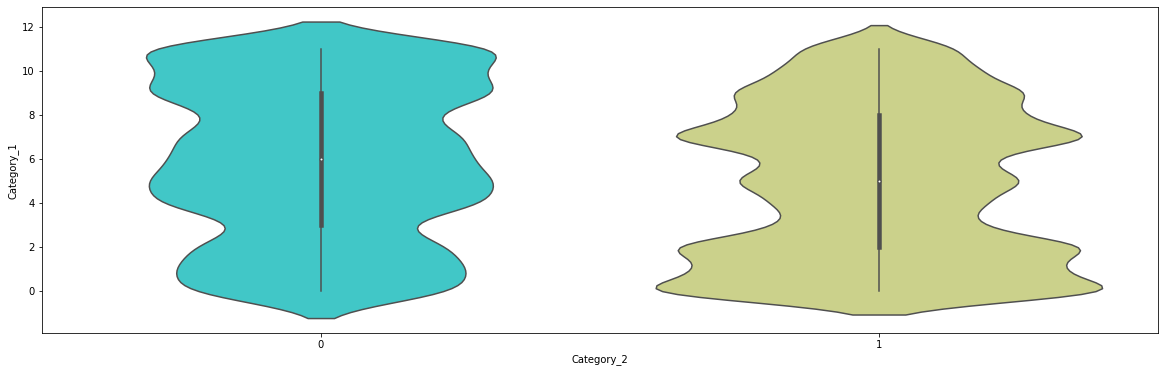

In [47]:
# perform a violin plot between category2 and category1
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Category_1', data=train_data, palette='rainbow')


there is no relation between  category2 and category1

<AxesSubplot:xlabel='Category_1', ylabel='Store_Presence'>

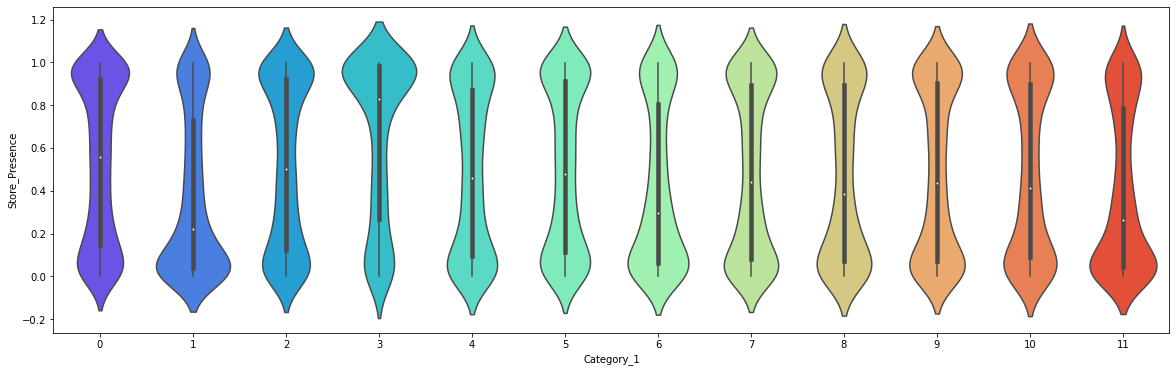

In [48]:
# perform a violin plot between categort1 and store prsence
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_1', y='Store_Presence', data=train_data, palette='rainbow')

there is no relation between  store presence and category1

<AxesSubplot:xlabel='Category_1', ylabel='Score_1'>

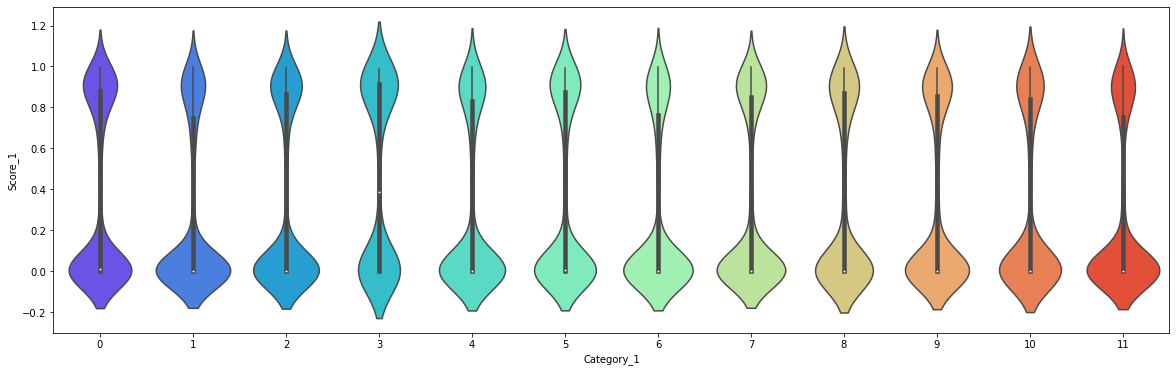

In [49]:
# perform a violin plot between category1 and score1
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_1', y='Score_1', data=train_data, palette='rainbow')

there is no relation between  score1 and category1

<AxesSubplot:xlabel='Category_2', ylabel='Score_2'>

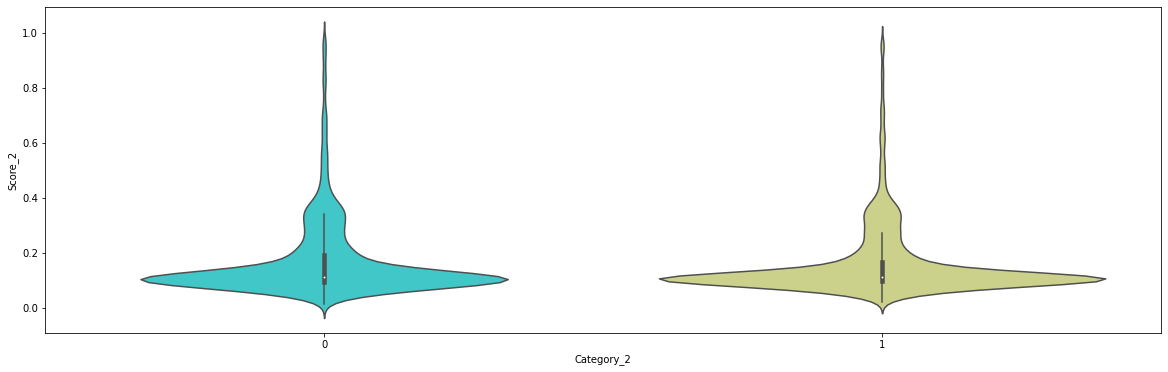

In [50]:
# perform a violin plot between category2 and score2 
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Score_2', data=train_data, palette='rainbow')

there is no relation between  score2 and category1

<AxesSubplot:xlabel='Category_1', ylabel='Score_3'>

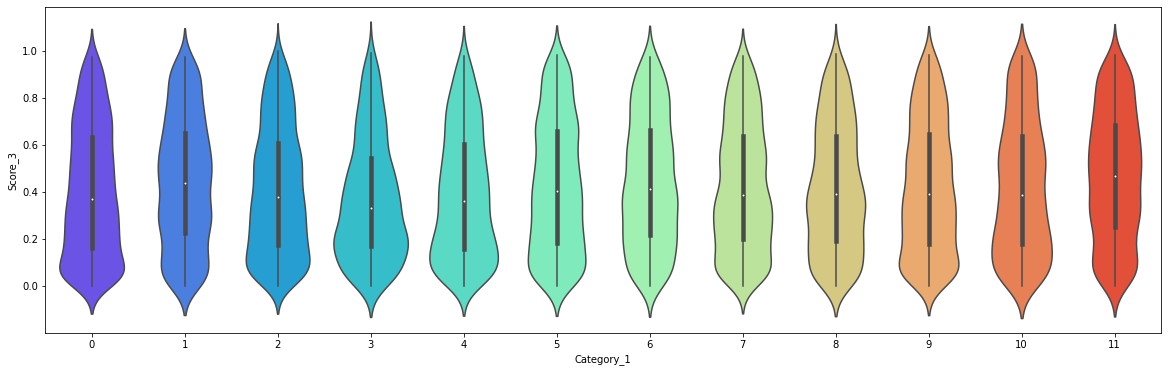

In [51]:
# perform a violin plot between category1 and score3
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_1', y='Score_3', data=train_data, palette='rainbow')

there is no relation between  score3 and category1

<AxesSubplot:xlabel='Category_1', ylabel='time'>

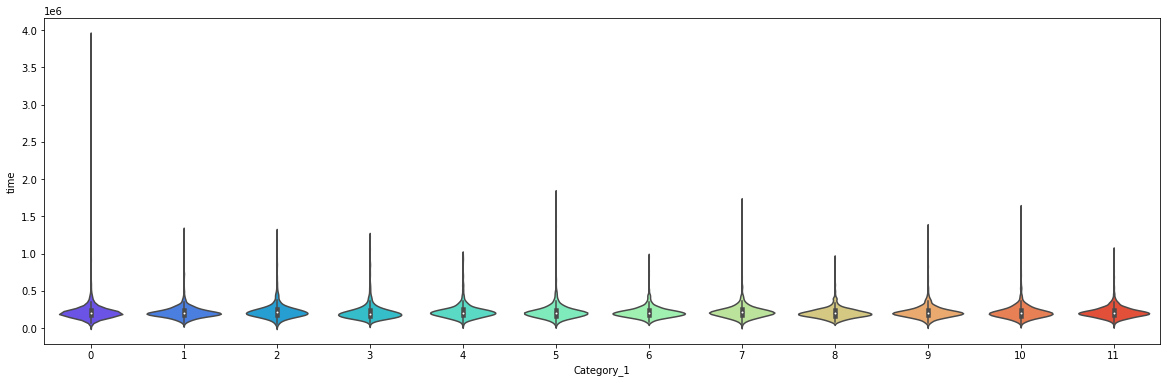

In [52]:
# perform a violin plot between category1 and time
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_1', y='time', data=train_data, palette='rainbow')

there is no relation between  time and category1

<AxesSubplot:xlabel='popularity', ylabel='Category_1'>

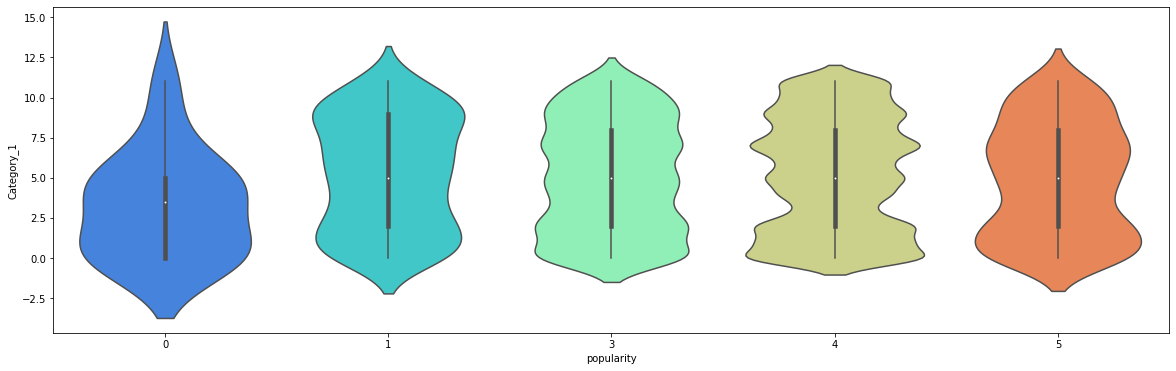

In [53]:
# perform a violin plot between popularity and category1
plt.figure(figsize=(20,6))
sns.violinplot(x='popularity', y='Category_1', data=train_data, palette='rainbow')

there is no relation between  popularity and category1

<AxesSubplot:xlabel='Category_2', ylabel='Store_Presence'>

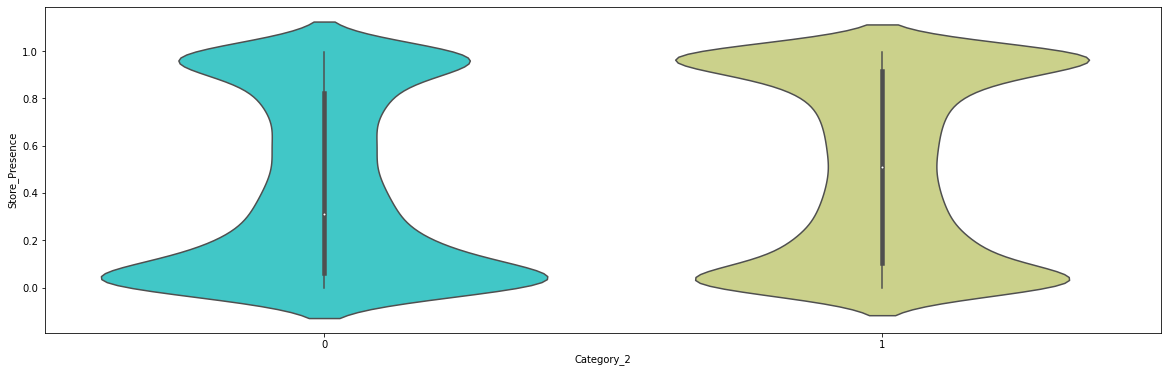

In [54]:
# perform a violin plot between category2 and store presence 
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Store_Presence', data=train_data, palette='rainbow')

there is no relation between category_2 and  store_presence

<AxesSubplot:xlabel='Category_2', ylabel='Score_1'>

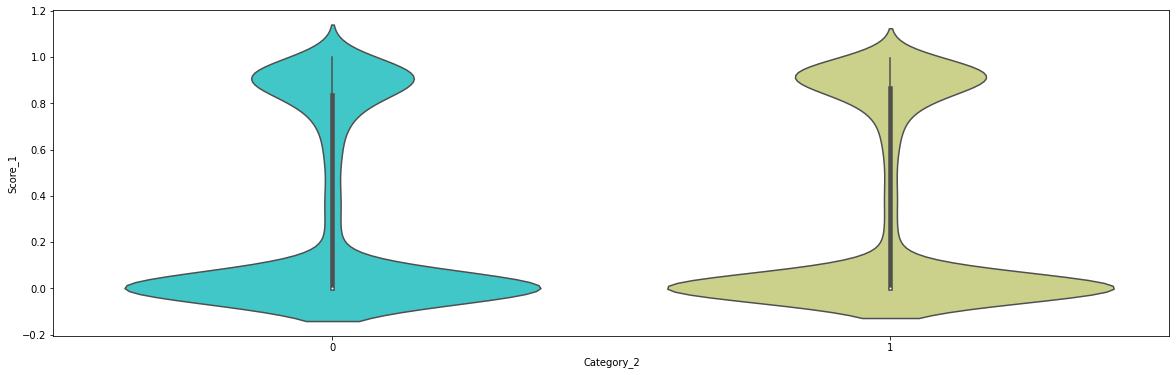

In [55]:
# perform a violin plot between category2 and score1
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Score_1', data=train_data, palette='rainbow')

there is no relation between category_2 and score 1

<AxesSubplot:xlabel='Category_2', ylabel='Score_2'>

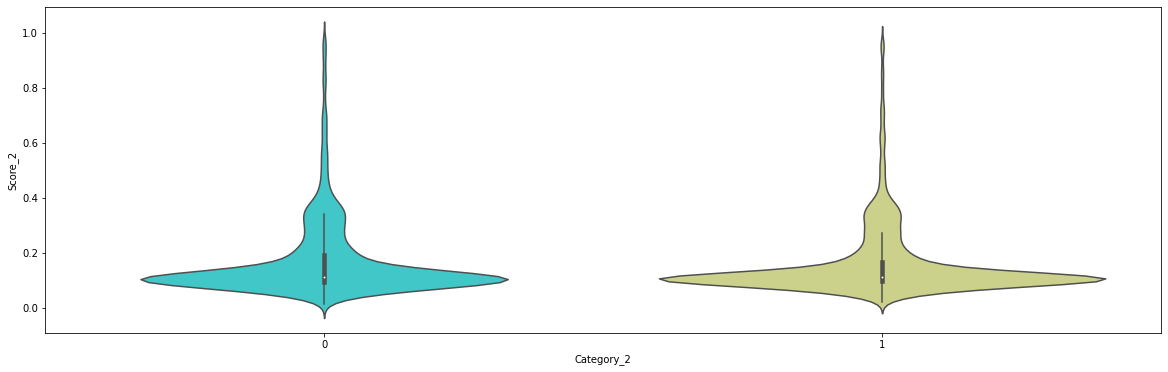

In [56]:
# perform a violin plot between category2 and score2
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Score_2', data=train_data, palette='rainbow')

there is no relation between categroy_2 and score 2

<AxesSubplot:xlabel='Category_2', ylabel='Score_3'>

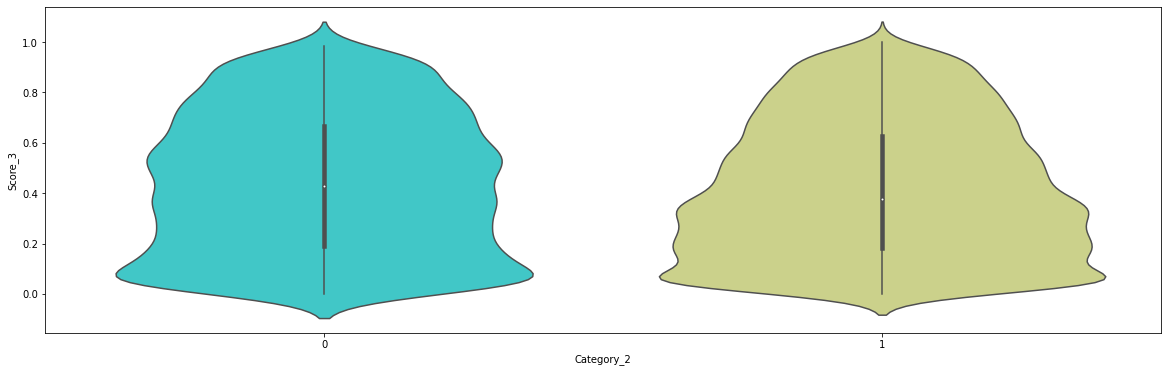

In [57]:
# perform a violin plot between category2 and score3
plt.figure(figsize=(20,6))
sns.violinplot(x='Category_2', y='Score_3', data=train_data, palette='rainbow')

there is no relation between Category_2 and score 3

<AxesSubplot:xlabel='popularity', ylabel='Score_4'>

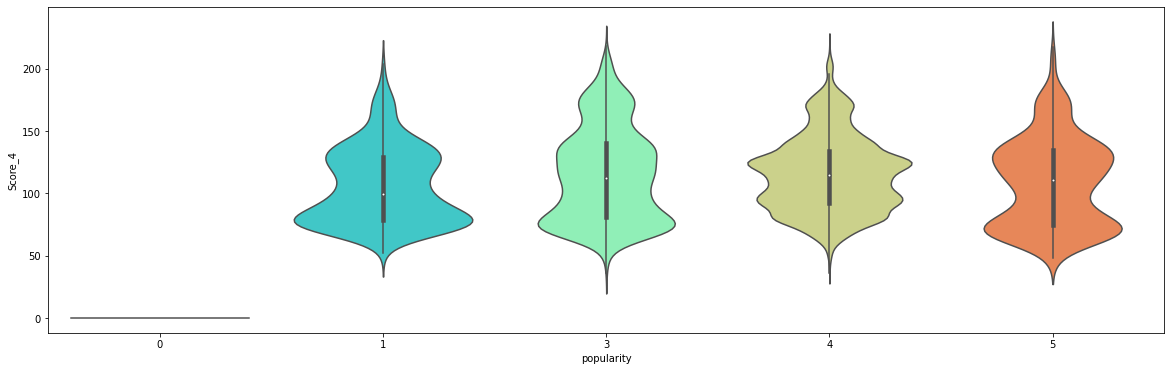

In [58]:
# perform a violin plot between popularity and score4
plt.figure(figsize=(20,6))
sns.violinplot(x='popularity', y='Score_4', data=train_data, palette='rainbow')

there is no relation between popularity and score 4

<AxesSubplot:xlabel='popularity', ylabel='time'>

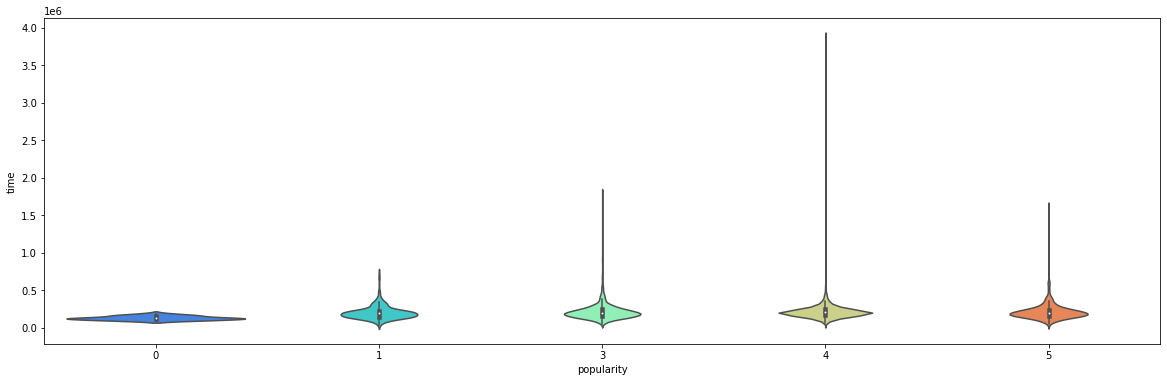

In [59]:
# perform a violin plot between popularity and time
plt.figure(figsize=(20,6))
sns.violinplot(x='popularity', y='time', data=train_data, palette='rainbow')

there is on relation between time and popularity

#  Preprocessing

In [60]:
#convert the time column into more columns like hour, month, day, year , minute
train_data['hour'] = pd.to_datetime(train_data['time']).dt.hour

train_data['month'] = pd.to_datetime(train_data['time']).dt.month

train_data['day'] = pd.to_datetime(train_data['time']).dt.day

train_data['year'] = pd.to_datetime(train_data['time']).dt.year

train_data['minute'] = pd.to_datetime(train_data['time']).dt.minute



In [61]:
# drop popularity from train_df and name that variable as y

#drop popularity n time from train dataset
y=train_data['popularity']

# Scaling

## Why scaling is necessary?

1. Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
2. If left alone, these algorithms only take in the magnitude of features neglecting the units.
3. The results would vary greatly between different units, 5kg and 5000gms.
4. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
5. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

# min max scaling


Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [62]:
# Helper function for scaling all the numerical data using MinMaxScalar
# import asarray
#  import MinMaxScaler
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  

  df[col] = scaler.fit_transform(df[col])
  
  return df

In [63]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling
col_X = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4']
X =  scale_data(train_data,col_X) 
X=X.drop(['time','popularity'],axis=1)
#Print the X data
X.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0     0.407816      0.003585           2     0.246563           1   
1     0.234469      0.104807           0     0.583026           1   
2     0.669339      0.725941           9     0.843506           1   
3     0.184369      0.005395           4     0.278312           1   
4     0.231463      0.130812           6     0.520749           1   

   Store_Presence  Score_1   Score_2   Score_3   Score_4  hour  month  day  \
0        0.995984    0.944  0.088755  0.110110  0.518482     0      1    1   
1        0.947791    0.900  0.119600  0.038238  0.347436     0      1    1   
2        0.038855    0.000  0.124706  0.453453  0.564745     0      1    1   
3        0.852410    0.931  0.101215  0.064164  0.359748     0      1    1   
4        0.940763    0.000  0.099173  0.067768  0.498678     0      1    1   

   year  minute  
0  1970       0  
1  1970       0  
2  1970       0  
3  1970       0  
4  1970       0

# Splitting the data into train and test set

In [64]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.10,random_state=42) 


In [65]:
# print X_train shape, y_train shape
print(X_train.shape)
print(y_train.shape)

(16387, 15)
(16387,)


In [66]:
# check for nan value in X_train
np.any(np.isnan(X_train))

False

# Modelling

In [67]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Function for calculating all the relevant metrics 
def print_score(model):
    res = classification_report(y_test,model.predict(X_test))
    
    print("Classification Report \n",res)

In [68]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction
def feature_imp(feature_importances,feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_imp_df = pd.DataFrame()
    _df = pd.DataFrame()
    _df['feature_imp'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_imp_df= pd.concat([feature_imp_df,_df],axis=0,ignore_index=True)
    # grouping all data and sorting in descending order
    descend_ordr = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    # return fig, ax
    fig,ax = plt.subplots(figsize=(8,max(6,len(descend_ordr)*.25)))
    # Visualize importance of all the features in the dataset for the prediction
    sns.boxenplot(data=feature_imp_df,x='feature_imp',y='column',order=descend_ordr,ax=ax,palette='viridis',orient='h')
    ax.tick_params(axis='x',rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig,ax 
    ax.set_title('importance')
    ax.set_xlabel('feature importance')
    ax.set_ylabel('column')
    # return fig, ax
    return fig,ax


# LOGISTIC REGRESSION

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        34
           3       0.00      0.00      0.00       228
           4       0.83      1.00      0.91      1511
           5       0.00      0.00      0.00        46

    accuracy                           0.83      1821
   macro avg       0.17      0.20      0.18      1821
weighted avg       0.69      0.83      0.75      1821

CPU times: user 2.38 s, sys: 43.9 ms, total: 2.42 s
Wall time: 611 ms


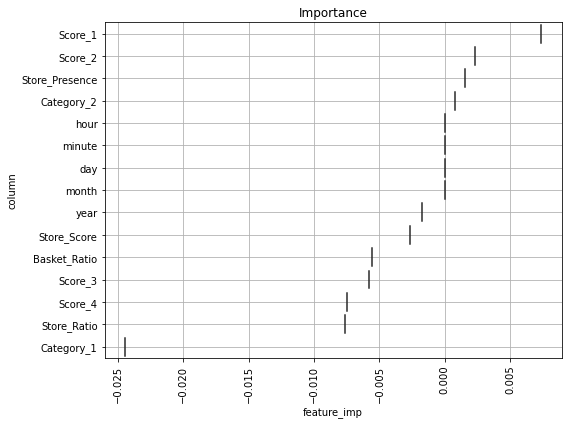

In [69]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class = LogisticRegression()


# fitting the model on train data
log_class.fit(X_train,y_train)


# print score of the model
print_score(log_class)


# visualizing importance of features
fig, ax = feature_imp(log_class.coef_[0],X_train)



# RANDOM FOREST CLASSIFIER

 random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.44      0.61        34
           3       0.88      0.33      0.48       228
           4       0.88      1.00      0.94      1511
           5       1.00      0.35      0.52        46

    accuracy                           0.89      1821
   macro avg       0.95      0.62      0.71      1821
weighted avg       0.89      0.89      0.86      1821

CPU times: user 2.5 s, sys: 23 µs, total: 2.5 s
Wall time: 2.46 s


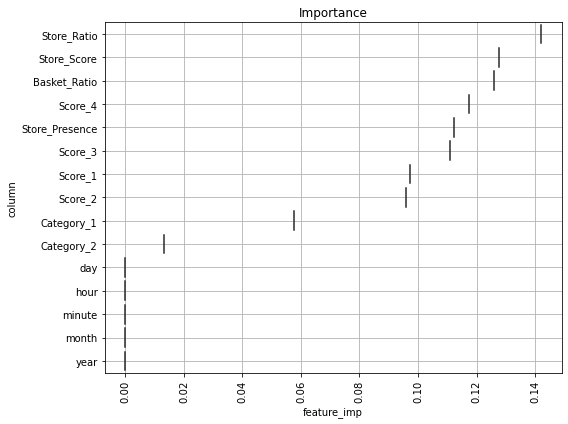

In [70]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier()


# fitting the model on train data

rf_clf.fit(X_train,y_train)

# print score of the model

print_score(rf_clf)



# visualizing importance of features
fig, ax = feature_imp(rf_clf.feature_importances_,X_train)



# ADA BOOST CLASSIFIER

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.15      0.01        34
           3       0.00      0.00      0.00       228
           4       0.68      0.33      0.45      1511
           5       0.00      0.00      0.00        46

    accuracy                           0.28      1821
   macro avg       0.34      0.30      0.29      1821
weighted avg       0.56      0.28      0.37      1821

CPU times: user 878 ms, sys: 0 ns, total: 878 ms
Wall time: 875 ms


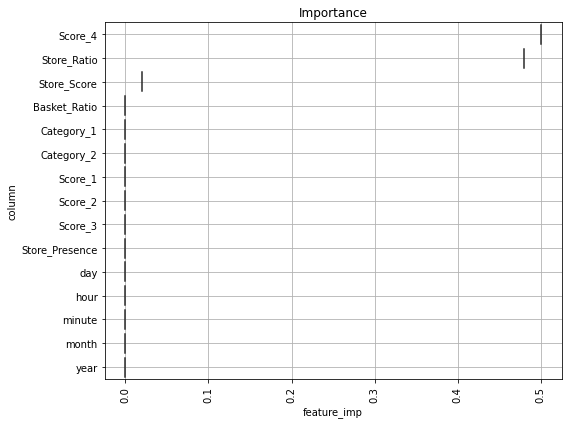

In [71]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
Ada_clf = AdaBoostClassifier()


# fitting the model on train data

Ada_clf.fit(X_train,y_train)


# print score of the model

print_score(Ada_clf)

# visualizing importance of features
fig, ax = feature_imp(Ada_clf.feature_importances_,X_train)




# SUPORT VECTOR CLASSIFIER

1. A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.



In [72]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC

from sklearn.svm import SVC

# Instantiate the model
svc =SVC()



#fit the model on train data

svc.fit(X_train,y_train)
#print the model score
print_score(svc)


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        34
           3       0.00      0.00      0.00       228
           4       0.83      1.00      0.91      1511
           5       0.00      0.00      0.00        46

    accuracy                           0.83      1821
   macro avg       0.17      0.20      0.18      1821
weighted avg       0.69      0.83      0.75      1821

CPU times: user 3.75 s, sys: 91.9 ms, total: 3.84 s
Wall time: 3.84 s


# DESISION TREE CLASSICIFIER

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.40      0.56      0.47        34
           3       0.46      0.45      0.46       228
           4       0.91      0.90      0.91      1511
           5       0.38      0.43      0.41        46

    accuracy                           0.83      1821
   macro avg       0.63      0.67      0.65      1821
weighted avg       0.83      0.83      0.83      1821

CPU times: user 255 ms, sys: 3.98 ms, total: 259 ms
Wall time: 256 ms


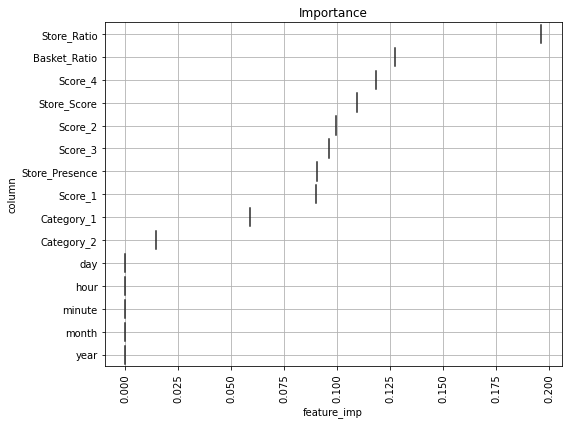

In [73]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_clf = DecisionTreeClassifier()


# fitting the model on train data

dt_clf.fit(X_train,y_train)

# print score of the model

print_score(dt_clf)


# visualizing importance of features
fig, ax = feature_imp(dt_clf.feature_importances_,X_train)




# K NEIGHBOUR CLASSIFIER

In [74]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn_clf = KNeighborsClassifier()


# fitting the model on train data
knn_clf.fit(X_train,y_train)


# print score of the model

print_score(knn_clf)


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.43      0.18      0.25        34
           3       0.38      0.25      0.30       228
           4       0.87      0.94      0.90      1511
           5       0.31      0.09      0.14        46

    accuracy                           0.82      1821
   macro avg       0.40      0.29      0.32      1821
weighted avg       0.78      0.82      0.80      1821

CPU times: user 98.1 ms, sys: 7.91 ms, total: 106 ms
Wall time: 102 ms


# GRADIENT BOOSTING CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      0.15      0.23        34
           3       0.58      0.09      0.16       228
           4       0.85      0.99      0.91      1511
           5       0.70      0.15      0.25        46

    accuracy                           0.84      1821
   macro avg       0.73      0.48      0.51      1821
weighted avg       0.80      0.84      0.79      1821

CPU times: user 16.3 s, sys: 3.77 ms, total: 16.3 s
Wall time: 16.3 s


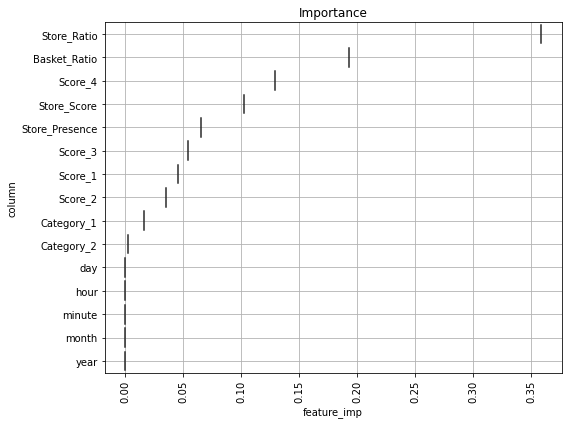

In [75]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR_clf = GradientBoostingClassifier()


# fitting the model on train data

GBR_clf.fit(X_train,y_train)
# print score of the model

print_score(GBR_clf)

# visualizing importance of features
fig, ax = feature_imp(GBR_clf.feature_importances_,X_train)



# BAGGING CLASSIFIER

In [76]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier

from sklearn.ensemble import BaggingClassifier

# Instantiate the model
bg_clf = BaggingClassifier()


# fitting the model on train data

bg_clf.fit(X_train,y_train)

# print score of the model
print_score(bg_clf)



Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.93      0.41      0.57        34
           3       0.58      0.42      0.49       228
           4       0.90      0.96      0.93      1511
           5       0.70      0.35      0.46        46

    accuracy                           0.87      1821
   macro avg       0.82      0.63      0.69      1821
weighted avg       0.85      0.87      0.86      1821

CPU times: user 1.03 s, sys: 0 ns, total: 1.03 s
Wall time: 1.03 s


# VOTING CLASSIFIER

In [77]:
%%time
# Fit a VotingClassifier model to the train dataset

# Import VotingClassifier

from sklearn.ensemble import VotingClassifier

# list of classifier objects
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]

# Instantiate the model
voting_clf = VotingClassifier(estimators=classifiers)


# fitting the model on train data

voting_clf.fit(X_train,y_train)

# print score of the model

print_score(voting_clf)


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.47      0.64        34
           3       0.73      0.34      0.47       228
           4       0.88      0.98      0.93      1511
           5       1.00      0.15      0.26        46

    accuracy                           0.87      1821
   macro avg       0.92      0.59      0.66      1821
weighted avg       0.87      0.87      0.85      1821

CPU times: user 6.15 s, sys: 144 ms, total: 6.3 s
Wall time: 6.3 s


# XGB CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.86      0.35      0.50        34
           3       0.73      0.30      0.43       228
           4       0.88      0.98      0.93      1511
           5       0.80      0.26      0.39        46

    accuracy                           0.87      1821
   macro avg       0.85      0.58      0.65      1821
weighted avg       0.86      0.87      0.84      1821

CPU times: user 20.3 s, sys: 87.9 ms, total: 20.4 s
Wall time: 3 s


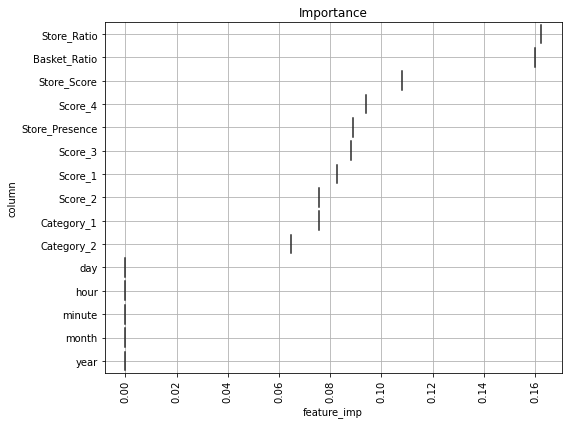

In [78]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier

from xgboost import XGBClassifier

# Instantiate the model
xgb_clf1 = XGBClassifier()


# fitting the model on train data

xgb_clf1.fit(X_train,y_train)

# print score of the model

print_score(xgb_clf1)

# visualizing importance of features
fig, ax = feature_imp(xgb_clf1.feature_importances_,X_train)



In [79]:
# import metrics, train_test_split


def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")
    

In [81]:
# list of model objects
models= [log_class,rf_clf,Ada_clf,svc, dt_clf, knn_clf, GBR_clf,bg_clf, voting_clf, xgb_clf1 ]
# list of model names
names = ['logistic', 'rf','AdaBoost', 'svc', 'Dtree','KNN','GBR','bagging','voting','XGB']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)

logistic
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        34
           3       0.00      0.00      0.00       228
           4       0.83      1.00      0.91      1511
           5       0.00      0.00      0.00        46

    accuracy                           0.83      1821
   macro avg       0.17      0.20      0.18      1821
weighted avg       0.69      0.83      0.75      1821

---------------------------------------------------------------------------------------
rf
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.44      0.61        34
           3       0.88      0.33      0.48       228
           4       0.88      1.00      0.94      1511
           5       1.00      0.35      0.52        46

    accuracy                         

# Hyperparameter tuning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.



# grid search

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn.

This method tries every possible combination of each set of hyper-parameters.

Using this method, we can find the best set of values in the parameter search space.

This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [82]:
%%time
# Helper function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
  from sklearn.model_selection import GridSearchCV, train_test_split
  from sklearn.model_selection import KFold
  from sklearn.model_selection import GridSearchCV

  
  cv =KFold()

  clf =GridSearchCV(model,grid,cv=cv,n_jobs=-1)
  
  # print clf.score and best_params_
  clf.fit(X_train,y_train)
  print(clf.best_params_)
  print(clf.score(X_test,y_test))
  print(clf.score(X_train,y_train))
 

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


In [83]:
%%time
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    

grid_search(log_class,log_para_grid)


/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

{'C': 1e+01, 'penalty': 'l2'}
0.829763866007688
0.8372490388722768
CPU times: user 2.2 s, sys: 313 ms, total: 2.51 s
Wall time: 6.68 s


# RamdomizedSearchCV

In [84]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  
  #fit on train
  random.fit(X_train,y_train)
  # print best_params_
  print(random.best_params_)
  

In [85]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
CPU times: user 5.08 s, sys: 64.5 ms, total: 5.15 s
Wall time: 26.8 s


In [86]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(KNeighborsClassifier(),X_train, y_train,param_grid=knn_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_neighbors': 28, 'leaf_size': 3}
CPU times: user 303 ms, sys: 36.1 ms, total: 339 ms
Wall time: 4.81 s


In [87]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeClassifier(),X_train, y_train,param_grid=DTR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'best', 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 3}
CPU times: user 243 ms, sys: 43.9 ms, total: 287 ms
Wall time: 559 ms


In [88]:
%%time
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(AdaBoostClassifier(),X_train, y_train,param_grid=Ada_para_grid)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'n_estimators': 100, 'learning_rate': 0.01}
CPU times: user 1.74 s, sys: 32.2 ms, total: 1.77 s
Wall time: 21.7 s


In [89]:
%%time
# create  parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.3, 0.4] }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBClassifier(),X_train, y_train,param_grid=XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}
CPU times: user 9.52 s, sys: 91.6 ms, total: 9.61 s
Wall time: 21.1 s


# Using the tuned parameters and training the models

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.06      0.11        34
           3       0.90      0.08      0.15       228
           4       0.84      1.00      0.91      1511
           5       1.00      0.07      0.12        46

    accuracy                           0.84      1821
   macro avg       0.95      0.44      0.46      1821
weighted avg       0.86      0.84      0.78      1821

CPU times: user 5.85 s, sys: 28 ms, total: 5.88 s
Wall time: 4.59 s


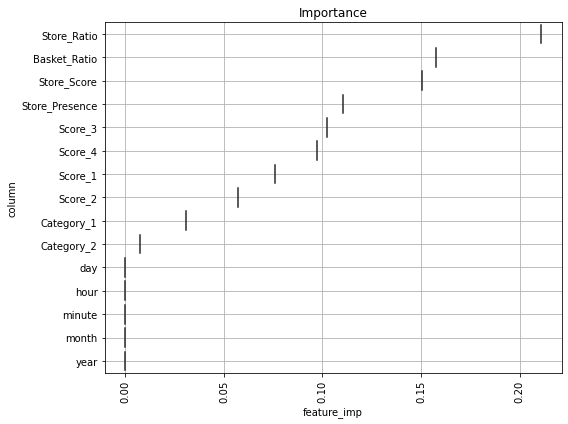

In [90]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


# fitting the model on train data

rf_clf.fit(X_train,y_train)

# print score of the model

print_score(rf_clf)



# visualizing importance of features
fig, ax = feature_imp(rf_clf.feature_importances_,X_train)



Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00        34
           3       0.00      0.00      0.00       228
           4       0.83      1.00      0.91      1511
           5       0.00      0.00      0.00        46

    accuracy                           0.83      1821
   macro avg       0.37      0.40      0.38      1821
weighted avg       0.69      0.83      0.75      1821

CPU times: user 1.62 s, sys: 8.01 ms, total: 1.63 s
Wall time: 1.63 s


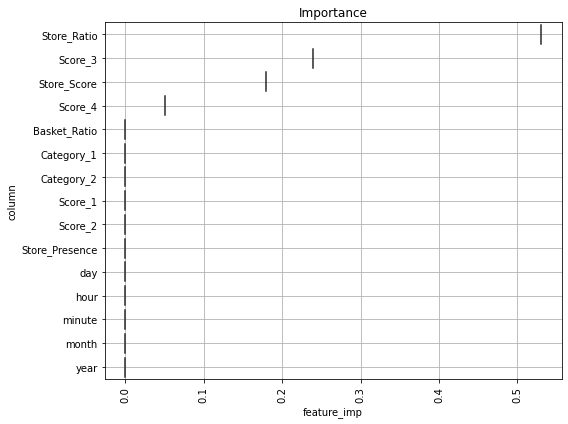

In [91]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
Ada_clf = AdaBoostClassifier(**{'n_estimators': 100, 'learning_rate': 0.01})


# fitting the model on train data

Ada_clf.fit(X_train,y_train)


# print score of the model

print_score(Ada_clf)

# visualizing importance of features
fig, ax = feature_imp(Ada_clf.feature_importances_,X_train)




Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.03      0.06        34
           3       0.64      0.07      0.13       228
           4       0.84      1.00      0.91      1511
           5       0.80      0.09      0.16        46

    accuracy                           0.84      1821
   macro avg       0.86      0.44      0.45      1821
weighted avg       0.82      0.84      0.78      1821

CPU times: user 10.3 s, sys: 71.4 ms, total: 10.4 s
Wall time: 1.32 s


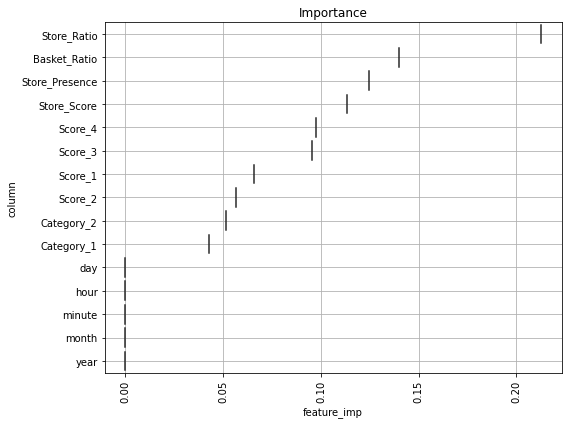

In [92]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier

from xgboost import XGBClassifier

# Instantiate the model
xgb_clf = XGBClassifier(**{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}
)


# fitting the model on train data

xgb_clf.fit(X_train,y_train)

# print score of the model

print_score(xgb_clf)

# visualizing importance of features
fig, ax = feature_imp(xgb_clf.feature_importances_,X_train)



### Now working with the test dataset provided

In [93]:
# preparing test data as similarly as done for train data before.
test_data['hour'] =pd.to_datetime(test_data['time']).dt.hour

test_data['month'] = pd.to_datetime(test_data['time']).dt.month

test_data['day'] = pd.to_datetime(test_data['time']).dt.day

test_data['year'] = pd.to_datetime(test_data['time']).dt.year

test_data['minute'] = pd.to_datetime(test_data['time']).dt.minute

test_data=test_data.drop(['time'],axis=1)


In [94]:
X_test = test_data

In [95]:
# check columns of test data
X_test.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'hour', 'month', 'day', 'year', 'minute'],
      dtype='object')

In [96]:
# passing test data for scaling
col_X_test = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4']
X_test = scale_data(test_data,col_X_test)
X_test.head()


Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0     0.167689         0.994    0.090909     0.486834         0.0   
1     0.599182         0.636    0.363636     0.823781         1.0   
2     0.467280         0.743    0.000000     0.826286         1.0   
3     0.432515         0.748    0.454545     0.779116         1.0   
4     0.820041         0.756    0.181818     0.758930         0.0   

   Store_Presence  Score_1   Score_2  Score_3   Score_4  hour  month  day  \
0        0.124498  0.99100  0.793763  0.00001  0.580798     0      1    1   
1        0.002088  0.32200  0.107646  0.35500  0.620557     0      1    1   
2        0.405622  0.00931  0.202213  0.68800  0.705058     0      1    1   
3        0.030120  0.22100  0.170020  0.42800  0.427750     0      1    1   
4        0.084639  0.00765  0.052414  0.96300  0.599519     0      1    1   

   year  minute  
0  1970       0  
1  1970       0  
2  1970       0  
3  1970       0  
4  1970       0

In [97]:
# Perforn the prediction on the test dataset
y_predicted = xgb_clf1.predict(X_test)

In [98]:
#Prediction
y_predicted

array([4, 4, 4, ..., 4, 4, 4])

# CONCLUSION

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.
store ratio is most important data in the dataset.
we used  voting classifier for prediction